In [1]:
# Version_v2

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats
from matplotlib.font_manager import FontProperties
from fractions import Fraction
from scipy.interpolate import interp1d
import os
from Results_Module import *

In [3]:
ResultsFolder='/Volumes/UNI/Results_NewVersion1-4/'
FolderForPlots = ResultsFolder + "/plots"
#plotsfolder="~/Dropbox/Apps/Texpad/Diplom/DiplomThesis/subfiles/Methods/Images/"

In [4]:
percentages = [0, 11, 22, 33, 37, 44, 50]
SAMs=[0, 11, 22, 33] #percentages without complete wetting
Waters = {}

#Finished "good" simulations
Waters[0]=[1000, 2000, 3000, 4000, 5000, 6500, 7000, 8000, 9000, 10000]
Waters[11]=Waters[0]
Waters[22]=Waters[0]
Waters[33]=Waters[0]
Waters[37]=[1000, 2000, 3000, 4000, 5000, 6500, 7000, 8000, 9000, 10000]
Waters[44]=[1000, 2000, 3000, 4000, 5000, 6500, 7000, 8000, 9000, 10000]

In [6]:
# In the following dictionaries we will save the raw input data
angles_w = {}
radii_w = {}

#angles_m = {}
#radii_m = {}

angles_s = {}
radii_s = {}

# In the following dictionaries we will save the results for the cos(theta) and 1/r_base, and their errorbars. 
# We will call them the "results-dictionaries"
theta_w = {}
rbase_w = {}
errortheta_w = {}
error_rbase_w = {}
#start_theta_w = {} # -> uncomment if needed
#end_theta_w = {} # -> uncomment if needed
#start_rbase_w = {} # -> uncomment if needed
#end_rbase_w = {} # -> uncomment if needed
equil_theta_w = {}
equil_rbase_w = {}

#theta_m = {}
#rbase_m = {}
#errortheta_m = {}
#error_rbase_m = {}
#start_theta_m = {}
#end_theta_m = {}
#start_rbase_m = {}
#end_rbase_m = {}
#equil_theta_m = {}
#equil_rbase_m = {}

theta_s = {}
rbase_s = {}
errortheta_s = {}
error_rbase_s = {}
#start_theta_s = {} # -> uncomment if needed
#end_theta_s = {} # -> uncomment if needed
#start_rbase_s = {} # -> uncomment if needed
#end_rbase_s = {} # -> uncomment if needed
equil_theta_s = {}
equil_rbase_s = {}

# For each surface we will store 10 results corresponding to the 10 droplets in each system. This means that in every 
# entry of the "results-dictionaries" we will store a list of 10 elements. Thus, now we store in them lists with 10 zeros. 

for system in percentages:
    
    theta_w[system] = []
    rbase_w[system] = []
    errortheta_w[system] = []
    error_rbase_w[system] = []
    #start_theta_w[system] = [] # -> uncomment if needed
    #end_theta_w[system] = [] # -> uncomment if needed
    #start_rbase_w[system] = [] # -> uncomment if needed
    #end_rbase_w[system] = [] # -> uncomment if needed
    equil_theta_w[system] = []
    equil_rbase_w[system] = []
    
    #theta_m[system] = []
    #rbase_m[system] = []
    #errortheta_m[system] = []
    #error_rbase_m[system] = []
    #start_theta_m[system] = [] # -> uncomment if needed
    #end_theta_m[system] = [] # -> uncomment if needed
    #start_rbase_m[system] = [] # -> uncomment if needed
    #end_rbase_m[system] = [] # -> uncomment if needed
    #equil_theta_m[system] = []
    #equil_rbase_m[system] = []
    
    theta_s[system] = []
    rbase_s[system] = []
    errortheta_s[system] = []
    error_rbase_s[system] = []
    #start_theta_s[system] = [] # -> uncomment if needed
    #end_theta_s[system] = [] # -> uncomment if needed
    #start_rbase_s[system] = [] # -> uncomment if needed
    #end_rbase_s[system] = [] # -> uncomment if needed
    equil_theta_s[system] = []
    equil_rbase_s[system] = []

In [7]:
# We create an array named "t" with the time values. We use the length of the longest simulation.

maxlength=100 #maximum length in ns
t = np.zeros(2*maxlength)
i=0
for d in frange(0, maxlength, 0.5,closed=0):
    t[i] = d
    i = i + 1

In [3]:
# For SAMs1
# Read files and save contant angles and radii in dictionaries:
# For interface at first Water density peak in "angles_w" and "radii_w"
# For interface at first SAM peak in "angles_s" and "radii_s"
# For interface at GDS/Middle point between the other two in "angles_m" and "radii_m"

# Each dictionary consists of a set of "key: value" pairs, each one corresponding to a different system. The keys are (also) a pair of numbers "b, c".
# "b" refers to the OH-coverage percentage of the SAM, and "c" to the number of water molecules of the droplet. For example, the key "5, 1000" refers to the system with a surface with 5% OH-coverage, 
# and a droplet with 1000 water molecules. The value corresponding to each key is an array with the 40 calculated angles/base radii, that belong to that system. For example: "radii[(11, 3000)]" would give back
# the array with the 40 calculated values of the base radii corresponding to the system with a surface with 11% OH-coverage, and a droplet with 3000 water molecules.
os.chdir(ResultsFolder)
for b in SAMs1:
    theta_data_w, rbase_data_w = np.loadtxt('Contact_Angles2_WaterPeak_s'+str(b)+'.txt', skiprows=2, usecols = (0,1),unpack=True)
    #theta_data_m, rbase_data_m = np.loadtxt('Contact_Angles2_MiddlePoint_s'+str(b)+'.txt', skiprows=2, usecols = (0,1),unpack=True)
    #theta_data_m, rbase_data_m = np.loadtxt('Contact_Angles2_GDS_s'+str(b)+'.txt', skiprows=2, usecols = (0,1),unpack=True)
    theta_data_s, rbase_data_s = np.loadtxt('Contact_Angles2_SAMPeak_s'+str(b)+'.txt', skiprows=2, usecols = (0,1),unpack=True)
    k = 0
    for c in Waters[0]:
        # First data with z=0 at the first water peak
        z = b, c
        th_w = [0] *(2*maxlength)
        r_w = [0] *(2*maxlength)
        #th_m = [0] *(2*maxlength)
        #r_m = [0] *(2*maxlength)
        th_s = [0] *(2*maxlength)
        r_s = [0] *(2*maxlength)
        i=k*(2*maxlength)
        j=(k+1)*(2*maxlength)
        #print "z=", z, "i=", i, "j=", j
        m = 0
        for l in range(i,j):
            th_w[m]=theta_data_w[l]
            r_w[m]=rbase_data_w[l]
            m = m +1
        angles_w[z] = th_w
        radii_w[z] = r_w
        
        #m = 0
        #for l in range(i,j):
        #    th_m[m]=theta_data_m[l]
        #    r_m[m]=rbase_data_m[l]
        #    m = m +1
        #angles_m[z] = th_m
        #radii_m[z] = r_m
        
        m = 0
        for l in range(i,j):
            th_s[m]=theta_data_s[l]
            r_s[m]=rbase_data_s[l]
            m = m +1
        angles_s[z] = th_s
        radii_s[z] = r_s

        k=k+1

NameError: name 'ResultsFolder' is not defined

In [9]:
# For SAMs2
# Read files and save contant angles and radii in dictionaries:
# For interface at first Water density peak in "angles_w" and "radii_w"
# For interface at first SAM peak in "angles_s" and "radii_s"
# For interface at GDS/Middle point between the other two in "angles_m" and "radii_m"
# We save the data in the arrays "theta_all" and "rbase_all"

# Each dictionary consists of a set of "key: value" pairs, each one corresponding to a different system. The keys are (also) a pair of numbers "b, c".
# "b" refers to the OH-coverage percentage of the SAM, and "c" to the number of water molecules of the droplet. For example, the key "5, 1000" refers to the system with a surface with 5% OH-coverage, 
# and a droplet with 1000 water molecules. The value corresponding to each key is an array with the 40 calculated angles/base radii, that belong to that system. For example: "radii[(11, 3000)]" would give back
# the array with the 40 calculated values of the base radii corresponding to the system with a surface with 11% OH-coverage, and a droplet with 3000 water molecules.
os.chdir(ResultsFolder)
for b in SAMs2:
    theta_data_w, rbase_data_w = np.loadtxt('Contact_Angles2_WaterPeak_s'+str(b)+'.txt', skiprows=2, usecols = (0,1),unpack=True)
    #theta_data_m, rbase_data_m = np.loadtxt('Contact_Angles2_MiddlePoint_s'+str(b)+'.txt', skiprows=2, usecols = (0,1),unpack=True)
    #theta_data_m, rbase_data_m = np.loadtxt('Contact_Angles2_GDS_s'+str(b)+'.txt', skiprows=2, usecols = (0,1),unpack=True)
    theta_data_s, rbase_data_s = np.loadtxt('Contact_Angles2_SAMPeak_s'+str(b)+'.txt', skiprows=2, usecols = (0,1),unpack=True)
    k = 0
    for c in Waters5:
        # First data with z=0 at the first water peak
        z = b, c
        th_w = [0] *(2*maxlength)
        r_w = [0] *(2*maxlength)
        #th_m = [0] *(2*maxlength)
        #r_m = [0] *(2*maxlength)
        th_s = [0] *(2*maxlength)
        r_s = [0] *(2*maxlength)
        i=k*(2*maxlength)
        j=(k+1)*(2*maxlength)
        #print "z=", z, "i=", i, "j=", j
        m = 0
        for l in range(i,j):
            th_w[m]=theta_data_w[l]
            r_w[m]=rbase_data_w[l]
            m = m +1
        angles_w[z] = th_w
        radii_w[z] = r_w
        
        #m = 0
        #for l in range(i,j):
        #    th_m[m]=theta_data_m[l]
        #    r_m[m]=rbase_data_m[l]
        #    m = m +1
        #angles_m[z] = th_m
        #radii_m[z] = r_m
        
        m = 0
        for l in range(i,j):
            th_s[m]=theta_data_s[l]
            r_s[m]=rbase_data_s[l]
            m = m +1
        angles_s[z] = th_s
        radii_s[z] = r_s

        k=k+1

In [10]:
os.chdir(FolderForPlots)

In [11]:
# Print some values as a test
z=0,1000
w=50
print angles_w[z][w]
#print angles_m[z][w]
print angles_s[z][w]
print radii_w[z][w]
#print radii_m[z][w]
print radii_s[z][w]

135.23387237
153.28590483
1.3832717561
0.883018147092


In [12]:
'''
Documentation on adjusting the subplots:
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots

********************************************************************
For adjusting the legend box:

Padding and spacing between various elements use following
keywords parameters. These values are measure in font-size
units. E.g., a fontsize of 10 points and a handlelength=5
implies a handlelength of 50 points.  Values from rcParams
will be used if None.

=====================================================================
Keyword       |    Description
=====================================================================
borderpad          the fractional whitespace inside the legend border
labelspacing       the vertical space between the legend entries
handlelength       the length of the legend handles
handletextpad      the pad between the legend handle and text
borderaxespad      the pad between the axes and legend border
columnspacing      the spacing between columns
'''

'\nDocumentation on adjusting the subplots:\nsubplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)\n\nleft  = 0.125  # the left side of the subplots of the figure\nright = 0.9    # the right side of the subplots of the figure\nbottom = 0.1   # the bottom of the subplots of the figure\ntop = 0.9      # the top of the subplots of the figure\nwspace = 0.2   # the amount of width reserved for blank space between subplots\nhspace = 0.2   # the amount of height reserved for white space between subplots\n\n********************************************************************\nFor adjusting the legend box:\n\nPadding and spacing between various elements use following\nkeywords parameters. These values are measure in font-size\nunits. E.g., a fontsize of 10 points and a handlelength=5\nimplies a handlelength of 50 points.  Values from rcParams\nwill be used if None.\n\n=====================================================================\nKeyword       |    Desc

In [13]:
rcParams['text.usetex'] = True
matplotlib.rcParams['legend.markerscale'] = 0
matplotlib.rcParams['legend.handletextpad'] = 0.1
matplotlib.rcParams['legend.markerscale'] = 2 
matplotlib.rcParams['legend.numpoints'] = 1
matplotlib.rcParams['font.family'] = 'Times New Roman Bold' 
pyplot.rcParams.update({'legend.labelspacing':0.25})

#Direct input 
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {
          'text.latex.unicode': True,
          }
plt.rcParams.update(params) 


'''
#COPIED FROM INTERNET AND USED IN LAST CELL:
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'lmodern',
          'text.latex.unicode': True,
          }
plt.rcParams.update(params) 
'''

'\n#COPIED FROM INTERNET AND USED IN LAST CELL:\nplt.rcParams[\'text.latex.preamble\']=[r"\\usepackage{lmodern}"]\n#Options\nparams = {\'text.usetex\' : True,\n          \'font.size\' : 11,\n          \'font.family\' : \'lmodern\',\n          \'text.latex.unicode\': True,\n          }\nplt.rcParams.update(params) \n'

In [14]:
anglelabel = 'Contact Angle [deg]'
radiuslabel = 'Base radius [nm]'
anglename = "theta"
radiusname = "Rbase"

for SAM  0 % and  1000  molecules:
num of good intervals= 5
for SAM  0 % and  2000  molecules:
num of good intervals= 51
for SAM  0 % and  3000  molecules:
num of good intervals= 20
for SAM  0 % and  4000  molecules:
num of good intervals= 8
for SAM  0 % and  5000  molecules:
num of good intervals= 11
for SAM  0 % and  6500  molecules:
 Not equilibrated!
for SAM  0 % and  7000  molecules:
num of good intervals= 21
for SAM  0 % and  8000  molecules:
num of good intervals= 13
for SAM  0 % and  9000  molecules:
 Not equilibrated!
for SAM  0 % and  10000  molecules:
 Not equilibrated!


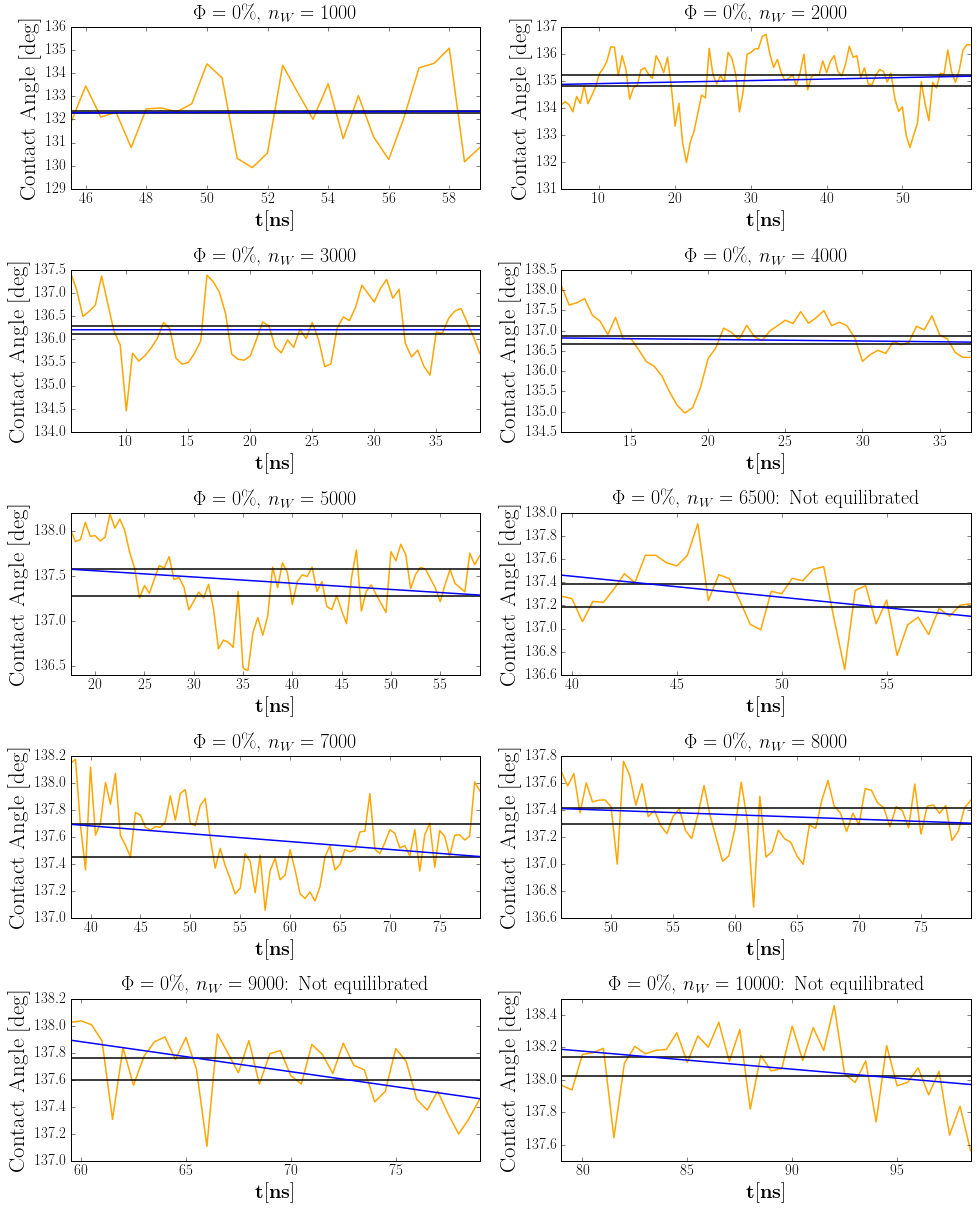

for SAM  0 % and  1000  molecules:
num of good intervals= 5
for SAM  0 % and  2000  molecules:
num of good intervals= 51
for SAM  0 % and  3000  molecules:
num of good intervals= 20
for SAM  0 % and  4000  molecules:
num of good intervals= 8
for SAM  0 % and  5000  molecules:
num of good intervals= 11
for SAM  0 % and  6500  molecules:
 Not equilibrated!
for SAM  0 % and  7000  molecules:
num of good intervals= 21
for SAM  0 % and  8000  molecules:
num of good intervals= 13
for SAM  0 % and  9000  molecules:
 Not equilibrated!
for SAM  0 % and  10000  molecules:
 Not equilibrated!


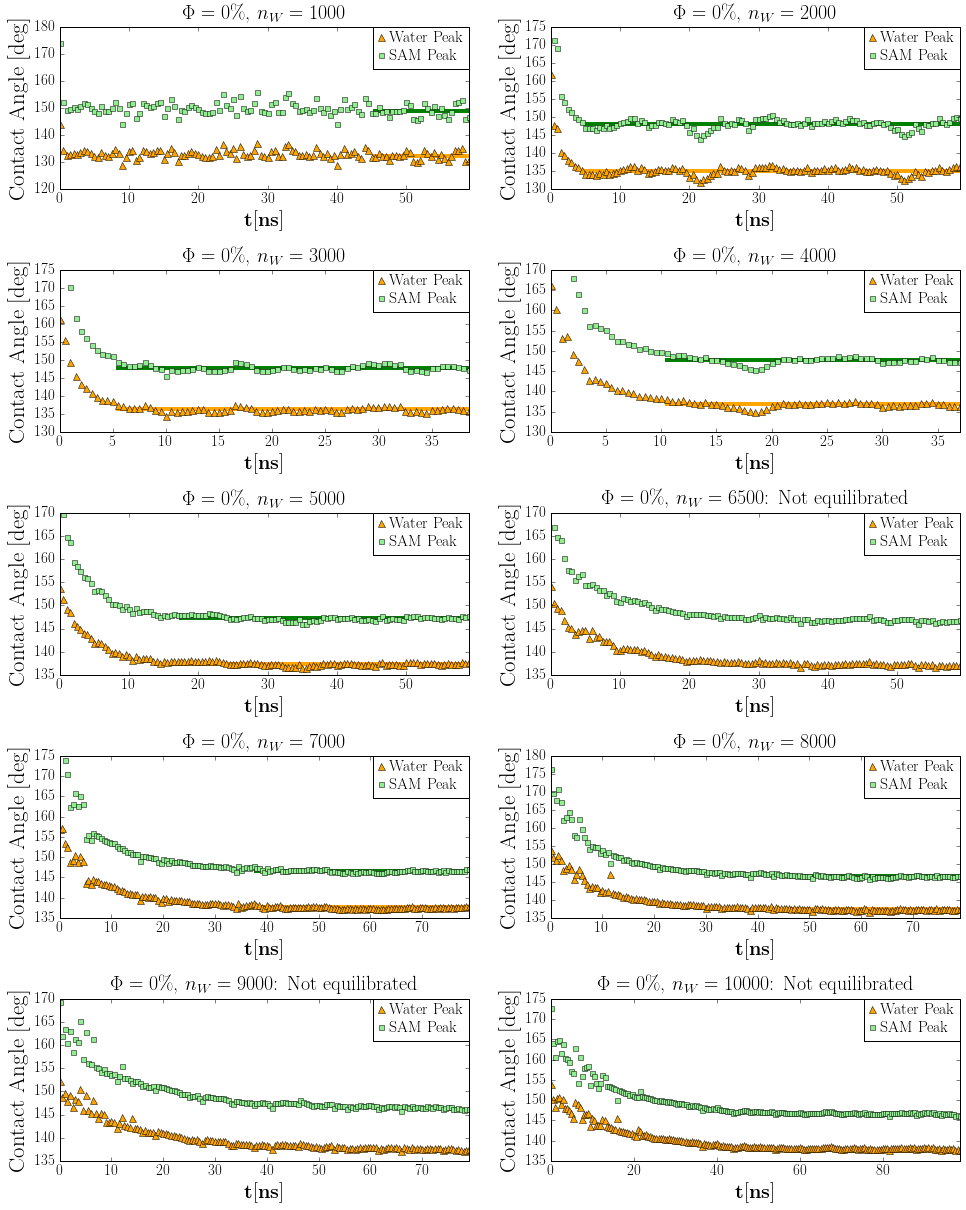

for SAM  0 % and  1000  molecules:
num of good intervals= 9
for SAM  0 % and  2000  molecules:
num of good intervals= 52
for SAM  0 % and  3000  molecules:
num of good intervals= 21
for SAM  0 % and  4000  molecules:
num of good intervals= 8
for SAM  0 % and  5000  molecules:
num of good intervals= 13
for SAM  0 % and  6500  molecules:
 Not equilibrated!
for SAM  0 % and  7000  molecules:
num of good intervals= 20
for SAM  0 % and  8000  molecules:
num of good intervals= 16
for SAM  0 % and  9000  molecules:
 Not equilibrated!
for SAM  0 % and  10000  molecules:
 Not equilibrated!


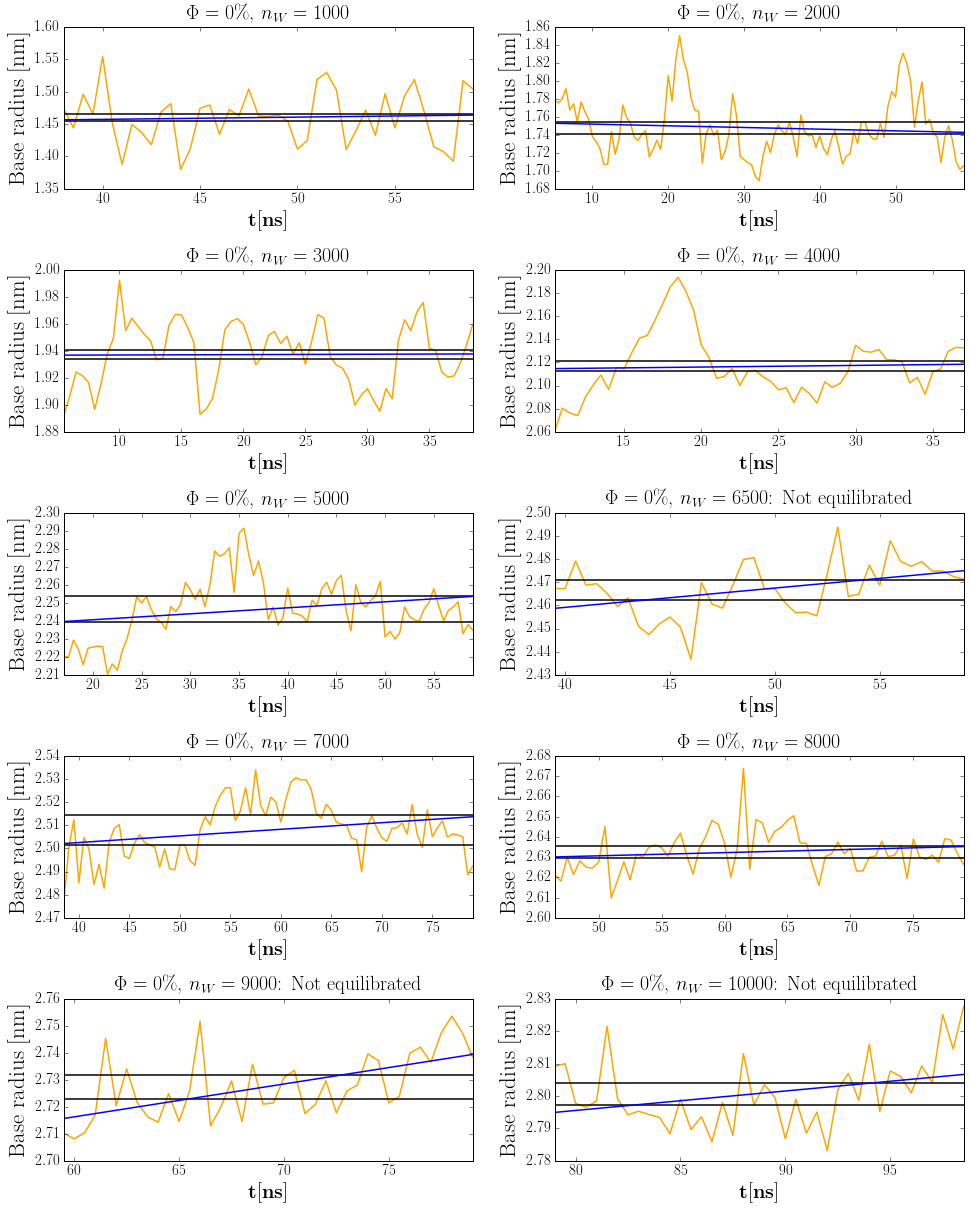

for SAM  0 % and  1000  molecules:
num of good intervals= 9
for SAM  0 % and  2000  molecules:
num of good intervals= 52
for SAM  0 % and  3000  molecules:
num of good intervals= 21
for SAM  0 % and  4000  molecules:
num of good intervals= 8
for SAM  0 % and  5000  molecules:
num of good intervals= 13
for SAM  0 % and  6500  molecules:
 Not equilibrated!
for SAM  0 % and  7000  molecules:
num of good intervals= 20
for SAM  0 % and  8000  molecules:
num of good intervals= 16
for SAM  0 % and  9000  molecules:
 Not equilibrated!
for SAM  0 % and  10000  molecules:
 Not equilibrated!


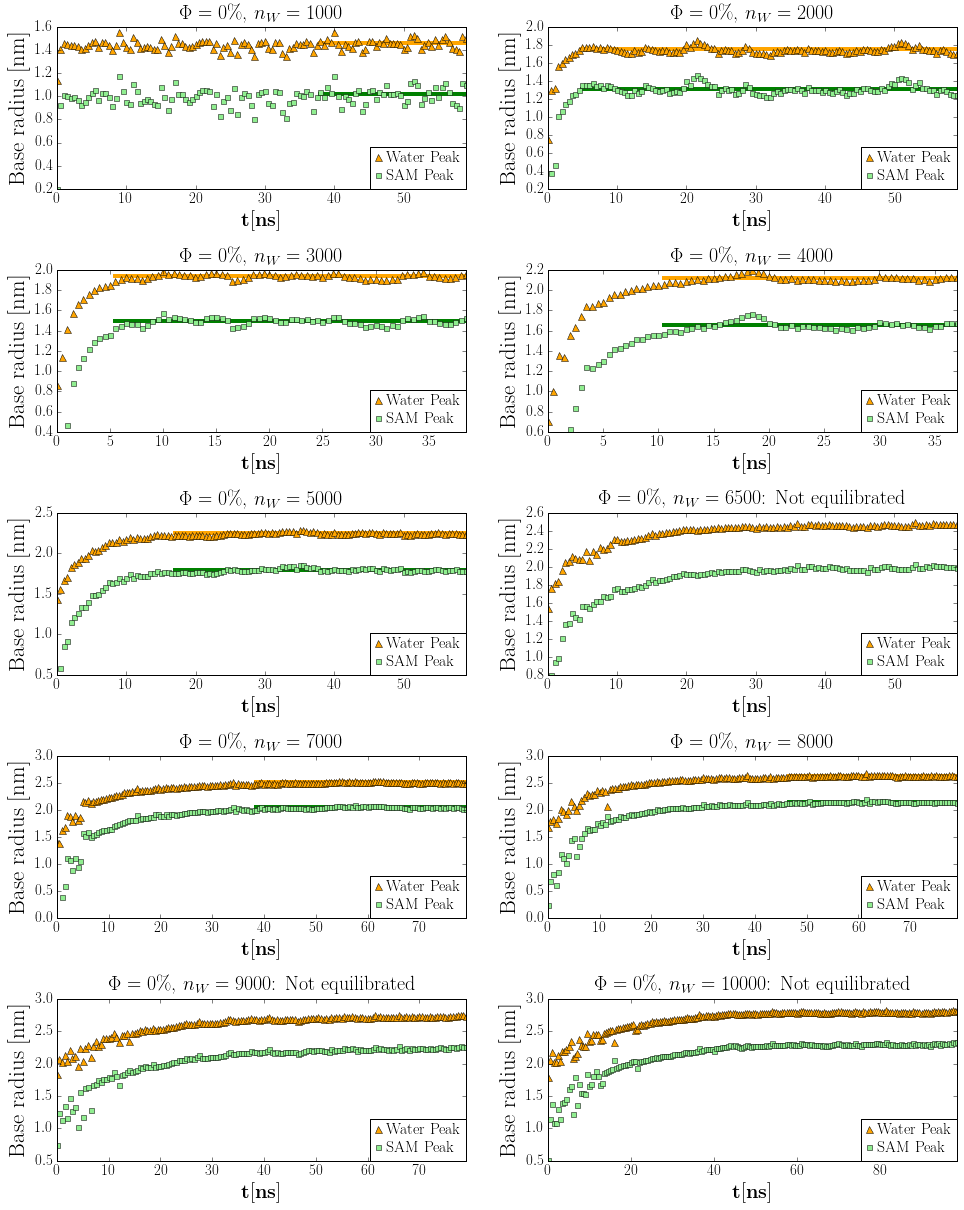

In [15]:
# Set parameters for plots of SAM with pc = 0%
pc=0

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 5
Ncolumns = 2

loopvalues = Waters0

# Plot and analize Base Radii of equilibrated interval for MiddlePoint/GDS and SAM peak

theta_w[pc]=[] # microscopic contact angle of equilibrated system
errortheta_w[pc]=[] # error in the microscopic contact angle of equilibrated system
equil_theta_w[pc]=[] #equilibrated systems
#start_theta_w[pc]=[] #first t (time) of the simulation with finite contact angle -> uncomment if needed
#end_theta_w[pc]=[] # last t (time) of the simulation -> uncomment if needed

theta_w[pc],errortheta_w[pc],equil_theta_w[pc] = equil_results(loopvalues, angles_w, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, anglelabel, anglename)

# Plot and analize Contact Angles of equilibrated interval for MiddlePoint/GDS and SAM peak

# Interface at MiddlePoint/GDS
#errortheta_m[pc]=[]
#theta_m[pc]=[]
#equil_theta_m[pc]=[]
#start_theta_m[pc]=[] -> uncomment if needed
#end_theta_m[pc]=[] -> uncomment if needed

# Interface at SAM peak
errortheta_s[pc]=[]
theta_s[pc]=[]
equil_theta_s[pc]=[]
#start_theta_s[pc]=[] -> uncomment if needed
#end_theta_s[pc]=[] -> uncomment if needed
    
#theta_m[pc],errortheta_m[pc],equil_theta_m[pc], theta_s[pc],errortheta_s[pc],equil_theta_s[pc] =  whole_results(loopvalues, angles_w, angles_s, pc, Nrows, Ncolumns, blocksNum, t, minblocksize)
theta_s[pc],errortheta_s[pc],equil_theta_s[pc] =  whole_results(loopvalues, angles_w, angles_s, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, anglelabel, anglename)

# Plot and analize Base Radii of equilibrated interval for first water peak

error_rbase_w[pc]=[] # error in the microscopic contact angle of equilibrated system
rbase_w[pc]=[] # microscopic contact angle of equilibrated system
equil_rbase_w[pc]=[] #equilibrated systems
#start_rbase_w[b]=[] #first t (time) of the simulation with finite contact angle -> uncomment if needed
#end_rbase_w[b]=[] # last t (time) of the simulation -> uncomment if needed
    
rbase_w[pc],error_rbase_w[pc],equil_rbase_w[pc] = equil_results(loopvalues, radii_w, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, radiuslabel, radiusname)

# Plot and analize Base Radii of equilibrated interval for MiddlePoint/GDS and SAM peak

# Interface at MiddlePoint/GDS
#error_rbase_m[pc]=[]
#rbase_m[pc]=[]
#equil_rbase_m[pc]=[]
#start_rbase_m[pc]=[] -> uncomment if needed
#end_rbase_m[pc]=[] -> uncomment if needed

# Interface at SAM peak
error_rbase_s[pc]=[]
rbase_s[pc]=[]
equil_rbase_s[pc]=[]
#start_rbase_s[pc]=[] -> uncomment if needed
#end_rbase_s[pc]=[] -> uncomment if needed
    
#rbase_m[pc],error_rbase_m[pc],equil_rbase_m[pc], rbase_s[pc],error_rbase_s[pc],equil_rbase_s[pc] =  whole_results(loopvalues, angles_w, angles_s, pc, Nrows, Ncolumns, blocksNum, t, minblocksize)
rbase_s[pc],error_rbase_s[pc],equil_rbase_s[pc] =  whole_results(loopvalues, radii_w, radii_s, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, radiuslabel, radiusname)

for SAM  5 % and  2000  molecules:
num of good intervals= 35
for SAM  5 % and  3000  molecules:
num of good intervals= 36
for SAM  5 % and  4000  molecules:
num of good intervals= 30
for SAM  5 % and  5000  molecules:
num of good intervals= 35
for SAM  5 % and  6500  molecules:
num of good intervals= 27
for SAM  5 % and  7000  molecules:
num of good intervals= 18
for SAM  5 % and  8000  molecules:
num of good intervals= 48
for SAM  5 % and  9000  molecules:
num of good intervals= 31


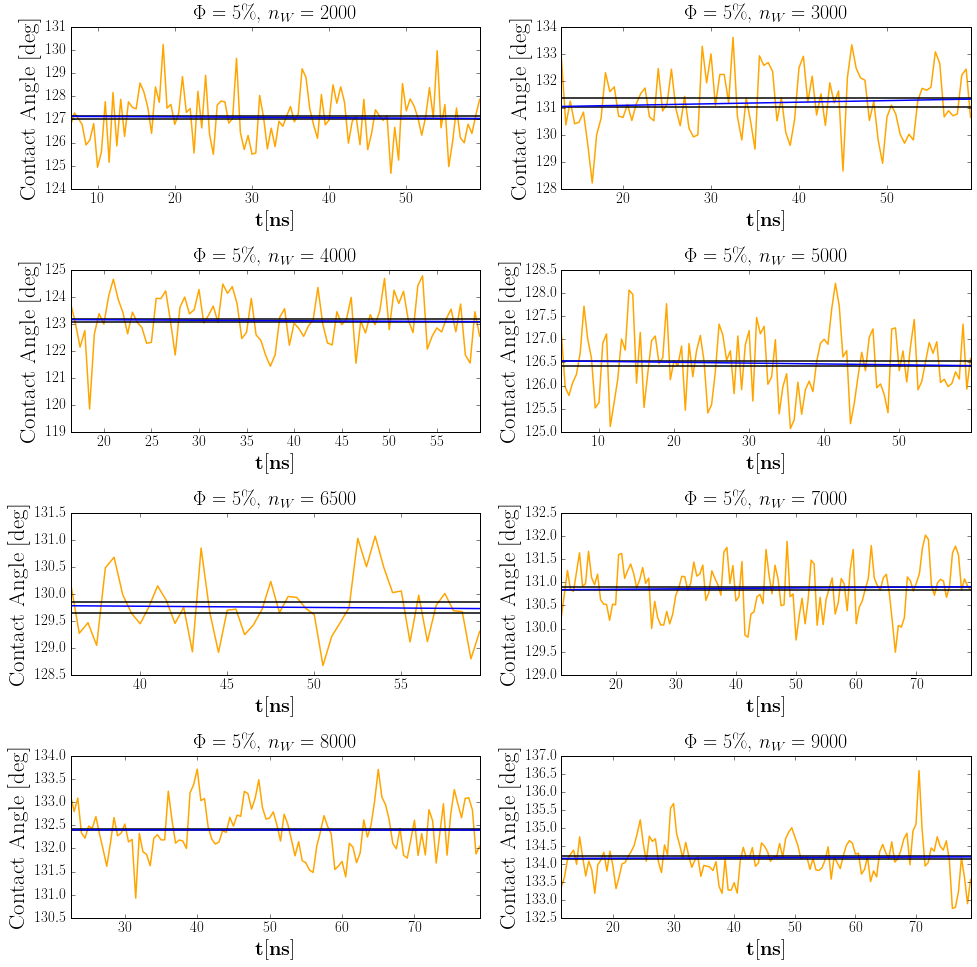

for SAM  5 % and  2000  molecules:
num of good intervals= 35
for SAM  5 % and  3000  molecules:
num of good intervals= 36
for SAM  5 % and  4000  molecules:
num of good intervals= 30
for SAM  5 % and  5000  molecules:
num of good intervals= 35
for SAM  5 % and  6500  molecules:
num of good intervals= 27
for SAM  5 % and  7000  molecules:
num of good intervals= 18
for SAM  5 % and  8000  molecules:
num of good intervals= 48
for SAM  5 % and  9000  molecules:
num of good intervals= 31


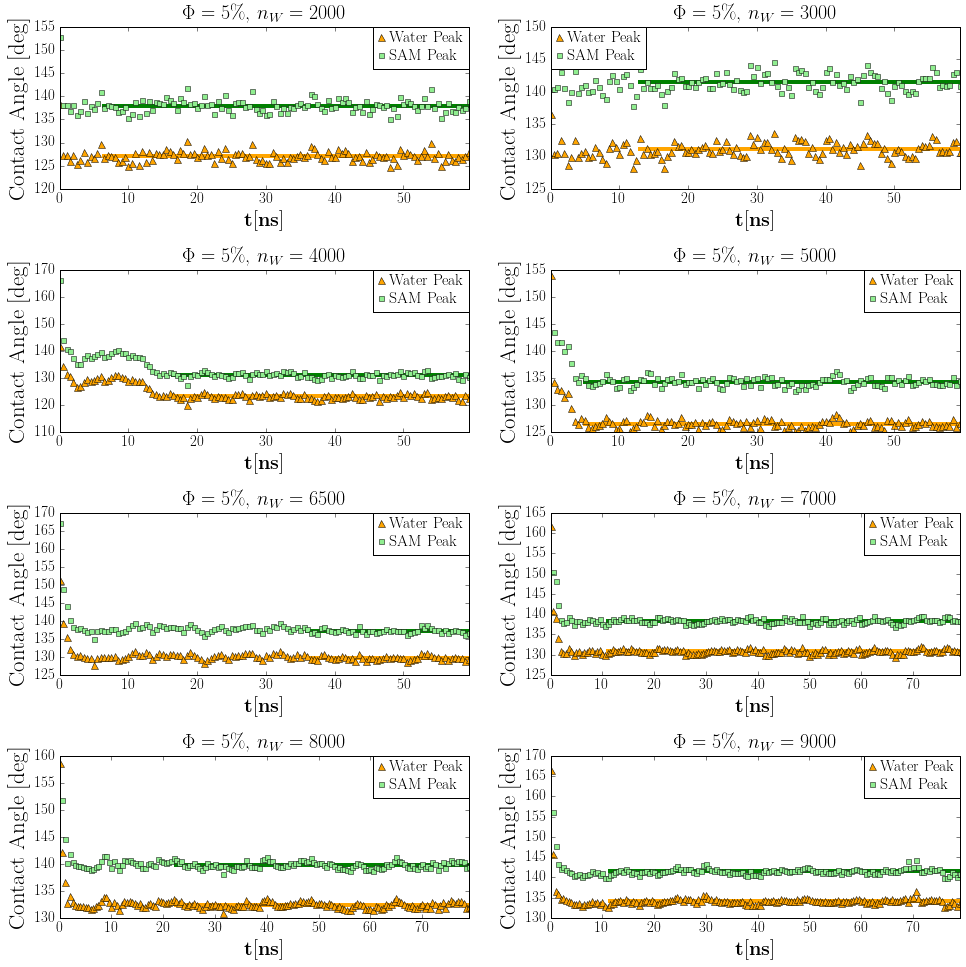

for SAM  5 % and  2000  molecules:
num of good intervals= 34
for SAM  5 % and  3000  molecules:
num of good intervals= 31
for SAM  5 % and  4000  molecules:
num of good intervals= 24
for SAM  5 % and  5000  molecules:
num of good intervals= 43
for SAM  5 % and  6500  molecules:
num of good intervals= 29
for SAM  5 % and  7000  molecules:
num of good intervals= 18
for SAM  5 % and  8000  molecules:
num of good intervals= 48
for SAM  5 % and  9000  molecules:
num of good intervals= 38


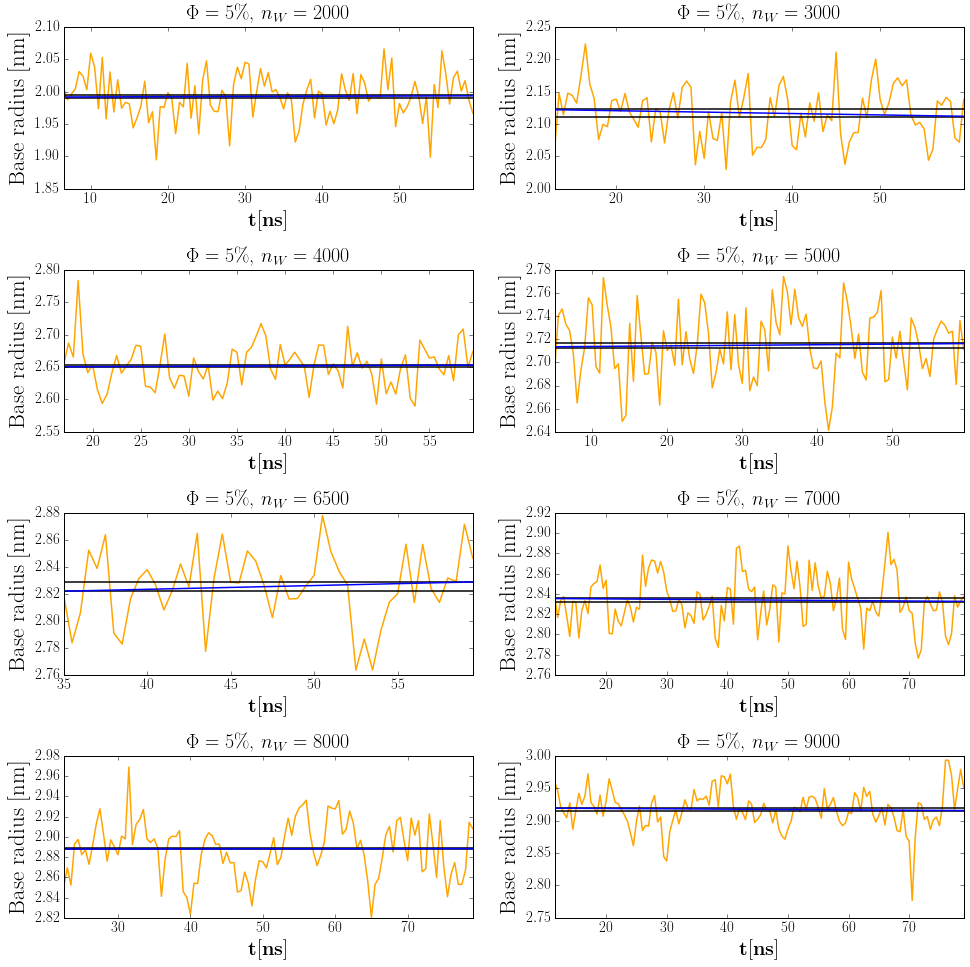

for SAM  5 % and  2000  molecules:
num of good intervals= 34
for SAM  5 % and  3000  molecules:
num of good intervals= 31
for SAM  5 % and  4000  molecules:
num of good intervals= 24
for SAM  5 % and  5000  molecules:
num of good intervals= 43
for SAM  5 % and  6500  molecules:
num of good intervals= 29
for SAM  5 % and  7000  molecules:
num of good intervals= 18
for SAM  5 % and  8000  molecules:
num of good intervals= 48
for SAM  5 % and  9000  molecules:
num of good intervals= 38


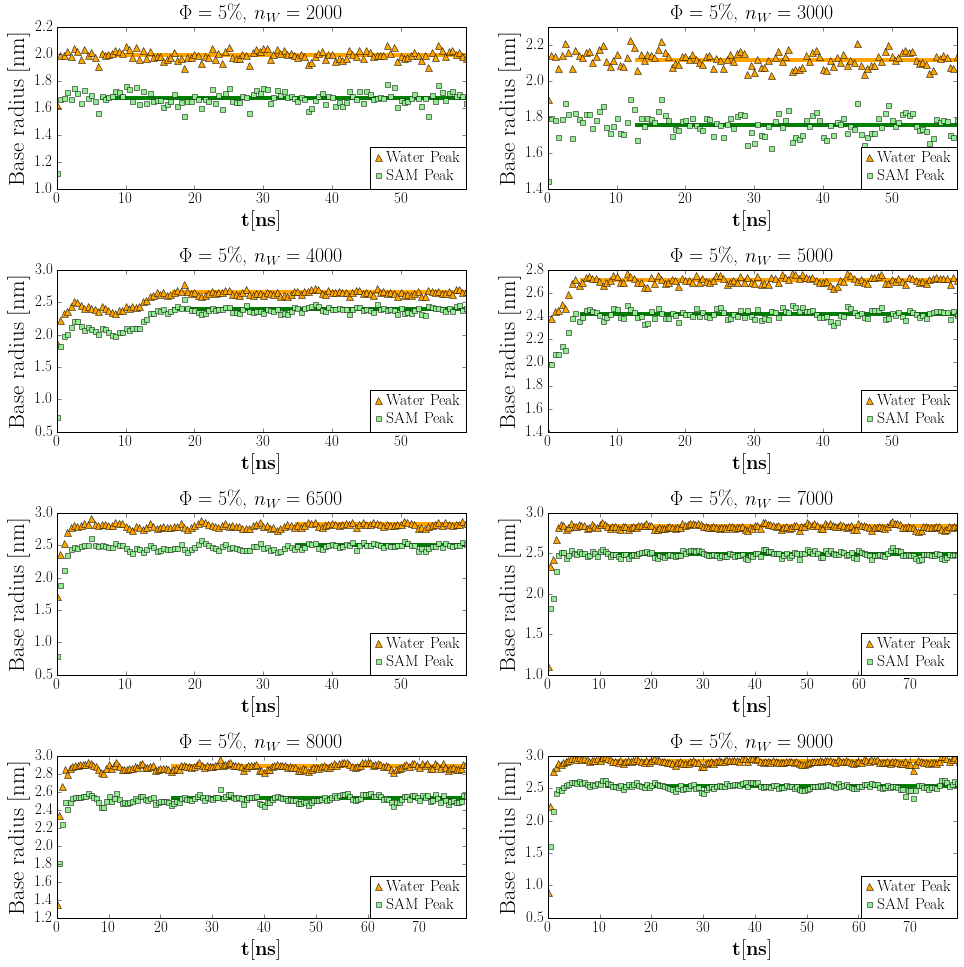

In [16]:
# Set parameters for plots of SAM with pc = 0%
pc=5

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 5
Ncolumns = 2

loopvalues = Waters5

# Plot and analize Base Radii of equilibrated interval for MiddlePoint/GDS and SAM peak

theta_w[pc]=[] # microscopic contact angle of equilibrated system
errortheta_w[pc]=[] # error in the microscopic contact angle of equilibrated system
equil_theta_w[pc]=[] #equilibrated systems
#start_theta_w[pc]=[] #first t (time) of the simulation with finite contact angle -> uncomment if needed
#end_theta_w[pc]=[] # last t (time) of the simulation -> uncomment if needed

theta_w[pc],errortheta_w[pc],equil_theta_w[pc] = equil_results(loopvalues, angles_w, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, anglelabel, anglename)

# Plot and analize Contact Angles of equilibrated interval for MiddlePoint/GDS and SAM peak

# Interface at MiddlePoint/GDS
#errortheta_m[pc]=[]
#theta_m[pc]=[]
#equil_theta_m[pc]=[]
#start_theta_m[pc]=[] -> uncomment if needed
#end_theta_m[pc]=[] -> uncomment if needed

# Interface at SAM peak
errortheta_s[pc]=[]
theta_s[pc]=[]
equil_theta_s[pc]=[]
#start_theta_s[pc]=[] -> uncomment if needed
#end_theta_s[pc]=[] -> uncomment if needed
    
#theta_m[pc],errortheta_m[pc],equil_theta_m[pc], theta_s[pc],errortheta_s[pc],equil_theta_s[pc] =  whole_results(loopvalues, angles_w, angles_s, pc, Nrows, Ncolumns, blocksNum, t, minblocksize)
theta_s[pc],errortheta_s[pc],equil_theta_s[pc] =  whole_results(loopvalues, angles_w, angles_s, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, anglelabel, anglename)

# Plot and analize Base Radii of equilibrated interval for first water peak

error_rbase_w[pc]=[] # error in the microscopic contact angle of equilibrated system
rbase_w[pc]=[] # microscopic contact angle of equilibrated system
equil_rbase_w[pc]=[] #equilibrated systems
#start_rbase_w[b]=[] #first t (time) of the simulation with finite contact angle -> uncomment if needed
#end_rbase_w[b]=[] # last t (time) of the simulation -> uncomment if needed
    
rbase_w[pc],error_rbase_w[pc],equil_rbase_w[pc] = equil_results(loopvalues, radii_w, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, radiuslabel, radiusname)

# Plot and analize Base Radii of equilibrated interval for MiddlePoint/GDS and SAM peak

# Interface at MiddlePoint/GDS
#error_rbase_m[pc]=[]
#rbase_m[pc]=[]
#equil_rbase_m[pc]=[]
#start_rbase_m[pc]=[] -> uncomment if needed
#end_rbase_m[pc]=[] -> uncomment if needed

# Interface at SAM peak
error_rbase_s[pc]=[]
rbase_s[pc]=[]
equil_rbase_s[pc]=[]
#start_rbase_s[pc]=[] -> uncomment if needed
#end_rbase_s[pc]=[] -> uncomment if needed
    
#rbase_m[pc],error_rbase_m[pc],equil_rbase_m[pc], rbase_s[pc],error_rbase_s[pc],equil_rbase_s[pc] =  whole_results(loopvalues, angles_w, angles_s, pc, Nrows, Ncolumns, blocksNum, t, minblocksize)
rbase_s[pc],error_rbase_s[pc],equil_rbase_s[pc] =  whole_results(loopvalues, radii_w, radii_s, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, radiuslabel, radiusname)

for SAM  11 % and  1000  molecules:
num of good intervals= 15
for SAM  11 % and  2000  molecules:
num of good intervals= 6
for SAM  11 % and  3000  molecules:
 Not equilibrated!
for SAM  11 % and  4000  molecules:
num of good intervals= 20
for SAM  11 % and  5000  molecules:
num of good intervals= 5
for SAM  11 % and  6500  molecules:
num of good intervals= 28
for SAM  11 % and  7000  molecules:
num of good intervals= 11
for SAM  11 % and  8000  molecules:
num of good intervals= 16
for SAM  11 % and  9000  molecules:
num of good intervals= 12
for SAM  11 % and  10000  molecules:
num of good intervals= 28


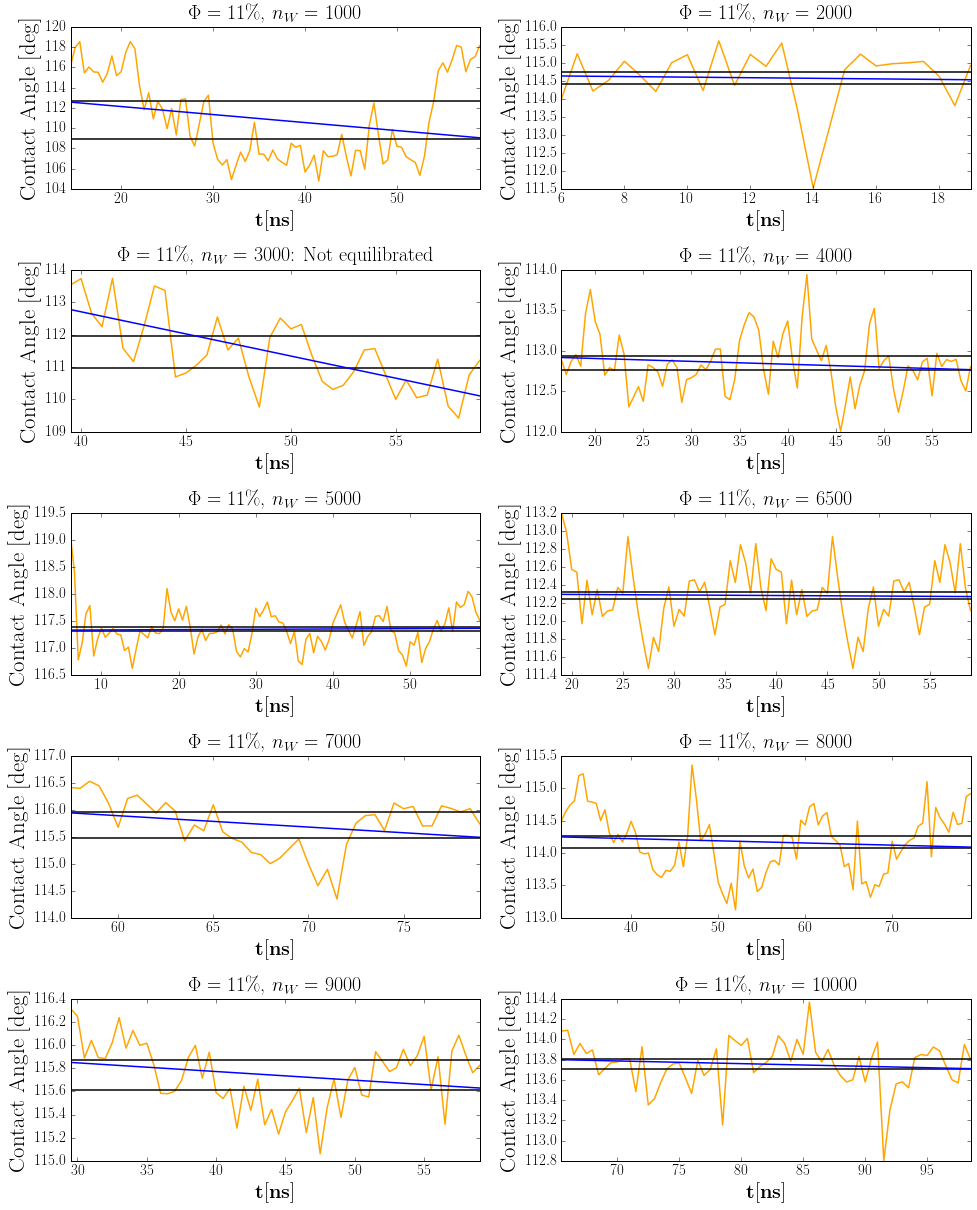

for SAM  11 % and  1000  molecules:
num of good intervals= 15
for SAM  11 % and  2000  molecules:
num of good intervals= 6
for SAM  11 % and  3000  molecules:
 Not equilibrated!
for SAM  11 % and  4000  molecules:
num of good intervals= 20
for SAM  11 % and  5000  molecules:
num of good intervals= 5
for SAM  11 % and  6500  molecules:
num of good intervals= 28
for SAM  11 % and  7000  molecules:
num of good intervals= 11
for SAM  11 % and  8000  molecules:
num of good intervals= 16
for SAM  11 % and  9000  molecules:
num of good intervals= 12
for SAM  11 % and  10000  molecules:
num of good intervals= 28


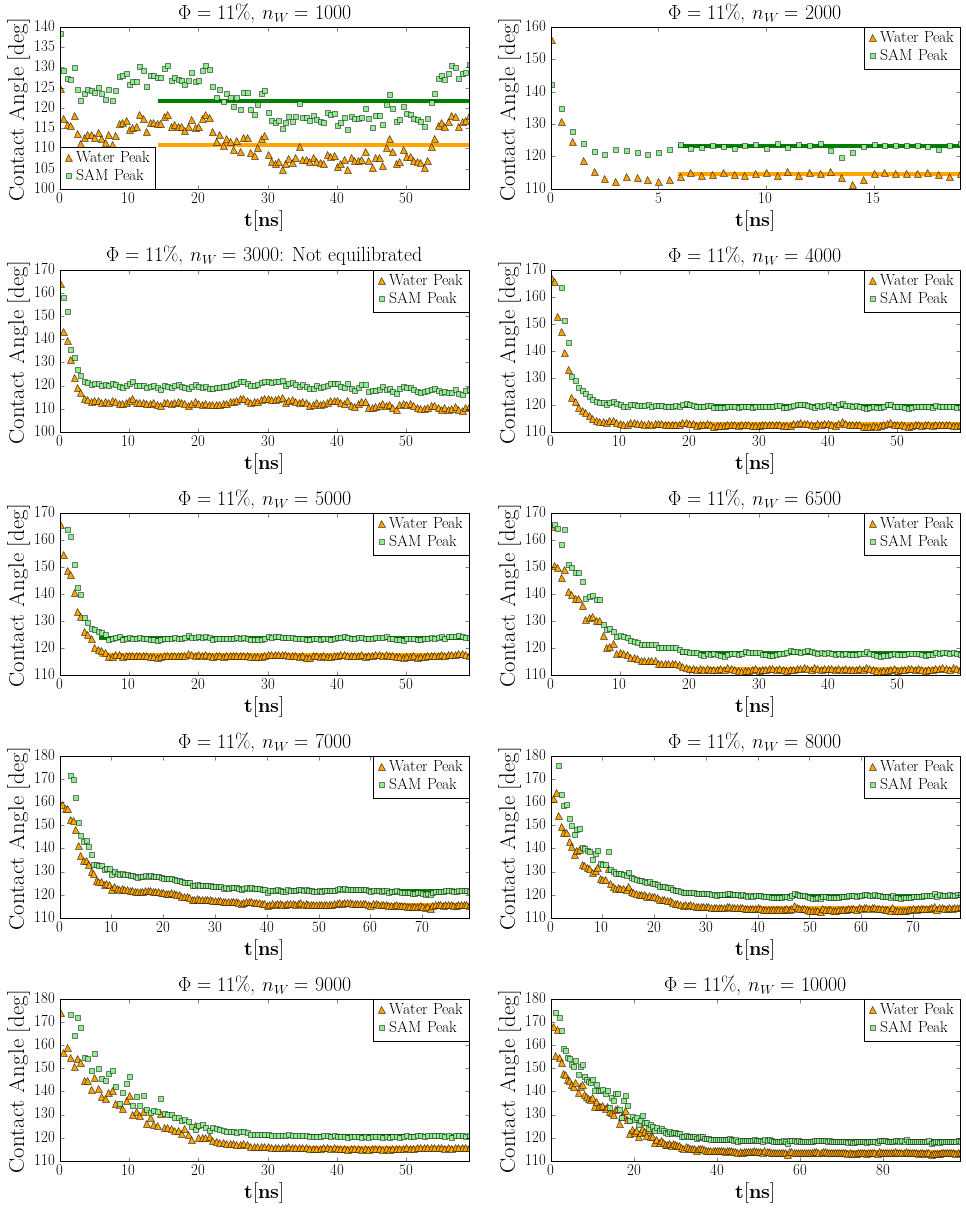

for SAM  11 % and  1000  molecules:
num of good intervals= 21
for SAM  11 % and  2000  molecules:
num of good intervals= 6
for SAM  11 % and  3000  molecules:
 Not equilibrated!
for SAM  11 % and  4000  molecules:
num of good intervals= 26
for SAM  11 % and  5000  molecules:
num of good intervals= 5
for SAM  11 % and  6500  molecules:
num of good intervals= 24
for SAM  11 % and  7000  molecules:
num of good intervals= 11
for SAM  11 % and  8000  molecules:
num of good intervals= 15
for SAM  11 % and  9000  molecules:
num of good intervals= 12
for SAM  11 % and  10000  molecules:
num of good intervals= 32


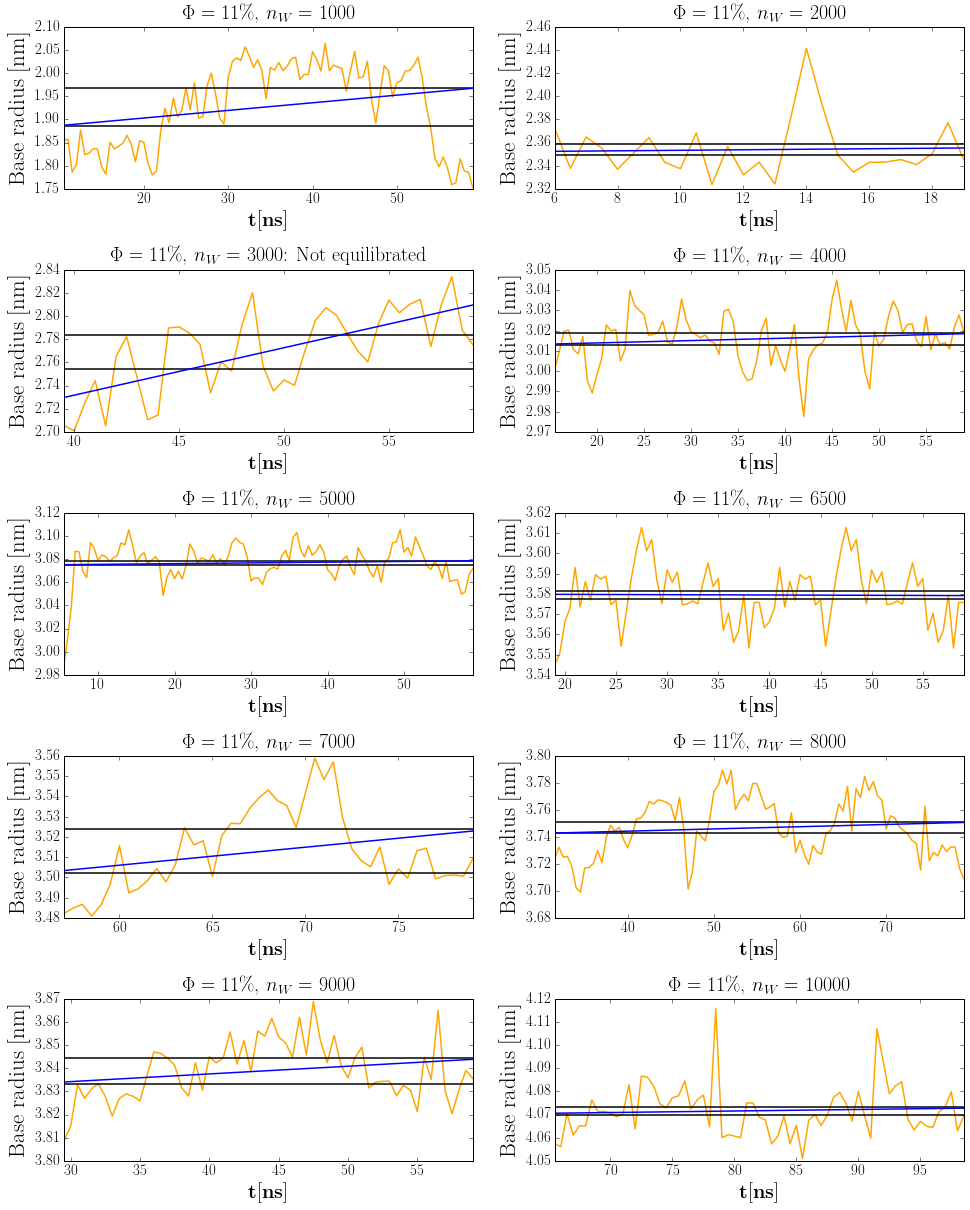

for SAM  11 % and  1000  molecules:
num of good intervals= 21
for SAM  11 % and  2000  molecules:
num of good intervals= 6
for SAM  11 % and  3000  molecules:
 Not equilibrated!
for SAM  11 % and  4000  molecules:
num of good intervals= 26
for SAM  11 % and  5000  molecules:
num of good intervals= 5
for SAM  11 % and  6500  molecules:
num of good intervals= 24
for SAM  11 % and  7000  molecules:
num of good intervals= 11
for SAM  11 % and  8000  molecules:
num of good intervals= 15
for SAM  11 % and  9000  molecules:
num of good intervals= 12
for SAM  11 % and  10000  molecules:
num of good intervals= 32


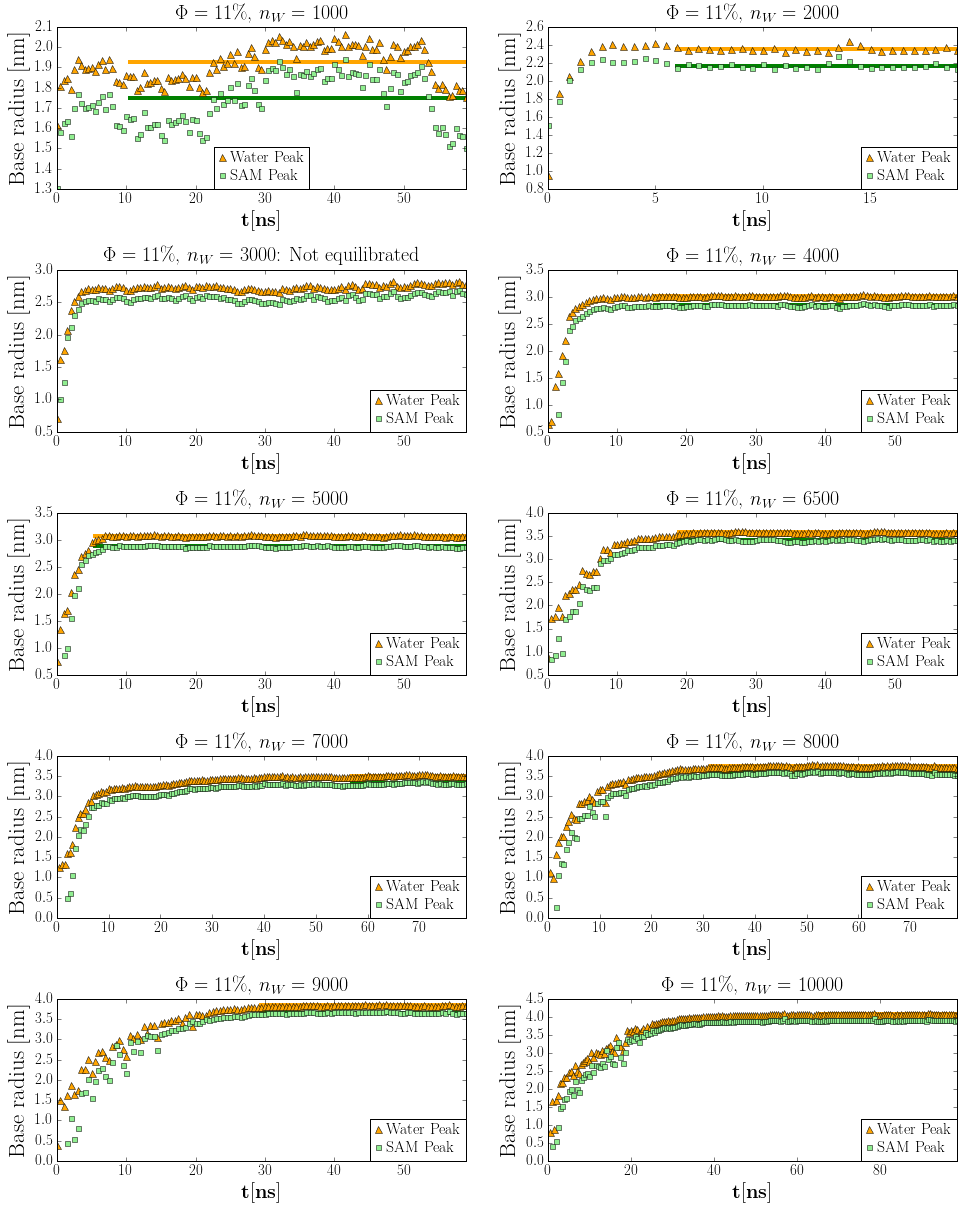

In [17]:
# Set parameters for plots of SAM with pc = 0%
pc=11

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 5
Ncolumns = 2

loopvalues = Waters11

# Plot and analize Base Radii of equilibrated interval for MiddlePoint/GDS and SAM peak

theta_w[pc]=[] # microscopic contact angle of equilibrated system
errortheta_w[pc]=[] # error in the microscopic contact angle of equilibrated system
equil_theta_w[pc]=[] #equilibrated systems
#start_theta_w[pc]=[] #first t (time) of the simulation with finite contact angle -> uncomment if needed
#end_theta_w[pc]=[] # last t (time) of the simulation -> uncomment if needed

theta_w[pc],errortheta_w[pc],equil_theta_w[pc] = equil_results(loopvalues, angles_w, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, anglelabel, anglename)

# Plot and analize Contact Angles of equilibrated interval for MiddlePoint/GDS and SAM peak

# Interface at MiddlePoint/GDS
#errortheta_m[pc]=[]
#theta_m[pc]=[]
#equil_theta_m[pc]=[]
#start_theta_m[pc]=[] -> uncomment if needed
#end_theta_m[pc]=[] -> uncomment if needed

# Interface at SAM peak
errortheta_s[pc]=[]
theta_s[pc]=[]
equil_theta_s[pc]=[]
#start_theta_s[pc]=[] -> uncomment if needed
#end_theta_s[pc]=[] -> uncomment if needed
    
#theta_m[pc],errortheta_m[pc],equil_theta_m[pc], theta_s[pc],errortheta_s[pc],equil_theta_s[pc] =  whole_results(loopvalues, angles_w, angles_s, pc, Nrows, Ncolumns, blocksNum, t, minblocksize)
theta_s[pc],errortheta_s[pc],equil_theta_s[pc] =  whole_results(loopvalues, angles_w, angles_s, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, anglelabel, anglename)

# Plot and analize Base Radii of equilibrated interval for first water peak

error_rbase_w[pc]=[] # error in the microscopic contact angle of equilibrated system
rbase_w[pc]=[] # microscopic contact angle of equilibrated system
equil_rbase_w[pc]=[] #equilibrated systems
#start_rbase_w[b]=[] #first t (time) of the simulation with finite contact angle -> uncomment if needed
#end_rbase_w[b]=[] # last t (time) of the simulation -> uncomment if needed
    
rbase_w[pc],error_rbase_w[pc],equil_rbase_w[pc] = equil_results(loopvalues, radii_w, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, radiuslabel, radiusname)

# Plot and analize Base Radii of equilibrated interval for MiddlePoint/GDS and SAM peak

# Interface at MiddlePoint/GDS
#error_rbase_m[pc]=[]
#rbase_m[pc]=[]
#equil_rbase_m[pc]=[]
#start_rbase_m[pc]=[] -> uncomment if needed
#end_rbase_m[pc]=[] -> uncomment if needed

# Interface at SAM peak
error_rbase_s[pc]=[]
rbase_s[pc]=[]
equil_rbase_s[pc]=[]
#start_rbase_s[pc]=[] -> uncomment if needed
#end_rbase_s[pc]=[] -> uncomment if needed
    
#rbase_m[pc],error_rbase_m[pc],equil_rbase_m[pc], rbase_s[pc],error_rbase_s[pc],equil_rbase_s[pc] =  whole_results(loopvalues, angles_w, angles_s, pc, Nrows, Ncolumns, blocksNum, t, minblocksize)
rbase_s[pc],error_rbase_s[pc],equil_rbase_s[pc] =  whole_results(loopvalues, radii_w, radii_s, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, radiuslabel, radiusname)

for SAM  17 % and  1000  molecules:
 Not equilibrated!
for SAM  17 % and  2000  molecules:
num of good intervals= 36
for SAM  17 % and  3000  molecules:
num of good intervals= 15
for SAM  17 % and  4000  molecules:
num of good intervals= 13
for SAM  17 % and  5000  molecules:
num of good intervals= 23
for SAM  17 % and  6500  molecules:
num of good intervals= 29
for SAM  17 % and  7000  molecules:
num of good intervals= 4
for SAM  17 % and  8000  molecules:
num of good intervals= 7
for SAM  17 % and  9000  molecules:
num of good intervals= 22
for SAM  17 % and  10000  molecules:
num of good intervals= 15


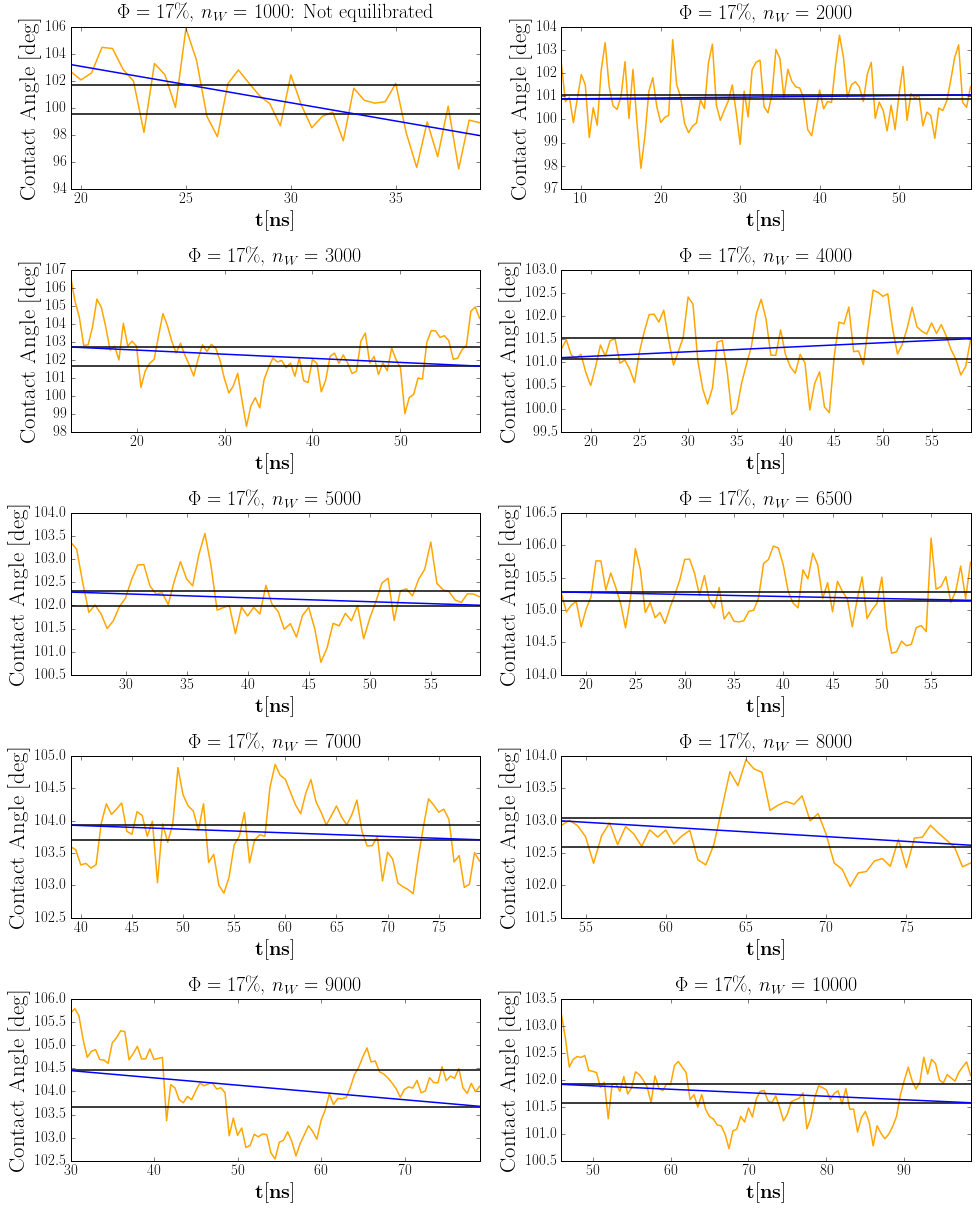

for SAM  17 % and  1000  molecules:
 Not equilibrated!
for SAM  17 % and  2000  molecules:
num of good intervals= 36
for SAM  17 % and  3000  molecules:
num of good intervals= 15
for SAM  17 % and  4000  molecules:
num of good intervals= 13
for SAM  17 % and  5000  molecules:
num of good intervals= 23
for SAM  17 % and  6500  molecules:
num of good intervals= 29
for SAM  17 % and  7000  molecules:
num of good intervals= 4
for SAM  17 % and  8000  molecules:
num of good intervals= 7
for SAM  17 % and  9000  molecules:
num of good intervals= 22
for SAM  17 % and  10000  molecules:
num of good intervals= 15


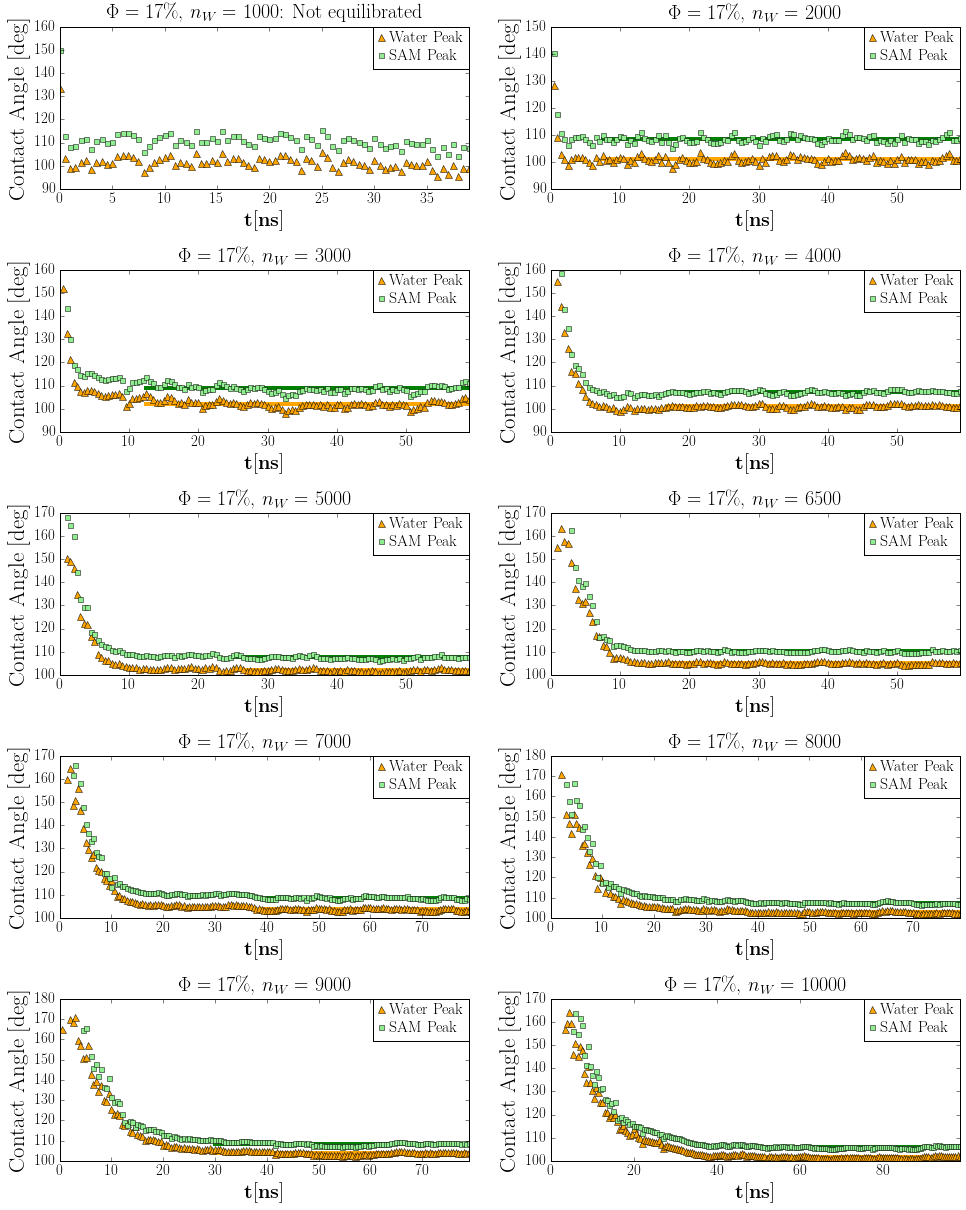

for SAM  17 % and  1000  molecules:
 Not equilibrated!
for SAM  17 % and  2000  molecules:
num of good intervals= 23
for SAM  17 % and  3000  molecules:
num of good intervals= 14
for SAM  17 % and  4000  molecules:
num of good intervals= 3
for SAM  17 % and  5000  molecules:
num of good intervals= 27
for SAM  17 % and  6500  molecules:
num of good intervals= 61
for SAM  17 % and  7000  molecules:
num of good intervals= 24
for SAM  17 % and  8000  molecules:
num of good intervals= 7
for SAM  17 % and  9000  molecules:
num of good intervals= 24
for SAM  17 % and  10000  molecules:
num of good intervals= 14


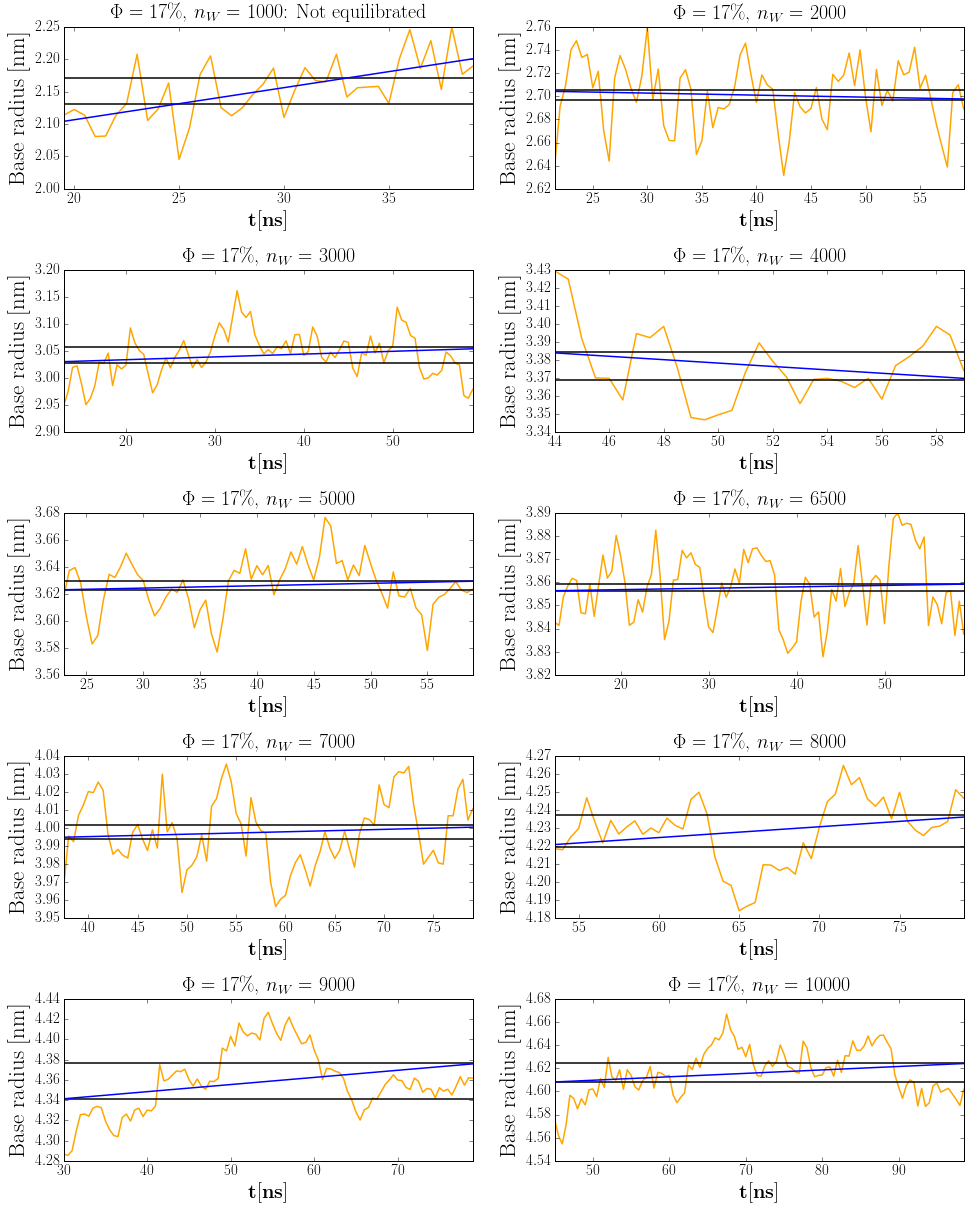

for SAM  17 % and  1000  molecules:
 Not equilibrated!
for SAM  17 % and  2000  molecules:
num of good intervals= 23
for SAM  17 % and  3000  molecules:
num of good intervals= 14
for SAM  17 % and  4000  molecules:
num of good intervals= 3
for SAM  17 % and  5000  molecules:
num of good intervals= 27
for SAM  17 % and  6500  molecules:
num of good intervals= 61
for SAM  17 % and  7000  molecules:
num of good intervals= 24
for SAM  17 % and  8000  molecules:
num of good intervals= 7
for SAM  17 % and  9000  molecules:
num of good intervals= 24
for SAM  17 % and  10000  molecules:
num of good intervals= 14


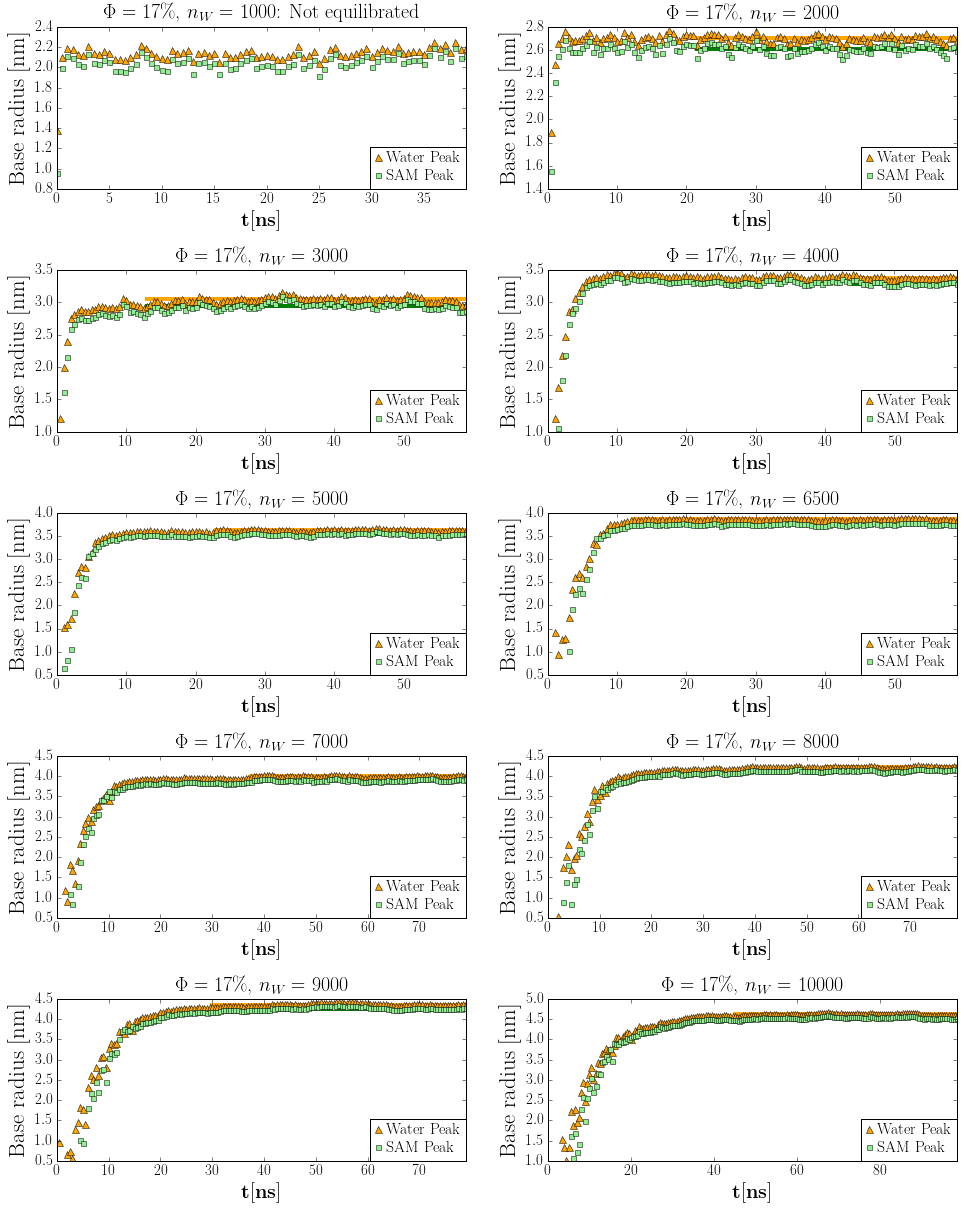

In [18]:
# Set parameters for plots of SAM with pc = 0%
pc=17

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 5
Ncolumns = 2

loopvalues = Waters17

# Plot and analize Base Radii of equilibrated interval for MiddlePoint/GDS and SAM peak

theta_w[pc]=[] # microscopic contact angle of equilibrated system
errortheta_w[pc]=[] # error in the microscopic contact angle of equilibrated system
equil_theta_w[pc]=[] #equilibrated systems
#start_theta_w[pc]=[] #first t (time) of the simulation with finite contact angle -> uncomment if needed
#end_theta_w[pc]=[] # last t (time) of the simulation -> uncomment if needed

theta_w[pc],errortheta_w[pc],equil_theta_w[pc] = equil_results(loopvalues, angles_w, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, anglelabel, anglename)

# Plot and analize Contact Angles of equilibrated interval for MiddlePoint/GDS and SAM peak

# Interface at MiddlePoint/GDS
#errortheta_m[pc]=[]
#theta_m[pc]=[]
#equil_theta_m[pc]=[]
#start_theta_m[pc]=[] -> uncomment if needed
#end_theta_m[pc]=[] -> uncomment if needed

# Interface at SAM peak
errortheta_s[pc]=[]
theta_s[pc]=[]
equil_theta_s[pc]=[]
#start_theta_s[pc]=[] -> uncomment if needed
#end_theta_s[pc]=[] -> uncomment if needed
    
#theta_m[pc],errortheta_m[pc],equil_theta_m[pc], theta_s[pc],errortheta_s[pc],equil_theta_s[pc] =  whole_results(loopvalues, angles_w, angles_s, pc, Nrows, Ncolumns, blocksNum, t, minblocksize)
theta_s[pc],errortheta_s[pc],equil_theta_s[pc] =  whole_results(loopvalues, angles_w, angles_s, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, anglelabel, anglename)

# Plot and analize Base Radii of equilibrated interval for first water peak

error_rbase_w[pc]=[] # error in the microscopic contact angle of equilibrated system
rbase_w[pc]=[] # microscopic contact angle of equilibrated system
equil_rbase_w[pc]=[] #equilibrated systems
#start_rbase_w[b]=[] #first t (time) of the simulation with finite contact angle -> uncomment if needed
#end_rbase_w[b]=[] # last t (time) of the simulation -> uncomment if needed
    
rbase_w[pc],error_rbase_w[pc],equil_rbase_w[pc] = equil_results(loopvalues, radii_w, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, radiuslabel, radiusname)

# Plot and analize Base Radii of equilibrated interval for MiddlePoint/GDS and SAM peak

# Interface at MiddlePoint/GDS
#error_rbase_m[pc]=[]
#rbase_m[pc]=[]
#equil_rbase_m[pc]=[]
#start_rbase_m[pc]=[] -> uncomment if needed
#end_rbase_m[pc]=[] -> uncomment if needed

# Interface at SAM peak
error_rbase_s[pc]=[]
rbase_s[pc]=[]
equil_rbase_s[pc]=[]
#start_rbase_s[pc]=[] -> uncomment if needed
#end_rbase_s[pc]=[] -> uncomment if needed
    
#rbase_m[pc],error_rbase_m[pc],equil_rbase_m[pc], rbase_s[pc],error_rbase_s[pc],equil_rbase_s[pc] =  whole_results(loopvalues, angles_w, angles_s, pc, Nrows, Ncolumns, blocksNum, t, minblocksize)
rbase_s[pc],error_rbase_s[pc],equil_rbase_s[pc] =  whole_results(loopvalues, radii_w, radii_s, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, radiuslabel, radiusname)

for SAM  21 % and  2000  molecules:
num of good intervals= 14
for SAM  21 % and  3000  molecules:
num of good intervals= 49
for SAM  21 % and  4000  molecules:
num of good intervals= 13
for SAM  21 % and  5000  molecules:
num of good intervals= 31
for SAM  21 % and  6500  molecules:
num of good intervals= 54
for SAM  21 % and  9000  molecules:
num of good intervals= 34


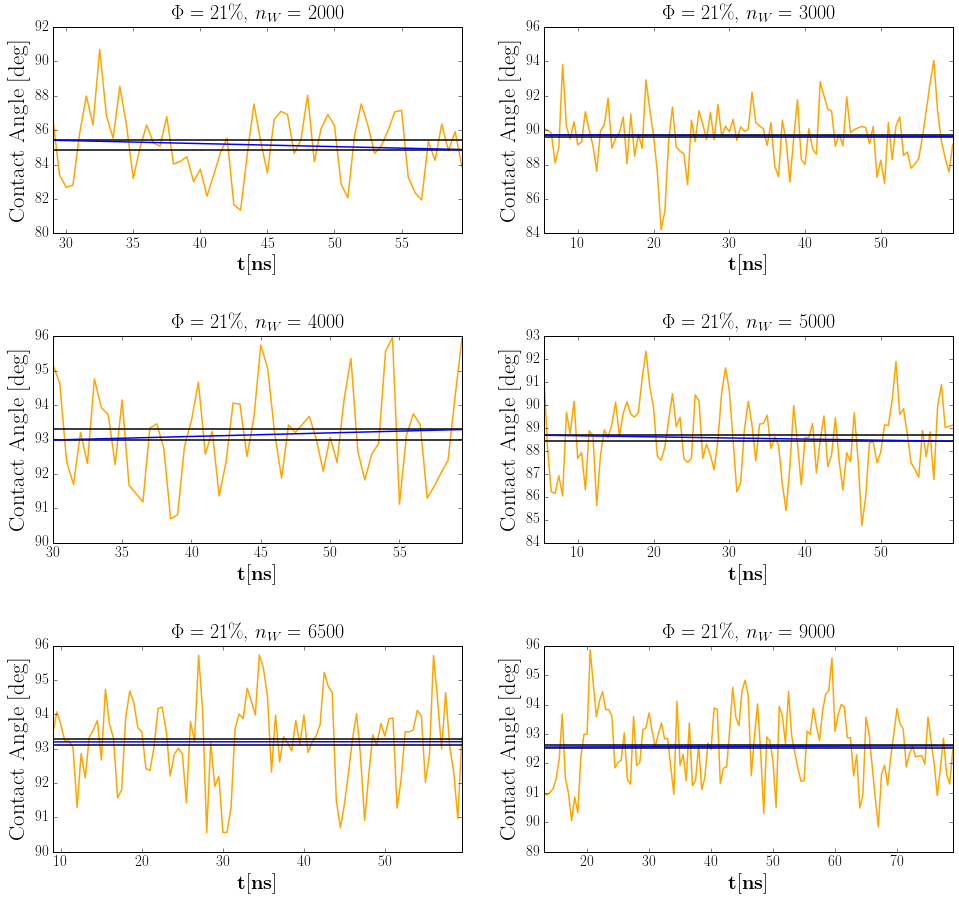

for SAM  21 % and  2000  molecules:
num of good intervals= 14
for SAM  21 % and  3000  molecules:
num of good intervals= 49
for SAM  21 % and  4000  molecules:
num of good intervals= 13
for SAM  21 % and  5000  molecules:
num of good intervals= 31
for SAM  21 % and  6500  molecules:
num of good intervals= 54
for SAM  21 % and  9000  molecules:
num of good intervals= 34


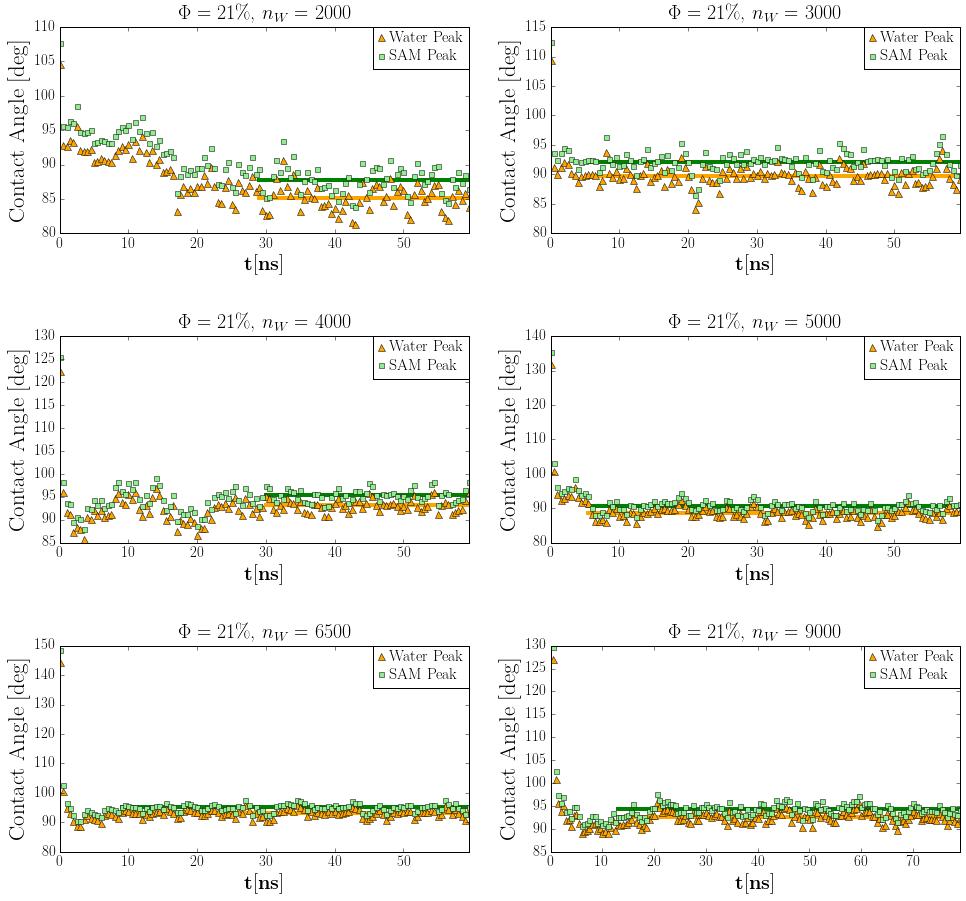

for SAM  21 % and  2000  molecules:
num of good intervals= 19
for SAM  21 % and  3000  molecules:
num of good intervals= 37
for SAM  21 % and  4000  molecules:
num of good intervals= 9
for SAM  21 % and  5000  molecules:
num of good intervals= 28
for SAM  21 % and  6500  molecules:
num of good intervals= 46
for SAM  21 % and  9000  molecules:
num of good intervals= 44


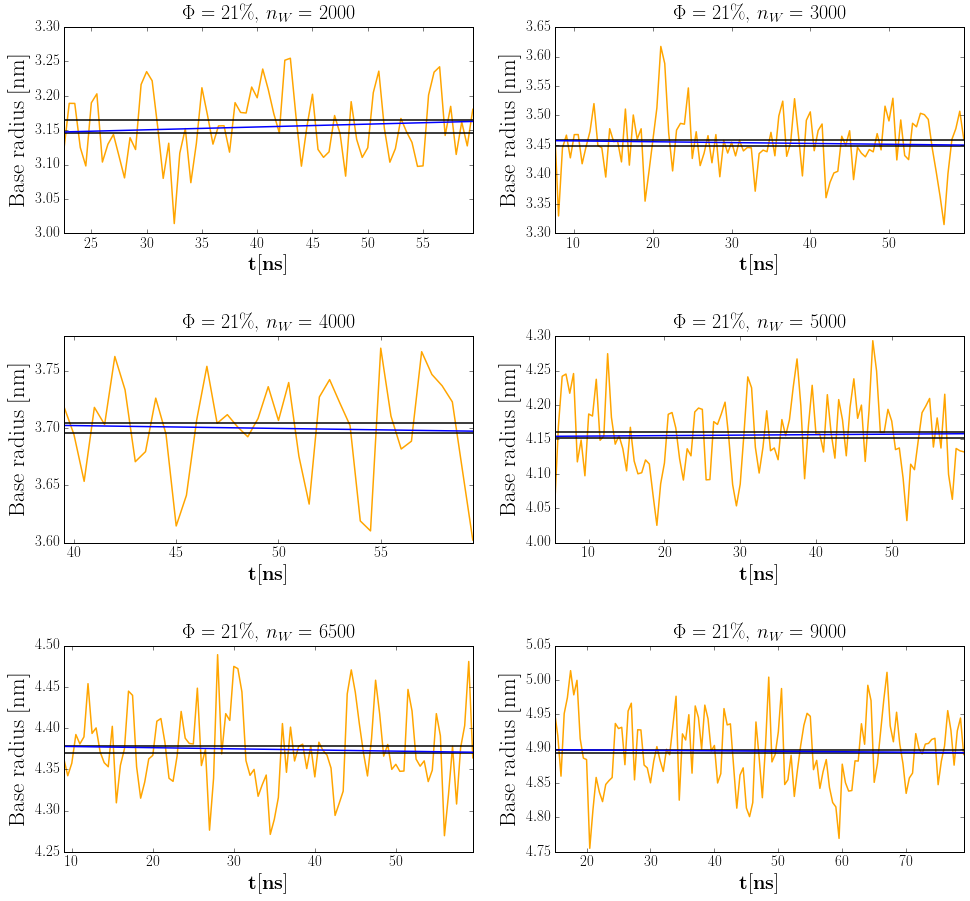

for SAM  21 % and  2000  molecules:
num of good intervals= 19
for SAM  21 % and  3000  molecules:
num of good intervals= 37
for SAM  21 % and  4000  molecules:
num of good intervals= 9
for SAM  21 % and  5000  molecules:
num of good intervals= 28
for SAM  21 % and  6500  molecules:
num of good intervals= 46
for SAM  21 % and  9000  molecules:
num of good intervals= 44


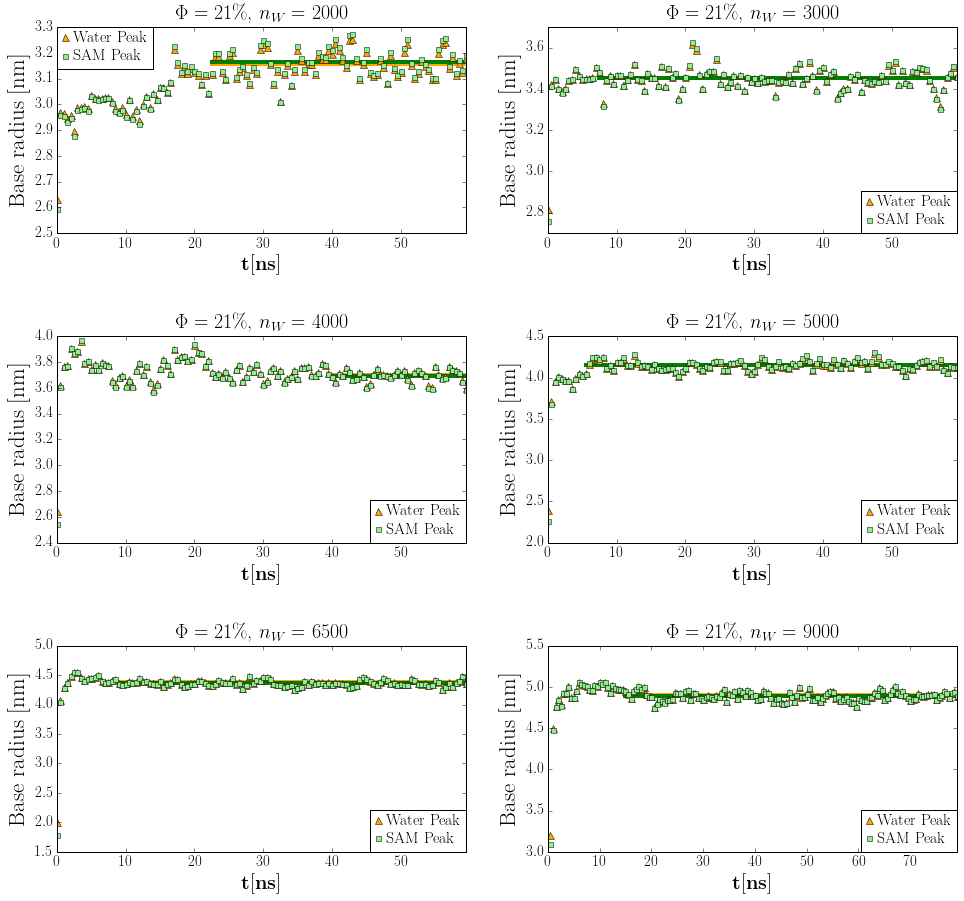

In [19]:
# Set parameters for plots of SAM with pc = 0%
pc=21

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 4
Ncolumns = 2

loopvalues = Waters21

# Plot and analize Base Radii of equilibrated interval for MiddlePoint/GDS and SAM peak

theta_w[pc]=[] # microscopic contact angle of equilibrated system
errortheta_w[pc]=[] # error in the microscopic contact angle of equilibrated system
equil_theta_w[pc]=[] #equilibrated systems
#start_theta_w[pc]=[] #first t (time) of the simulation with finite contact angle -> uncomment if needed
#end_theta_w[pc]=[] # last t (time) of the simulation -> uncomment if needed

theta_w[pc],errortheta_w[pc],equil_theta_w[pc] = equil_results(loopvalues, angles_w, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, anglelabel, anglename)

# Plot and analize Contact Angles of equilibrated interval for MiddlePoint/GDS and SAM peak

# Interface at MiddlePoint/GDS
#errortheta_m[pc]=[]
#theta_m[pc]=[]
#equil_theta_m[pc]=[]
#start_theta_m[pc]=[] -> uncomment if needed
#end_theta_m[pc]=[] -> uncomment if needed

# Interface at SAM peak
errortheta_s[pc]=[]
theta_s[pc]=[]
equil_theta_s[pc]=[]
#start_theta_s[pc]=[] -> uncomment if needed
#end_theta_s[pc]=[] -> uncomment if needed
    
#theta_m[pc],errortheta_m[pc],equil_theta_m[pc], theta_s[pc],errortheta_s[pc],equil_theta_s[pc] =  whole_results(loopvalues, angles_w, angles_s, pc, Nrows, Ncolumns, blocksNum, t, minblocksize)
theta_s[pc],errortheta_s[pc],equil_theta_s[pc] =  whole_results(loopvalues, angles_w, angles_s, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, anglelabel, anglename)

# Plot and analize Base Radii of equilibrated interval for first water peak

error_rbase_w[pc]=[] # error in the microscopic contact angle of equilibrated system
rbase_w[pc]=[] # microscopic contact angle of equilibrated system
equil_rbase_w[pc]=[] #equilibrated systems
#start_rbase_w[b]=[] #first t (time) of the simulation with finite contact angle -> uncomment if needed
#end_rbase_w[b]=[] # last t (time) of the simulation -> uncomment if needed
    
rbase_w[pc],error_rbase_w[pc],equil_rbase_w[pc] = equil_results(loopvalues, radii_w, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, radiuslabel, radiusname)

# Plot and analize Base Radii of equilibrated interval for MiddlePoint/GDS and SAM peak

# Interface at MiddlePoint/GDS
#error_rbase_m[pc]=[]
#rbase_m[pc]=[]
#equil_rbase_m[pc]=[]
#start_rbase_m[pc]=[] -> uncomment if needed
#end_rbase_m[pc]=[] -> uncomment if needed

# Interface at SAM peak
error_rbase_s[pc]=[]
rbase_s[pc]=[]
equil_rbase_s[pc]=[]
#start_rbase_s[pc]=[] -> uncomment if needed
#end_rbase_s[pc]=[] -> uncomment if needed
    
#rbase_m[pc],error_rbase_m[pc],equil_rbase_m[pc], rbase_s[pc],error_rbase_s[pc],equil_rbase_s[pc] =  whole_results(loopvalues, angles_w, angles_s, pc, Nrows, Ncolumns, blocksNum, t, minblocksize)
rbase_s[pc],error_rbase_s[pc],equil_rbase_s[pc] =  whole_results(loopvalues, radii_w, radii_s, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, radiuslabel, radiusname)

for SAM  25 % and  3000  molecules:
num of good intervals= 38
for SAM  25 % and  4000  molecules:
num of good intervals= 1
for SAM  25 % and  5000  molecules:
num of good intervals= 45
for SAM  25 % and  6500  molecules:
num of good intervals= 5
for SAM  25 % and  7000  molecules:
num of good intervals= 44
for SAM  25 % and  9000  molecules:
num of good intervals= 2


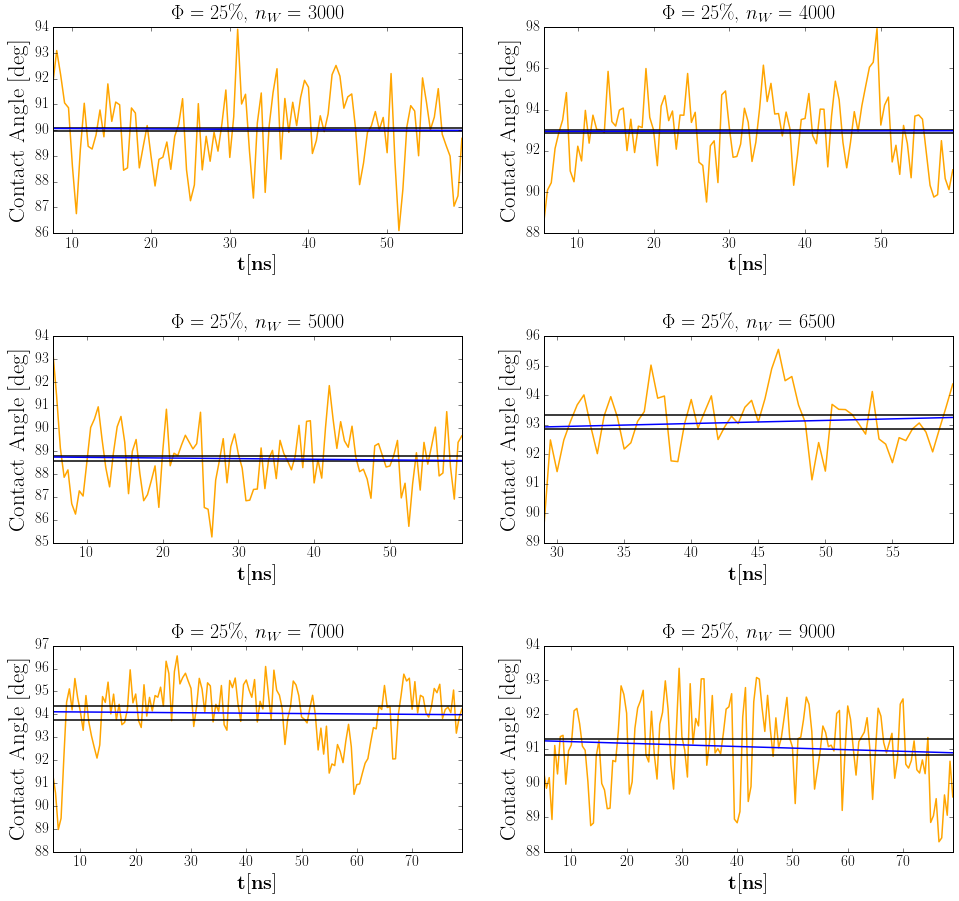

for SAM  25 % and  3000  molecules:
num of good intervals= 38
for SAM  25 % and  4000  molecules:
num of good intervals= 1
for SAM  25 % and  5000  molecules:
num of good intervals= 45
for SAM  25 % and  6500  molecules:
num of good intervals= 5
for SAM  25 % and  7000  molecules:
num of good intervals= 44
for SAM  25 % and  9000  molecules:
num of good intervals= 2


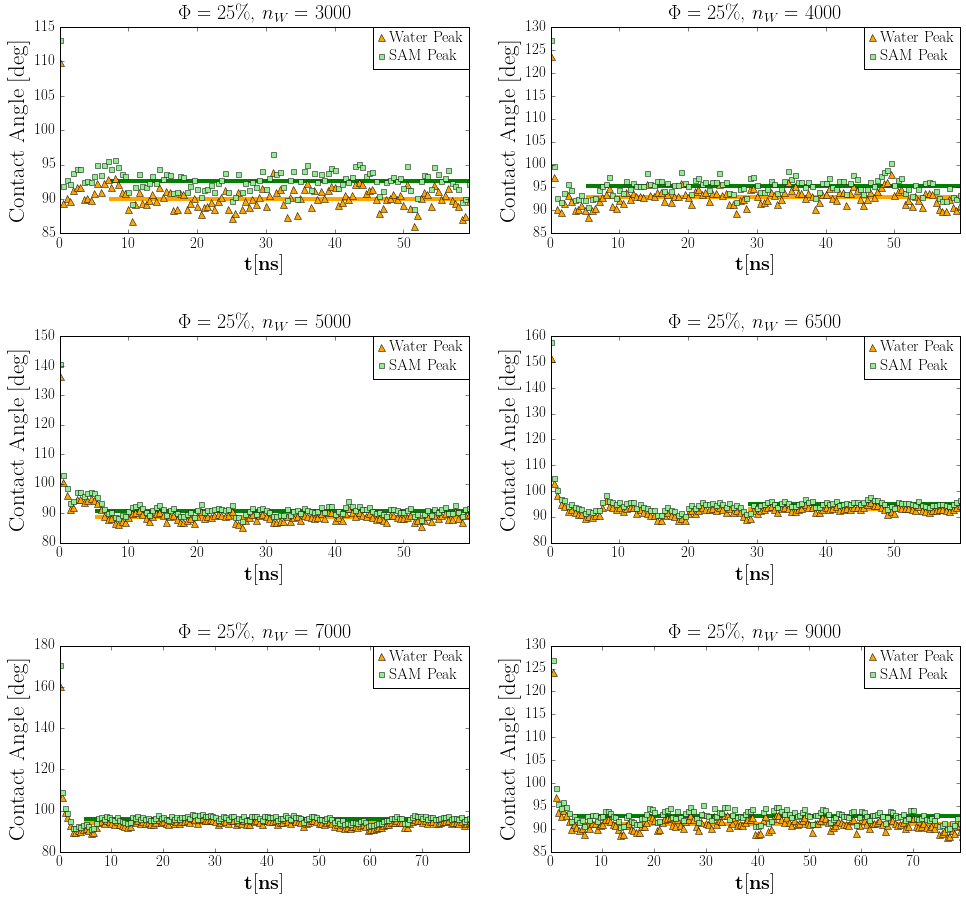

for SAM  25 % and  3000  molecules:
num of good intervals= 28
for SAM  25 % and  4000  molecules:
num of good intervals= 1
for SAM  25 % and  5000  molecules:
num of good intervals= 33
for SAM  25 % and  6500  molecules:
num of good intervals= 10
for SAM  25 % and  7000  molecules:
num of good intervals= 45
for SAM  25 % and  9000  molecules:
num of good intervals= 4


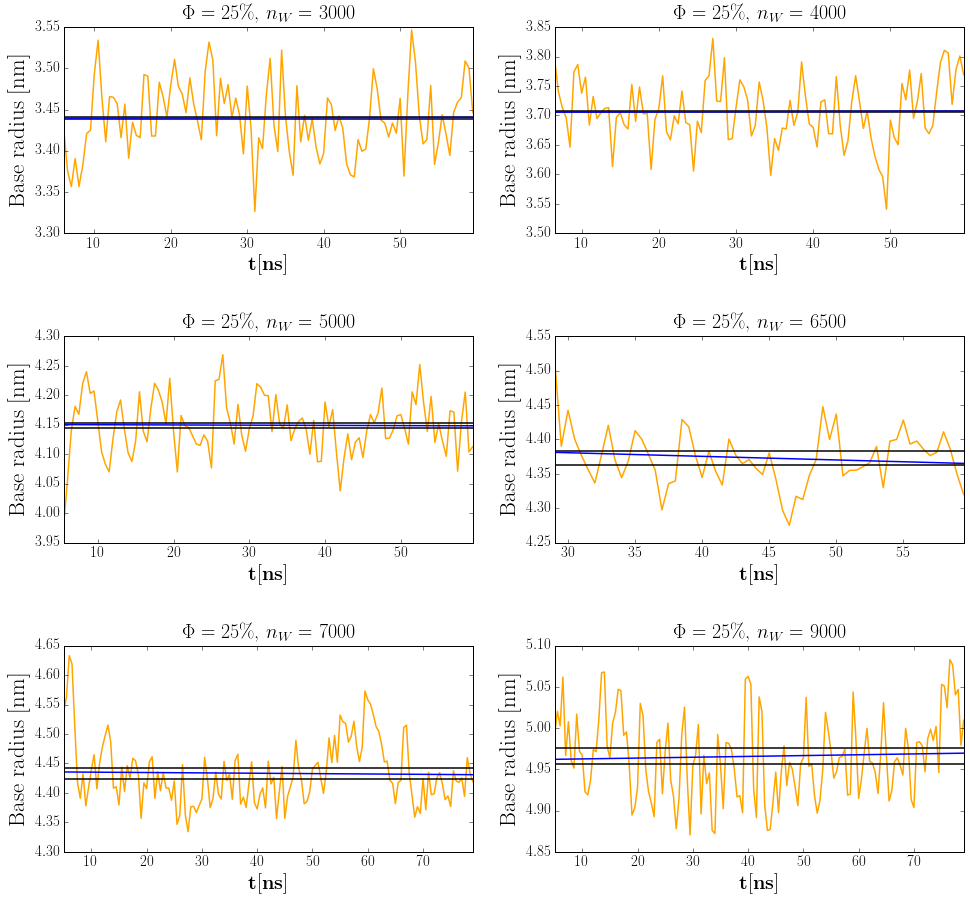

for SAM  25 % and  3000  molecules:
num of good intervals= 28
for SAM  25 % and  4000  molecules:
num of good intervals= 1
for SAM  25 % and  5000  molecules:
num of good intervals= 33
for SAM  25 % and  6500  molecules:
num of good intervals= 10
for SAM  25 % and  7000  molecules:
num of good intervals= 45
for SAM  25 % and  9000  molecules:
num of good intervals= 4


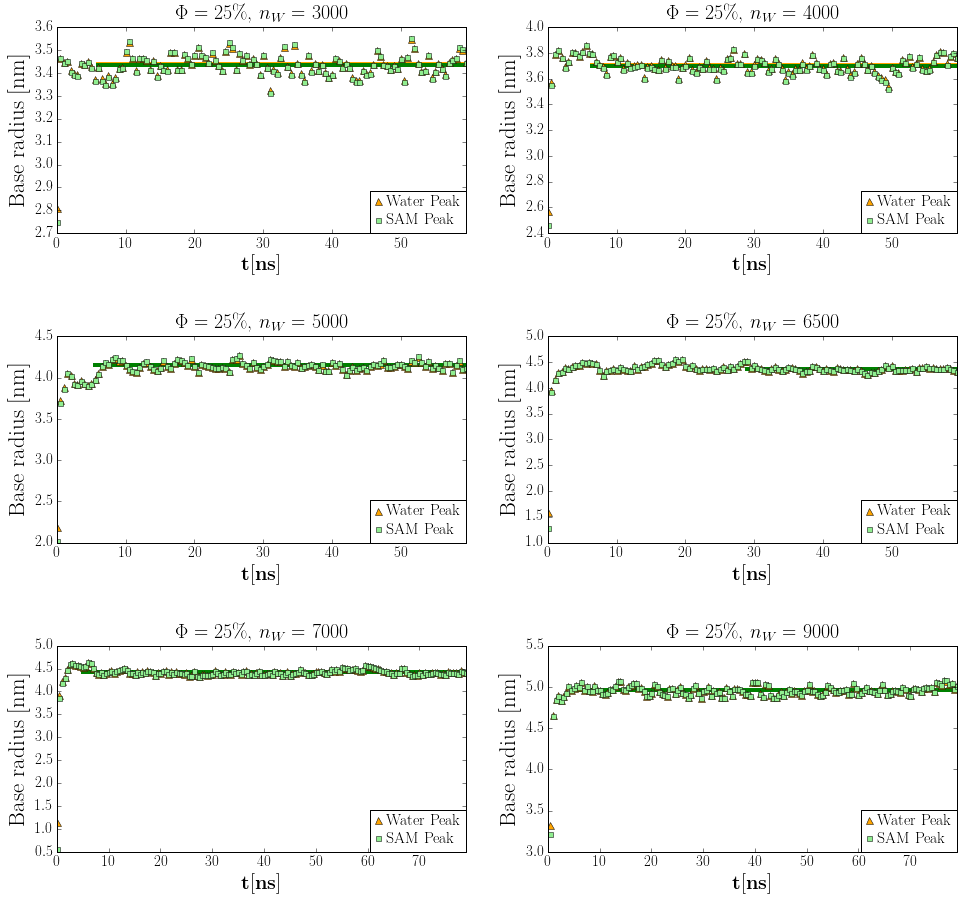

In [20]:
# Set parameters for plots of SAM with pc = 0%
pc=25

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 4
Ncolumns = 2

loopvalues = Waters25

# Plot and analize Base Radii of equilibrated interval for MiddlePoint/GDS and SAM peak

theta_w[pc]=[] # microscopic contact angle of equilibrated system
errortheta_w[pc]=[] # error in the microscopic contact angle of equilibrated system
equil_theta_w[pc]=[] #equilibrated systems
#start_theta_w[pc]=[] #first t (time) of the simulation with finite contact angle -> uncomment if needed
#end_theta_w[pc]=[] # last t (time) of the simulation -> uncomment if needed

theta_w[pc],errortheta_w[pc],equil_theta_w[pc] = equil_results(loopvalues, angles_w, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, anglelabel, anglename)

# Plot and analize Contact Angles of equilibrated interval for MiddlePoint/GDS and SAM peak

# Interface at MiddlePoint/GDS
#errortheta_m[pc]=[]
#theta_m[pc]=[]
#equil_theta_m[pc]=[]
#start_theta_m[pc]=[] -> uncomment if needed
#end_theta_m[pc]=[] -> uncomment if needed

# Interface at SAM peak
errortheta_s[pc]=[]
theta_s[pc]=[]
equil_theta_s[pc]=[]
#start_theta_s[pc]=[] -> uncomment if needed
#end_theta_s[pc]=[] -> uncomment if needed
    
#theta_m[pc],errortheta_m[pc],equil_theta_m[pc], theta_s[pc],errortheta_s[pc],equil_theta_s[pc] =  whole_results(loopvalues, angles_w, angles_s, pc, Nrows, Ncolumns, blocksNum, t, minblocksize)
theta_s[pc],errortheta_s[pc],equil_theta_s[pc] =  whole_results(loopvalues, angles_w, angles_s, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, anglelabel, anglename)

# Plot and analize Base Radii of equilibrated interval for first water peak

error_rbase_w[pc]=[] # error in the microscopic contact angle of equilibrated system
rbase_w[pc]=[] # microscopic contact angle of equilibrated system
equil_rbase_w[pc]=[] #equilibrated systems
#start_rbase_w[b]=[] #first t (time) of the simulation with finite contact angle -> uncomment if needed
#end_rbase_w[b]=[] # last t (time) of the simulation -> uncomment if needed
    
rbase_w[pc],error_rbase_w[pc],equil_rbase_w[pc] = equil_results(loopvalues, radii_w, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, radiuslabel, radiusname)

# Plot and analize Base Radii of equilibrated interval for MiddlePoint/GDS and SAM peak

# Interface at MiddlePoint/GDS
#error_rbase_m[pc]=[]
#rbase_m[pc]=[]
#equil_rbase_m[pc]=[]
#start_rbase_m[pc]=[] -> uncomment if needed
#end_rbase_m[pc]=[] -> uncomment if needed

# Interface at SAM peak
error_rbase_s[pc]=[]
rbase_s[pc]=[]
equil_rbase_s[pc]=[]
#start_rbase_s[pc]=[] -> uncomment if needed
#end_rbase_s[pc]=[] -> uncomment if needed
    
#rbase_m[pc],error_rbase_m[pc],equil_rbase_m[pc], rbase_s[pc],error_rbase_s[pc],equil_rbase_s[pc] =  whole_results(loopvalues, angles_w, angles_s, pc, Nrows, Ncolumns, blocksNum, t, minblocksize)
rbase_s[pc],error_rbase_s[pc],equil_rbase_s[pc] =  whole_results(loopvalues, radii_w, radii_s, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, radiuslabel, radiusname)

for SAM  33 % and  1000  molecules:
num of good intervals= 57
for SAM  33 % and  2000  molecules:
num of good intervals= 25
for SAM  33 % and  3000  molecules:
num of good intervals= 18
for SAM  33 % and  4000  molecules:
num of good intervals= 9
for SAM  33 % and  5000  molecules:
num of good intervals= 54
for SAM  33 % and  8000  molecules:
num of good intervals= 46
for SAM  33 % and  9000  molecules:
num of good intervals= 40
for SAM  33 % and  10000  molecules:
num of good intervals= 33


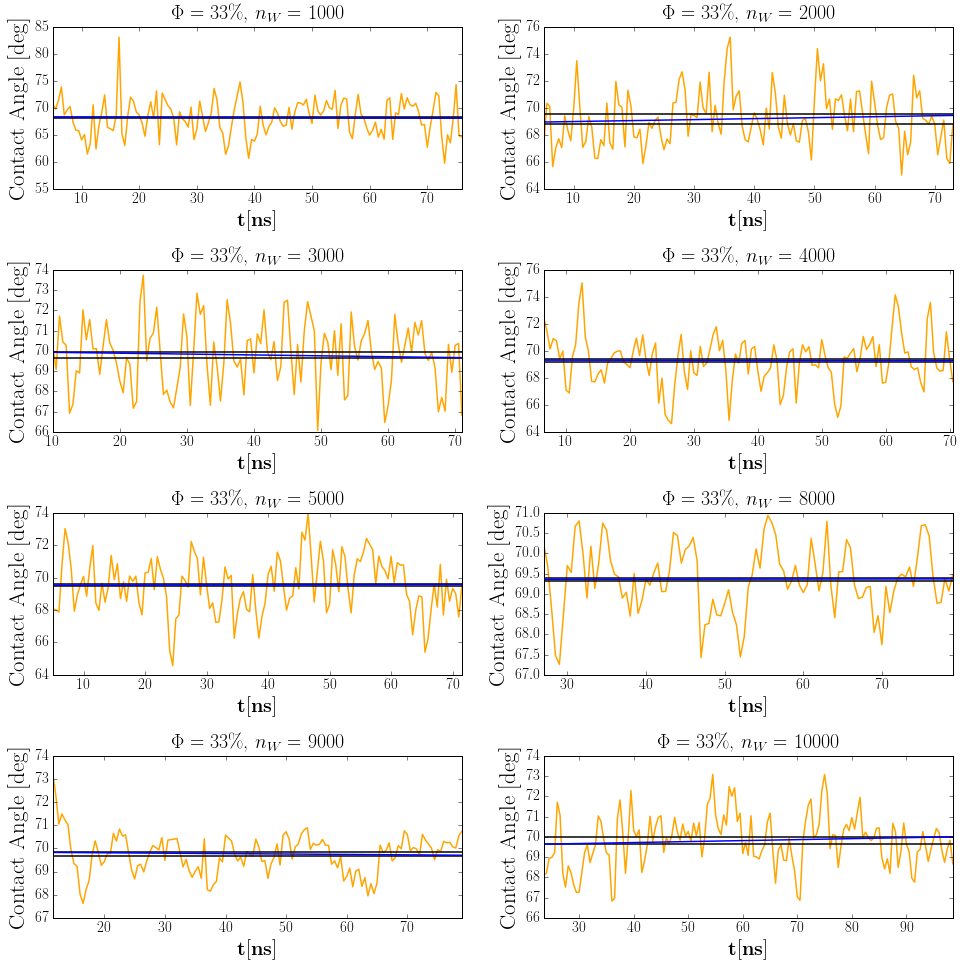

for SAM  33 % and  1000  molecules:
num of good intervals= 57
for SAM  33 % and  2000  molecules:
num of good intervals= 25
for SAM  33 % and  3000  molecules:
num of good intervals= 18
for SAM  33 % and  4000  molecules:
num of good intervals= 9
for SAM  33 % and  5000  molecules:
num of good intervals= 54
for SAM  33 % and  8000  molecules:
num of good intervals= 46
for SAM  33 % and  9000  molecules:
num of good intervals= 40
for SAM  33 % and  10000  molecules:
num of good intervals= 33


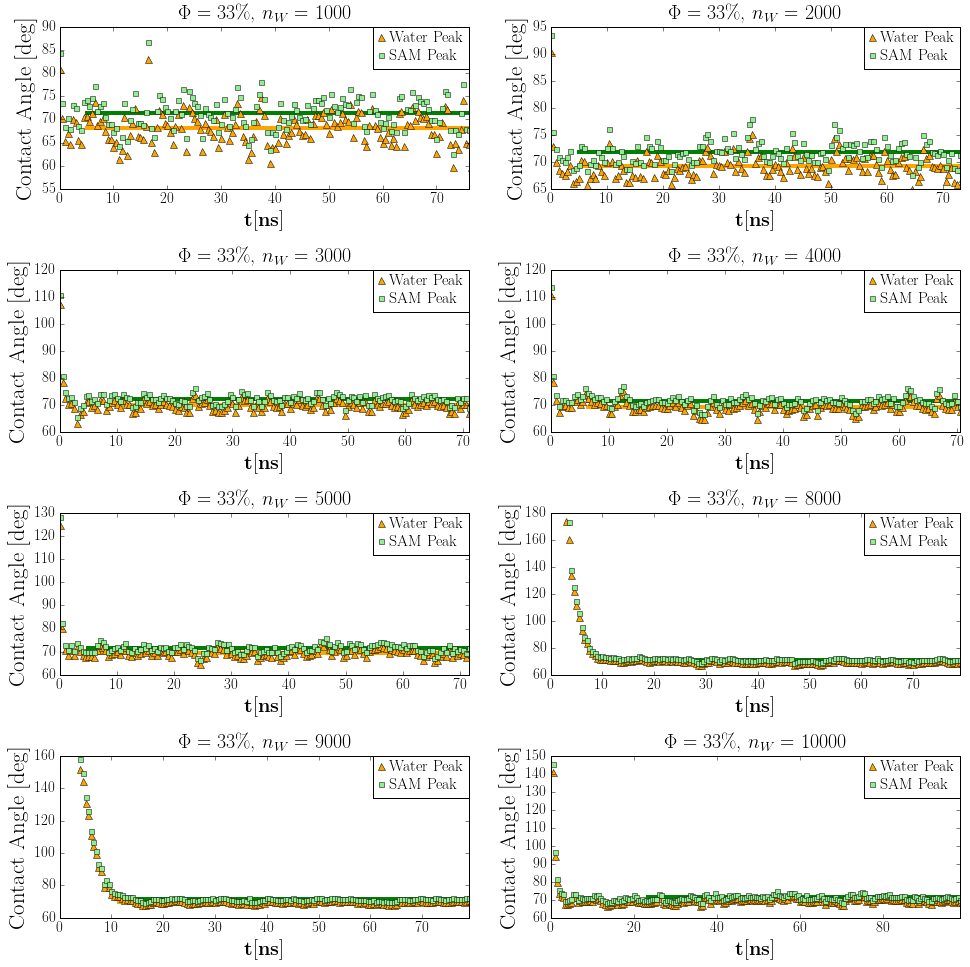

for SAM  33 % and  1000  molecules:
num of good intervals= 59
for SAM  33 % and  2000  molecules:
num of good intervals= 32
for SAM  33 % and  3000  molecules:
num of good intervals= 30
for SAM  33 % and  4000  molecules:
num of good intervals= 9
for SAM  33 % and  5000  molecules:
num of good intervals= 55
for SAM  33 % and  8000  molecules:
num of good intervals= 40
for SAM  33 % and  9000  molecules:
num of good intervals= 34
for SAM  33 % and  10000  molecules:
num of good intervals= 33


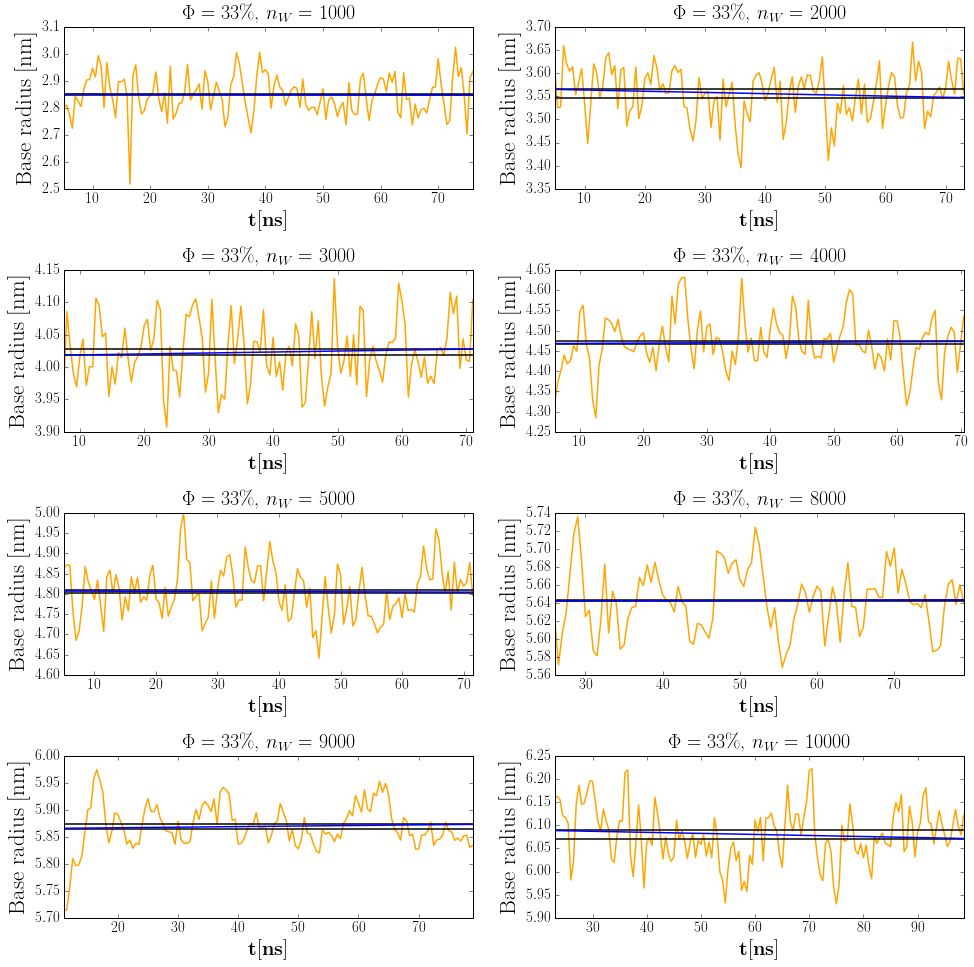

for SAM  33 % and  1000  molecules:
num of good intervals= 59
for SAM  33 % and  2000  molecules:
num of good intervals= 32
for SAM  33 % and  3000  molecules:
num of good intervals= 30
for SAM  33 % and  4000  molecules:
num of good intervals= 9
for SAM  33 % and  5000  molecules:
num of good intervals= 55
for SAM  33 % and  8000  molecules:
num of good intervals= 40
for SAM  33 % and  9000  molecules:
num of good intervals= 34
for SAM  33 % and  10000  molecules:
num of good intervals= 33


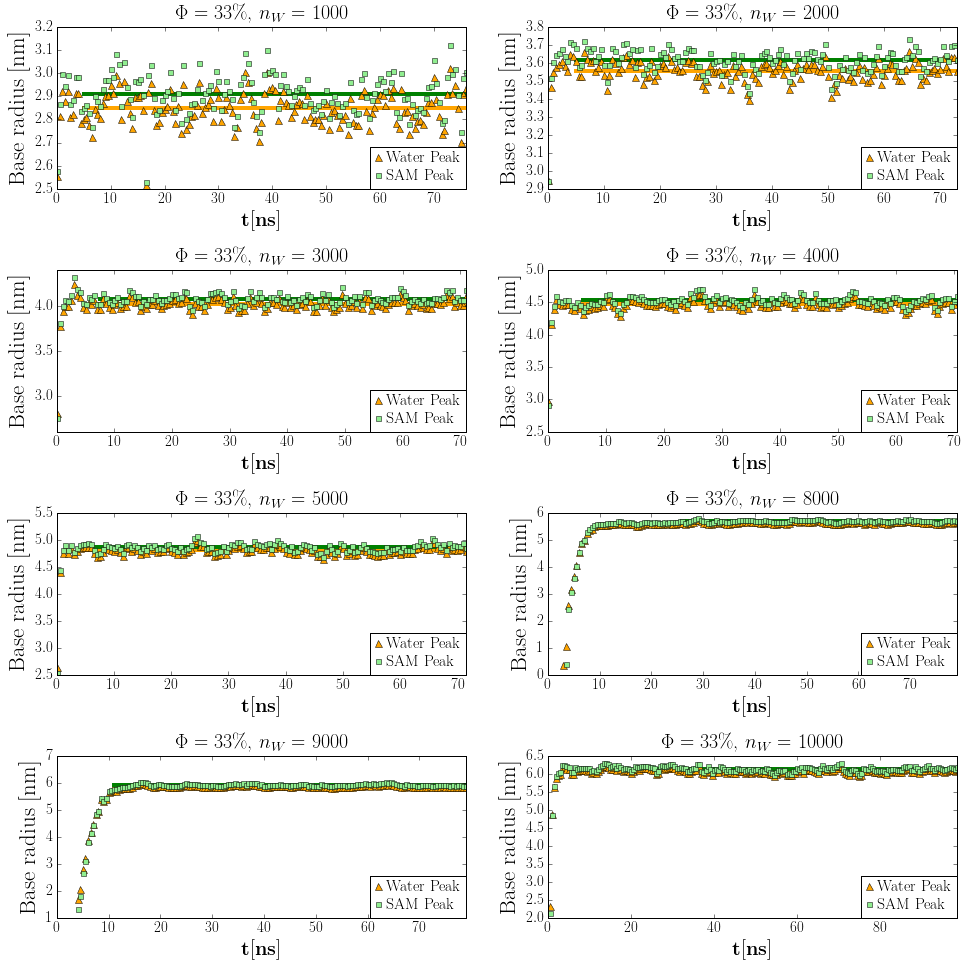

In [21]:
# Set parameters for plots of SAM with pc = 0%
pc=33

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 5
Ncolumns = 2

loopvalues = Waters33

# Plot and analize Base Radii of equilibrated interval for MiddlePoint/GDS and SAM peak

theta_w[pc]=[] # microscopic contact angle of equilibrated system
errortheta_w[pc]=[] # error in the microscopic contact angle of equilibrated system
equil_theta_w[pc]=[] #equilibrated systems
#start_theta_w[pc]=[] #first t (time) of the simulation with finite contact angle -> uncomment if needed
#end_theta_w[pc]=[] # last t (time) of the simulation -> uncomment if needed

theta_w[pc],errortheta_w[pc],equil_theta_w[pc] = equil_results(loopvalues, angles_w, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, anglelabel, anglename)

# Plot and analize Contact Angles of equilibrated interval for MiddlePoint/GDS and SAM peak

# Interface at MiddlePoint/GDS
#errortheta_m[pc]=[]
#theta_m[pc]=[]
#equil_theta_m[pc]=[]
#start_theta_m[pc]=[] -> uncomment if needed
#end_theta_m[pc]=[] -> uncomment if needed

# Interface at SAM peak
errortheta_s[pc]=[]
theta_s[pc]=[]
equil_theta_s[pc]=[]
#start_theta_s[pc]=[] -> uncomment if needed
#end_theta_s[pc]=[] -> uncomment if needed
    
#theta_m[pc],errortheta_m[pc],equil_theta_m[pc], theta_s[pc],errortheta_s[pc],equil_theta_s[pc] =  whole_results(loopvalues, angles_w, angles_s, pc, Nrows, Ncolumns, blocksNum, t, minblocksize)
theta_s[pc],errortheta_s[pc],equil_theta_s[pc] =  whole_results(loopvalues, angles_w, angles_s, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, anglelabel, anglename)

# Plot and analize Base Radii of equilibrated interval for first water peak

error_rbase_w[pc]=[] # error in the microscopic contact angle of equilibrated system
rbase_w[pc]=[] # microscopic contact angle of equilibrated system
equil_rbase_w[pc]=[] #equilibrated systems
#start_rbase_w[b]=[] #first t (time) of the simulation with finite contact angle -> uncomment if needed
#end_rbase_w[b]=[] # last t (time) of the simulation -> uncomment if needed
    
rbase_w[pc],error_rbase_w[pc],equil_rbase_w[pc] = equil_results(loopvalues, radii_w, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, radiuslabel, radiusname)

# Plot and analize Base Radii of equilibrated interval for MiddlePoint/GDS and SAM peak

# Interface at MiddlePoint/GDS
#error_rbase_m[pc]=[]
#rbase_m[pc]=[]
#equil_rbase_m[pc]=[]
#start_rbase_m[pc]=[] -> uncomment if needed
#end_rbase_m[pc]=[] -> uncomment if needed

# Interface at SAM peak
error_rbase_s[pc]=[]
rbase_s[pc]=[]
equil_rbase_s[pc]=[]
#start_rbase_s[pc]=[] -> uncomment if needed
#end_rbase_s[pc]=[] -> uncomment if needed
    
#rbase_m[pc],error_rbase_m[pc],equil_rbase_m[pc], rbase_s[pc],error_rbase_s[pc],equil_rbase_s[pc] =  whole_results(loopvalues, angles_w, angles_s, pc, Nrows, Ncolumns, blocksNum, t, minblocksize)
rbase_s[pc],error_rbase_s[pc],equil_rbase_s[pc] =  whole_results(loopvalues, radii_w, radii_s, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, radiuslabel, radiusname)

for SAM  41 % and  3000  molecules:
 Not equilibrated!
for SAM  41 % and  4000  molecules:
num of good intervals= 40
for SAM  41 % and  5000  molecules:
num of good intervals= 16
for SAM  41 % and  6500  molecules:
num of good intervals= 33
for SAM  41 % and  9000  molecules:
num of good intervals= 46


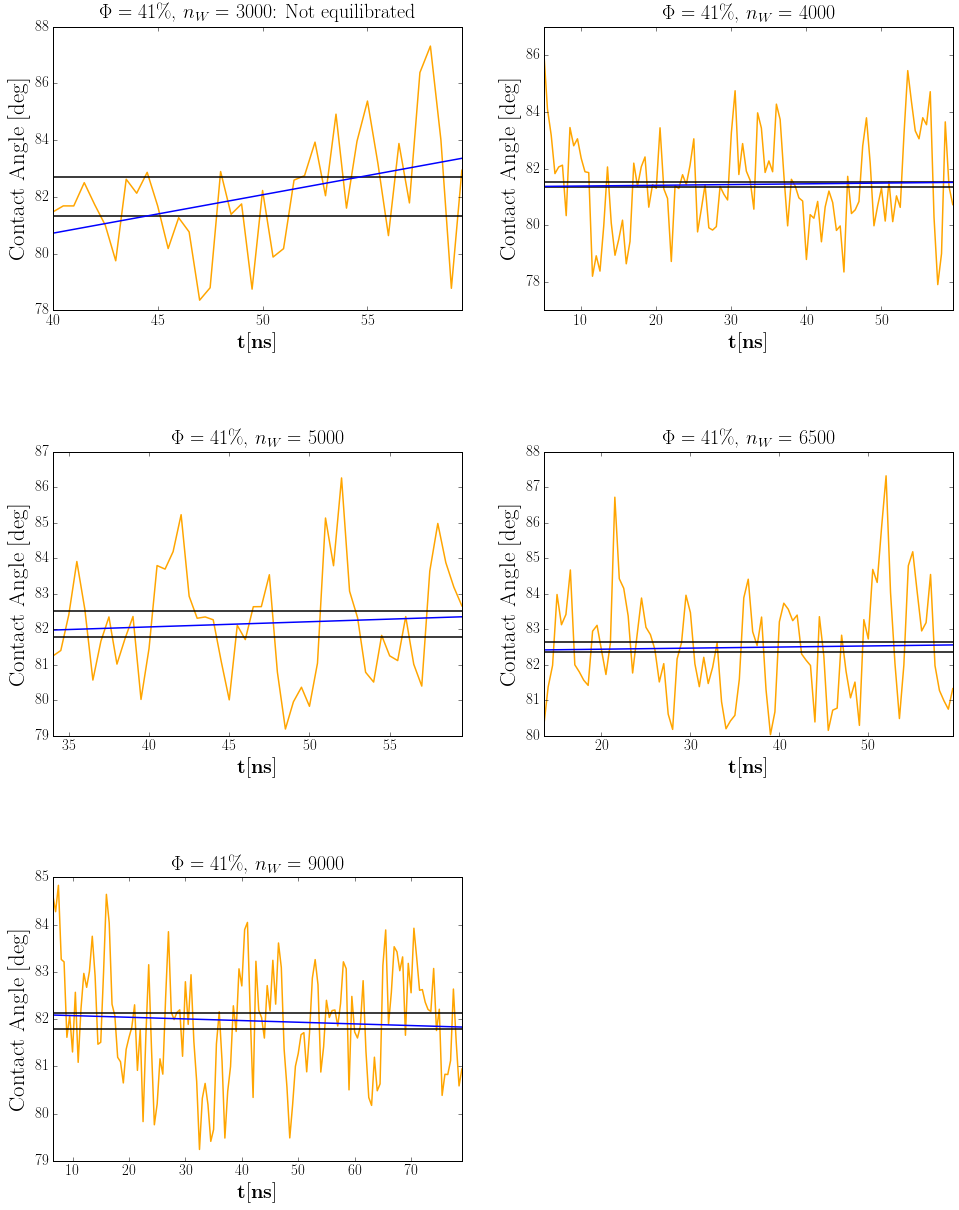

for SAM  41 % and  3000  molecules:
 Not equilibrated!
for SAM  41 % and  4000  molecules:
num of good intervals= 40
for SAM  41 % and  5000  molecules:
num of good intervals= 16
for SAM  41 % and  6500  molecules:
num of good intervals= 33
for SAM  41 % and  9000  molecules:
num of good intervals= 46


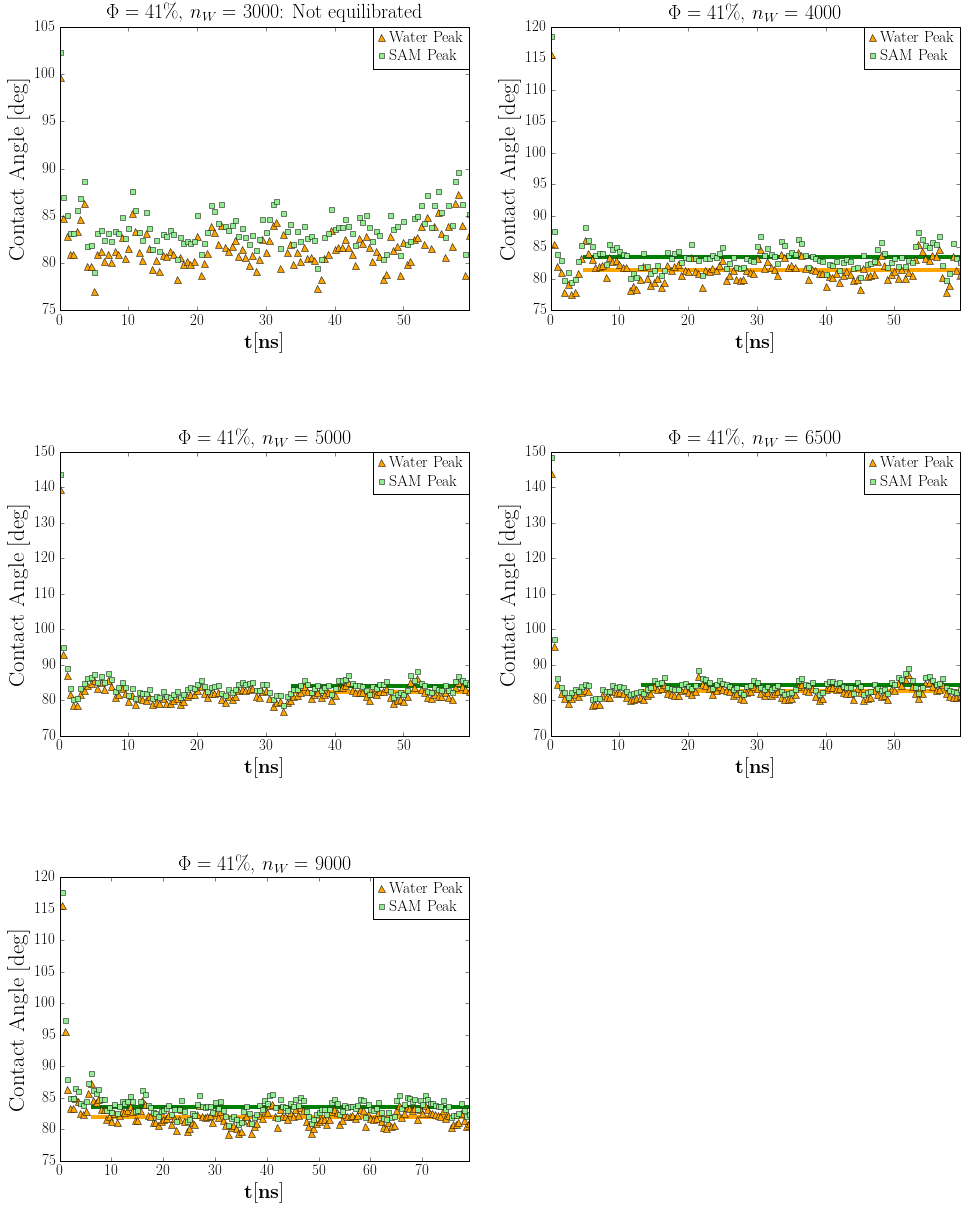

for SAM  41 % and  3000  molecules:
 Not equilibrated!
for SAM  41 % and  4000  molecules:
num of good intervals= 30
for SAM  41 % and  5000  molecules:
num of good intervals= 13
for SAM  41 % and  6500  molecules:
num of good intervals= 26
for SAM  41 % and  9000  molecules:
num of good intervals= 36


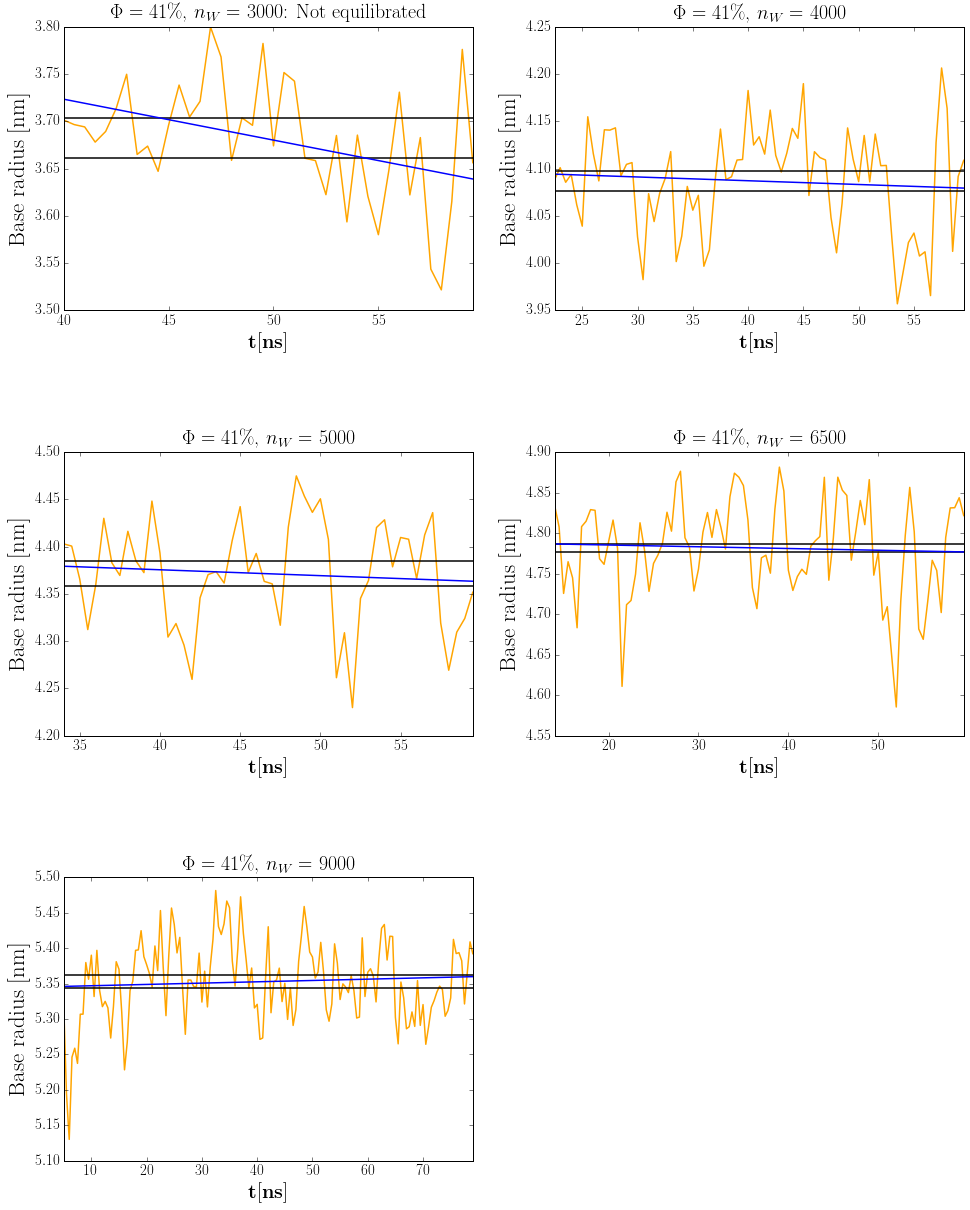

for SAM  41 % and  3000  molecules:
 Not equilibrated!
for SAM  41 % and  4000  molecules:
num of good intervals= 30
for SAM  41 % and  5000  molecules:
num of good intervals= 13
for SAM  41 % and  6500  molecules:
num of good intervals= 26
for SAM  41 % and  9000  molecules:
num of good intervals= 36


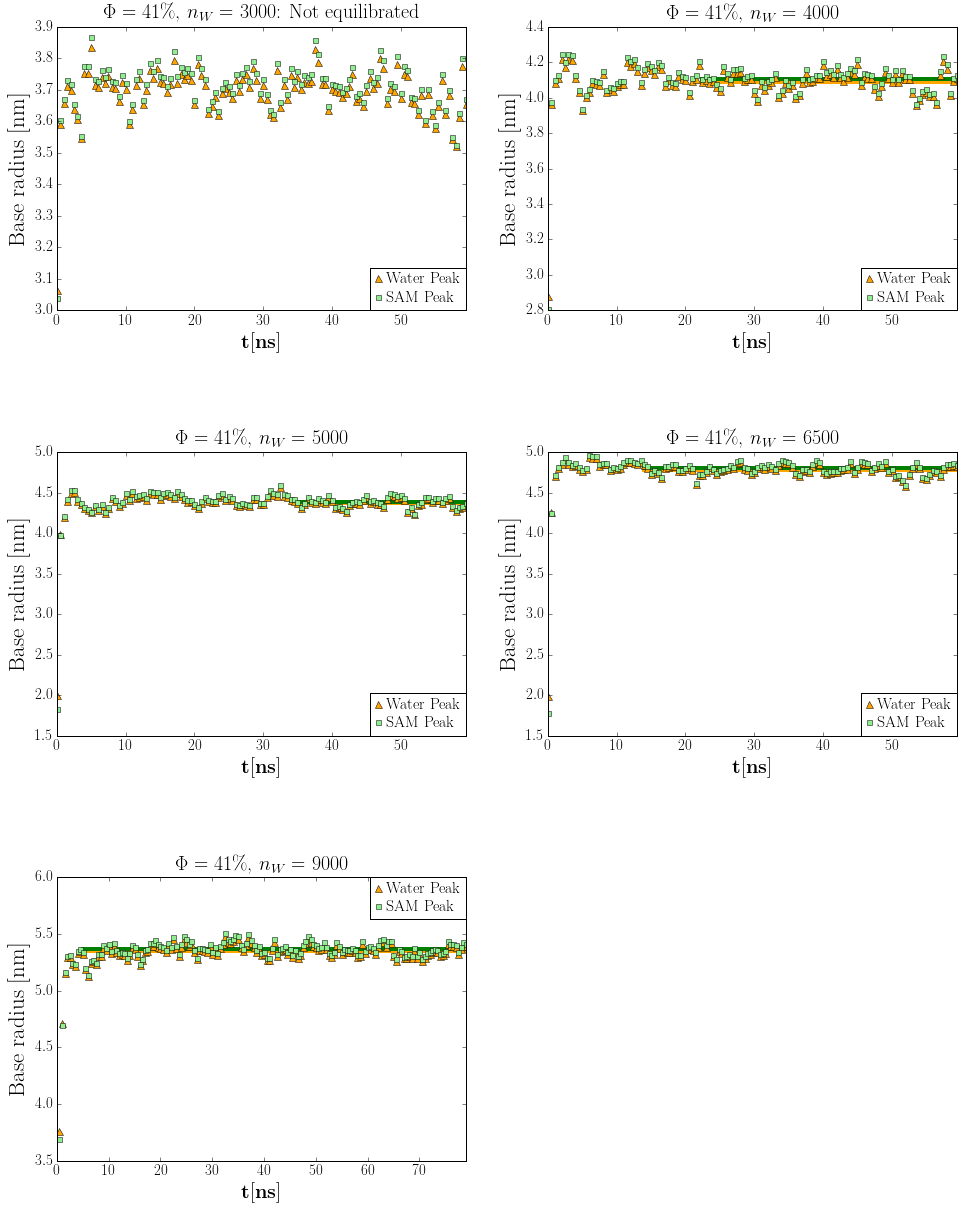

In [22]:
# Set parameters for plots of SAM with pc = 0%
pc=41

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 3
Ncolumns = 2

loopvalues = Waters41

# Plot and analize Base Radii of equilibrated interval for MiddlePoint/GDS and SAM peak

theta_w[pc]=[] # microscopic contact angle of equilibrated system
errortheta_w[pc]=[] # error in the microscopic contact angle of equilibrated system
equil_theta_w[pc]=[] #equilibrated systems
#start_theta_w[pc]=[] #first t (time) of the simulation with finite contact angle -> uncomment if needed
#end_theta_w[pc]=[] # last t (time) of the simulation -> uncomment if needed

theta_w[pc],errortheta_w[pc],equil_theta_w[pc] = equil_results(loopvalues, angles_w, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, anglelabel, anglename)

# Plot and analize Contact Angles of equilibrated interval for MiddlePoint/GDS and SAM peak

# Interface at MiddlePoint/GDS
#errortheta_m[pc]=[]
#theta_m[pc]=[]
#equil_theta_m[pc]=[]
#start_theta_m[pc]=[] -> uncomment if needed
#end_theta_m[pc]=[] -> uncomment if needed

# Interface at SAM peak
errortheta_s[pc]=[]
theta_s[pc]=[]
equil_theta_s[pc]=[]
#start_theta_s[pc]=[] -> uncomment if needed
#end_theta_s[pc]=[] -> uncomment if needed
    
#theta_m[pc],errortheta_m[pc],equil_theta_m[pc], theta_s[pc],errortheta_s[pc],equil_theta_s[pc] =  whole_results(loopvalues, angles_w, angles_s, pc, Nrows, Ncolumns, blocksNum, t, minblocksize)
theta_s[pc],errortheta_s[pc],equil_theta_s[pc] =  whole_results(loopvalues, angles_w, angles_s, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, anglelabel, anglename)

# Plot and analize Base Radii of equilibrated interval for first water peak

error_rbase_w[pc]=[] # error in the microscopic contact angle of equilibrated system
rbase_w[pc]=[] # microscopic contact angle of equilibrated system
equil_rbase_w[pc]=[] #equilibrated systems
#start_rbase_w[b]=[] #first t (time) of the simulation with finite contact angle -> uncomment if needed
#end_rbase_w[b]=[] # last t (time) of the simulation -> uncomment if needed
    
rbase_w[pc],error_rbase_w[pc],equil_rbase_w[pc] = equil_results(loopvalues, radii_w, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, radiuslabel, radiusname)

# Plot and analize Base Radii of equilibrated interval for MiddlePoint/GDS and SAM peak

# Interface at MiddlePoint/GDS
#error_rbase_m[pc]=[]
#rbase_m[pc]=[]
#equil_rbase_m[pc]=[]
#start_rbase_m[pc]=[] -> uncomment if needed
#end_rbase_m[pc]=[] -> uncomment if needed

# Interface at SAM peak
error_rbase_s[pc]=[]
rbase_s[pc]=[]
equil_rbase_s[pc]=[]
#start_rbase_s[pc]=[] -> uncomment if needed
#end_rbase_s[pc]=[] -> uncomment if needed
    
#rbase_m[pc],error_rbase_m[pc],equil_rbase_m[pc], rbase_s[pc],error_rbase_s[pc],equil_rbase_s[pc] =  whole_results(loopvalues, angles_w, angles_s, pc, Nrows, Ncolumns, blocksNum, t, minblocksize)
rbase_s[pc],error_rbase_s[pc],equil_rbase_s[pc] =  whole_results(loopvalues, radii_w, radii_s, pc, Nrows, Ncolumns, blocksNum, beg, t, minblocksize, radiuslabel, radiusname)

In [23]:
# Check number of equilibrated systems 
for i in SAMs:
    x = rbase_w[i]
    y = theta_w[i]
    print "WaterPeak: SAM",i,"%, len(rbase_w)=",len(x),"len(theta_w)=",len(y)
    #x = rbase_m[i]
    #y = theta_m[i]
    #print "MiddlePeak: SAM",i,"%, len(rbase_m)=",len(x),"len(theta_m)=",len(y)
    x = rbase_s[i]
    y = theta_s[i]
    print "SAMPeak: SAM",i,"%, len(rbase_s)=",len(x),"len(theta_s)=",len(y),"\n"
    #if x.all() != 0:
        #x = 1/x
        #y = cos(radians(theta[i]))  

print equil_theta_w[33], equil_rbase_w[33]

WaterPeak: SAM 0 %, len(rbase_w)= 7 len(theta_w)= 7
SAMPeak: SAM 0 %, len(rbase_s)= 7 len(theta_s)= 7 

WaterPeak: SAM 5 %, len(rbase_w)= 8 len(theta_w)= 8
SAMPeak: SAM 5 %, len(rbase_s)= 8 len(theta_s)= 8 

WaterPeak: SAM 11 %, len(rbase_w)= 9 len(theta_w)= 9
SAMPeak: SAM 11 %, len(rbase_s)= 9 len(theta_s)= 9 

WaterPeak: SAM 17 %, len(rbase_w)= 9 len(theta_w)= 9
SAMPeak: SAM 17 %, len(rbase_s)= 9 len(theta_s)= 9 

WaterPeak: SAM 21 %, len(rbase_w)= 6 len(theta_w)= 6
SAMPeak: SAM 21 %, len(rbase_s)= 6 len(theta_s)= 6 

WaterPeak: SAM 25 %, len(rbase_w)= 6 len(theta_w)= 6
SAMPeak: SAM 25 %, len(rbase_s)= 6 len(theta_s)= 6 

WaterPeak: SAM 33 %, len(rbase_w)= 8 len(theta_w)= 8
SAMPeak: SAM 33 %, len(rbase_s)= 8 len(theta_s)= 8 

WaterPeak: SAM 41 %, len(rbase_w)= 4 len(theta_w)= 4
SAMPeak: SAM 41 %, len(rbase_s)= 4 len(theta_s)= 4 

[1000, 2000, 3000, 4000, 5000, 8000, 9000, 10000] [1000, 2000, 3000, 4000, 5000, 8000, 9000, 10000]


In [24]:
# Equilibrated systems 
for i in SAMs:
    print i, equil_theta_w[i]
print " "
for i in SAMs:
    print i, equil_theta_s[i]

0 [1000, 2000, 3000, 4000, 5000, 7000, 8000]
5 [2000, 3000, 4000, 5000, 6500, 7000, 8000, 9000]
11 [1000, 2000, 4000, 5000, 6500, 7000, 8000, 9000, 10000]
17 [2000, 3000, 4000, 5000, 6500, 7000, 8000, 9000, 10000]
21 [2000, 3000, 4000, 5000, 6500, 9000]
25 [3000, 4000, 5000, 6500, 7000, 9000]
33 [1000, 2000, 3000, 4000, 5000, 8000, 9000, 10000]
41 [4000, 5000, 6500, 9000]
 
0 [1000, 2000, 3000, 4000, 5000, 7000, 8000]
5 [2000, 3000, 4000, 5000, 6500, 7000, 8000, 9000]
11 [1000, 2000, 4000, 5000, 6500, 7000, 8000, 9000, 10000]
17 [2000, 3000, 4000, 5000, 6500, 7000, 8000, 9000, 10000]
21 [2000, 3000, 4000, 5000, 6500, 9000]
25 [3000, 4000, 5000, 6500, 7000, 9000]
33 [1000, 2000, 3000, 4000, 5000, 8000, 9000, 10000]
41 [4000, 5000, 6500, 9000]


In [41]:
#CORRECTION
SAMs = [0, 5, 11, 17, 21, 25, 33]

In [25]:
#CORRECTION SAM 21%:

theta_w[21] = theta_w[21] + theta_w[25]
errortheta_w[21] = errortheta_w[21] + errortheta_w[25]
equil_theta_w[21] = equil_theta_w[21] + equil_theta_w[25]
rbase_w[21] = rbase_w[21] + rbase_w[25]
error_rbase_w[21] = error_rbase_w[21] + error_rbase_w[25] 
equil_rbase_w[21] = equil_rbase_w[21] + equil_rbase_w[25]



theta_s[21] = theta_s[21] + theta_s[25]
errortheta_s[21] = errortheta_s[21] + errortheta_s[25]
equil_theta_s[21] = equil_theta_s[21] + equil_theta_s[25]
rbase_s[21] = rbase_s[21] + rbase_s[25]
error_rbase_s[21] = error_rbase_s[21] + error_rbase_s[25] 
equil_rbase_s[21] = equil_rbase_s[21] + equil_rbase_s[25]

In [26]:
#CORRECTION SAM 25%:

theta_w[25] = theta_w[41]
errortheta_w[25] = errortheta_w[41]
equil_theta_w[25] = equil_theta_w[41]
rbase_w[25] = rbase_w[41]
error_rbase_w[25] = error_rbase_w[41] 
equil_rbase_w[25] = equil_rbase_w[41]


theta_s[25] = theta_s[41]
errortheta_s[25] = errortheta_s[41]
equil_theta_s[25] = equil_theta_s[41]
rbase_s[25] = rbase_s[41]
error_rbase_s[25] = error_rbase_s[41] 
equil_rbase_s[25] = equil_rbase_s[41]

In [27]:
"""
#CORRECTION (sorting results):

theta_w[21] = sorted(theta_w[21])
errortheta_w[21] = sorted(errortheta_w[21])
equil_theta_w[21] = sorted(equil_theta_w[21])
rbase_w[21] = sorted(rbase_w[21])
error_rbase_w[21] = sorted(error_rbase_w[21])
equil_rbase_w[21] = sorted(equil_rbase_w[21])



theta_s[21] = sorted(theta_s[21])
errortheta_s[21] = sorted(errortheta_s[21])
equil_theta_s[21] = sorted(equil_theta_s[21])
rbase_s[21] = sorted(rbase_s[21])
error_rbase_s[21] = sorted(error_rbase_s[21])
equil_rbase_s[21] = sorted(equil_rbase_s[21])



theta_s[25] = sorted(theta_s[25])
errortheta_s[25] = sorted(errortheta_s[25])
equil_theta_s[25] = sorted(equil_theta_s[25])
rbase_s[25] = sorted(rbase_s[25])
error_rbase_s[25] = sorted(error_rbase_s[25])
equil_rbase_s[25] = sorted(equil_rbase_s[25])



theta_w[25] = sorted(theta_w[25])
errortheta_w[25] = sorted(errortheta_w[25])
equil_theta_w[25] = sorted(equil_theta_w[25])
rbase_w[25] = sorted(rbase_w[25])
error_rbase_w[25] = sorted(error_rbase_w[25])
equil_rbase_w[25] = sorted(equil_rbase_w[25])
"""

'\n#CORRECTION (sorting results):\n\ntheta_w[21] = sorted(theta_w[21])\nerrortheta_w[21] = sorted(errortheta_w[21])\nequil_theta_w[21] = sorted(equil_theta_w[21])\nrbase_w[21] = sorted(rbase_w[21])\nerror_rbase_w[21] = sorted(error_rbase_w[21])\nequil_rbase_w[21] = sorted(equil_rbase_w[21])\n\n\n\ntheta_s[21] = sorted(theta_s[21])\nerrortheta_s[21] = sorted(errortheta_s[21])\nequil_theta_s[21] = sorted(equil_theta_s[21])\nrbase_s[21] = sorted(rbase_s[21])\nerror_rbase_s[21] = sorted(error_rbase_s[21])\nequil_rbase_s[21] = sorted(equil_rbase_s[21])\n\n\n\ntheta_s[25] = sorted(theta_s[25])\nerrortheta_s[25] = sorted(errortheta_s[25])\nequil_theta_s[25] = sorted(equil_theta_s[25])\nrbase_s[25] = sorted(rbase_s[25])\nerror_rbase_s[25] = sorted(error_rbase_s[25])\nequil_rbase_s[25] = sorted(equil_rbase_s[25])\n\n\n\ntheta_w[25] = sorted(theta_w[25])\nerrortheta_w[25] = sorted(errortheta_w[25])\nequil_theta_w[25] = sorted(equil_theta_w[25])\nrbase_w[25] = sorted(rbase_w[25])\nerror_rbase_w[2

num of equilibrated systems =  7
num of equilibrated systems =  8
num of equilibrated systems =  9
num of equilibrated systems =  9
num of equilibrated systems =  12
num of equilibrated systems =  4
num of equilibrated systems =  8


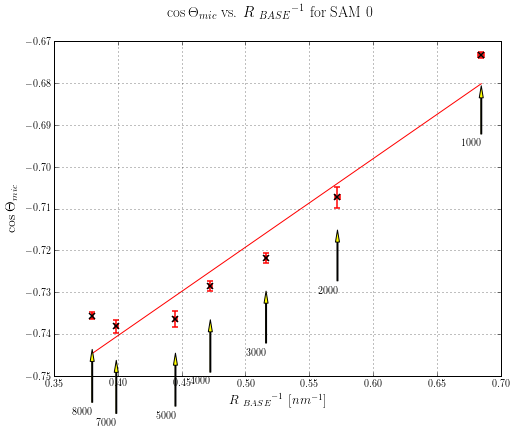

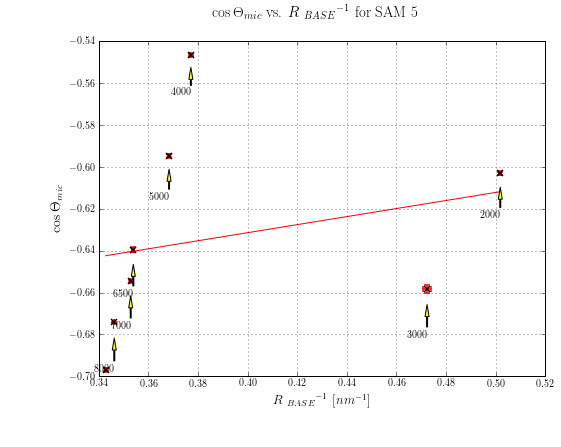

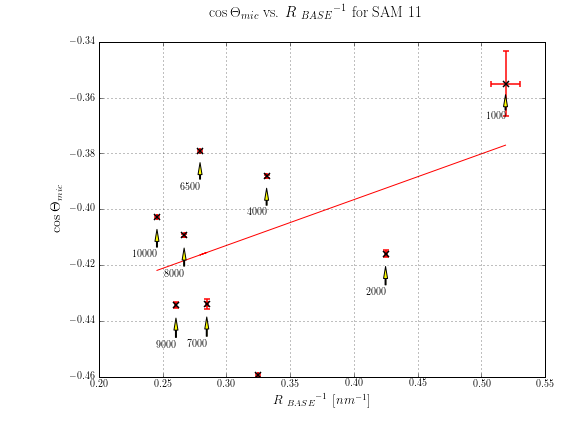

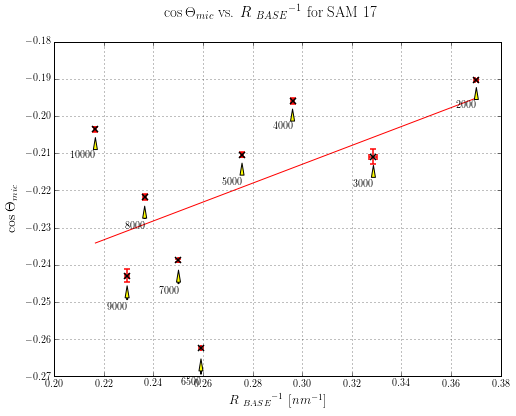

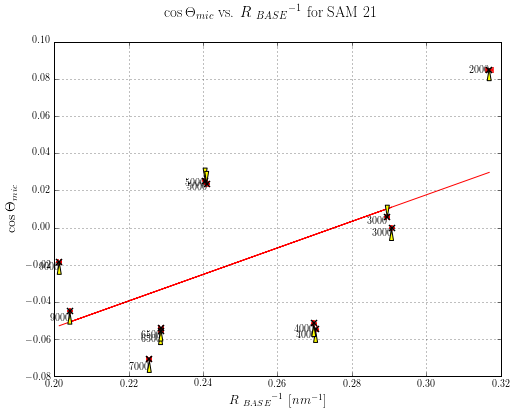

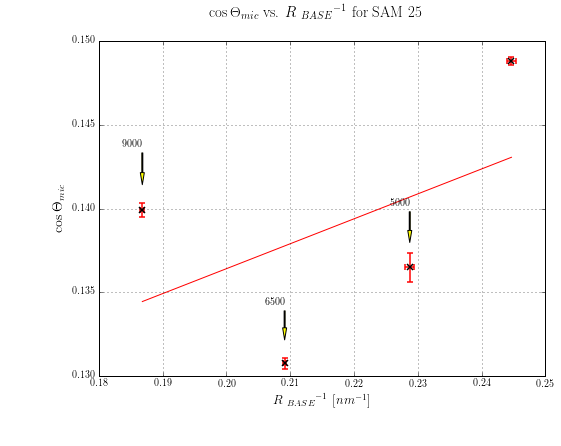

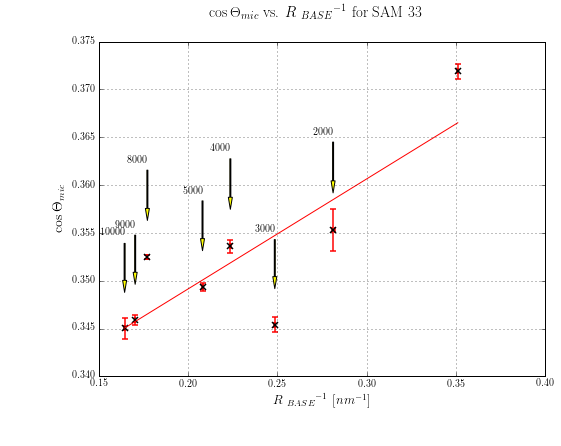

In [53]:
# Plot theta vs 1/Rbase with label for each system
for i in SAMs:
	x = []
	y = []
	x_error = []
	y_error = []
	mn=min(len(rbase_w[i]),len(theta_w[i]))
	print 'num of equilibrated systems = ', mn
	for j in range(mn):
		x.append(1/rbase_w[i][j])
		x_error.append((rbase_w[i][j]**(-2))*error_rbase_w[i][j])
		y.append(cos(radians(theta_w[i][j])))
		y_error.append(cos(radians(theta_w[i][j]))*radians(errortheta_w[i][j]))
	
	slope, intercept, delete1, delete2, delete3 = stats.linregress(x,y)

	yline=np.zeros(len(x))
	m=0
	for l in x:
		yline[m] = func(l, slope, intercept)
		m = m+1


	# PLOT INSTEAD OF SUBPLOT
	plt.figure()
	plt.errorbar(x, y, xerr=x_error, yerr=y_error,fmt='x', ecolor='red',elinewidth=1.5, color='black',markeredgewidth=1.5)
	plt.plot(x, yline, color='r')

	plt.xlabel('${R \ _{BASE}}^{-1}\ [ nm ^{-1} ]$',fontsize=13)
	plt.ylabel(r' $\cos\Theta_{mic}$ ',fontsize=14)
	mytitle = plt.suptitle(r'$\cos\Theta_{mic}$ vs. ${R \ _{BASE}}^{-1}$ for SAM '+str(i)+'%', fontsize=15,fontweight='bold')

	# Labels next to each point
	for j in range(mn):
		xarrow = x[j]
		yarrow =y[j] + ((y[j])*0.01)
		xtext = x[j]
		ytext = y[j] + ((y[j])*0.03)
		plt.annotate(str(equil_rbase_w[i][j]), xy=(xarrow,yarrow), xytext=(xtext,ytext),arrowprops=dict(facecolor='yellow', shrink=0.05,
																									  width=1, headwidth=4),
					horizontalalignment='right', verticalalignment='top',)
		#ax.annotate(str(equil_rbase[i][j]), xytext=(xtext,ytext), xy=(xarrow,yarrow),horizontalalignment='right', verticalalignment='top',)
	
	plt.grid(True)
	#plt.axis([0.3, 0.9, -1.0, 0.0])
	#plt.show()
	plt.savefig('s'+str(i)+'_cos_r.jpg',bbox_extra_artists=(mytitle,), bbox_inches='tight')

SAM 0
7 [1000, 2000, 3000, 4000, 5000, 7000, 8000]
SAM 5
8 [2000, 3000, 4000, 5000, 6500, 7000, 8000, 9000]
SAM 11
9 [1000, 2000, 4000, 5000, 6500, 7000, 8000, 9000, 10000]
SAM 17
9 [2000, 3000, 4000, 5000, 6500, 7000, 8000, 9000, 10000]
SAM 21
12 [2000, 3000, 4000, 5000, 6500, 9000, 3000, 4000, 5000, 6500, 7000, 9000]
SAM 25
4 [4000, 5000, 6500, 9000]
SAM 33
8 [1000, 2000, 3000, 4000, 5000, 8000, 9000, 10000]


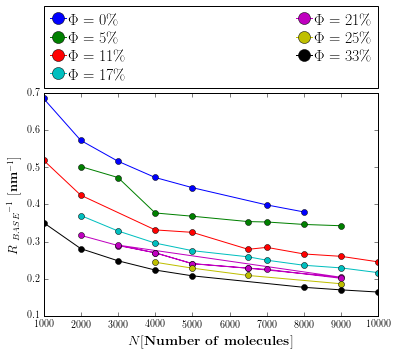

In [29]:
# Plot 1/Rbase vs N (num molecs)
for i in [0,5,11,17,21,25,33]: #CORRECTED
    
    x = []
    mn=len(rbase_w[i])
    for j in range(mn):
        x.append(1/rbase_w[i][j])
    
    print "SAM",i
    print len(equil_rbase_w[i]),equil_rbase_w[i]
    
    text = r'$\Phi=\ $'+str(i)
    plt.plot(equil_rbase_w[i],x,'o-',label = text + '\%')

    #x2 = np.linspace(equil_rbase_w[i][0], equil_rbase_w[i][mn-1],500)    
    #myfunction2_w = interp1d(sorted(equil_rbase_w[i]),x, kind='cubic') 
    #plt.plot(x2,myfunction2_w(x2))
    
    
art = []    
mylegend=plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, mode="expand", borderaxespad=0.,fontsize=16)
art.append(mylegend)
plt.ylabel('${R \ _{BASE}}^{-1}\ [ \mathbf{nm} ^{-1} ]$',fontsize=13)
plt.xlabel('$N [ \mathbf{Number \ of \ molecules}]$',fontsize=14)
 
plt.savefig('radius-1_N_dependence.png',additional_artists=art, bbox_inches='tight', transparent=False)

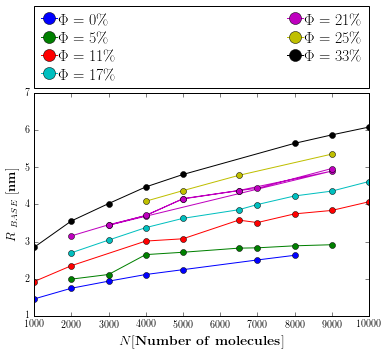

In [30]:
# Plot Rbase vs N (num molecs)
for i in [0,5,11,17,21,25,33]: #CORRECTED
    
    text = r'$\Phi=\ $'+str(i)
    plt.plot(equil_rbase_w[i],rbase_w[i],'o-',label = text + '\%')

    #x2 = np.linspace(equil_rbase_w[i][0], equil_rbase_w[i][mn-1],500)    
    #myfunction2_w = interp1d(sorted(equil_rbase_w[i]),x, kind='cubic') 
    #plt.plot(x2,myfunction2_w(x2))
    
art = []    
mylegend=plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, mode="expand", borderaxespad=0.,fontsize=16)
art.append(mylegend)
plt.ylabel('${R \ _{BASE}}\ [ \mathbf{nm} ]$',fontsize=13)
plt.xlabel('$N [ \mathbf{Number \ of \ molecules}]$',fontsize=14)
 
plt.savefig('radius_N_dependence.png',bbox_inches='tight',additional_artists=art, transparent=False)

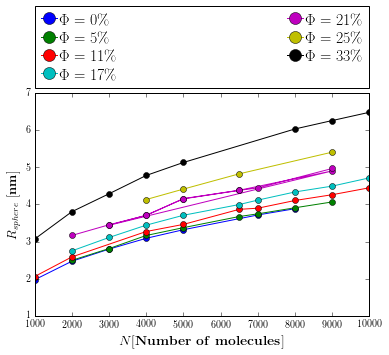

In [31]:
# Plot Rsphere vs N (num molecs)
for i in [0,5,11,17,21,25,33]: #CORRECTED
    sphereR = []
    for j in range(len(theta_w[i])):
        sphereR.append(rbase_w[i][j]/np.cos(radians(theta_w[i][j]-90)))
    
    text = r'$\Phi=\ $'+str(i)
    plt.plot(equil_theta_w[i],sphereR,'o-',label = text + '\%')

    #x2 = np.linspace(equil_rbase_w[i][0], equil_rbase_w[i][mn-1],500)    
    #myfunction2_w = interp1d(sorted(equil_rbase_w[i]),x, kind='cubic') 
    #plt.plot(x2,myfunction2_w(x2))
    
art = []    
mylegend=plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, mode="expand", borderaxespad=0.,fontsize=16)
art.append(mylegend)
plt.ylabel('${R_{sphere}}\ [ \mathbf{nm} ]$',fontsize=13)
plt.xlabel('$N [ \mathbf{Number \ of \ molecules}]$',fontsize=14)
 
plt.savefig('sphereRadius_N_dependence.png',bbox_inches='tight',additional_artists=art, transparent=False)

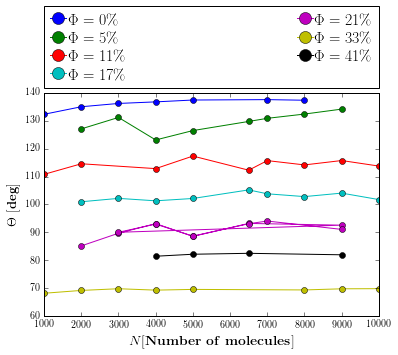

In [32]:
# Plot microscopic theta vs N (num molecs)
for i in [0,5,11,17,21,33,41]:
    
    text = r'$\Phi=\ $'+str(i)
    plt.plot(equil_theta_w[i],theta_w[i],'o-',label = text + '\%')
       
art = []    
mylegend=plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, mode="expand", borderaxespad=0.,fontsize=16)
art.append(mylegend)
plt.ylabel('$ \Theta \ [ \mathbf{deg} ]$',fontsize=13)
plt.xlabel('$N [ \mathbf{Number \ of \ molecules}]$',fontsize=14)
 
plt.savefig('theta_N_dependence.png',additional_artists=art, bbox_inches='tight', transparent=False)

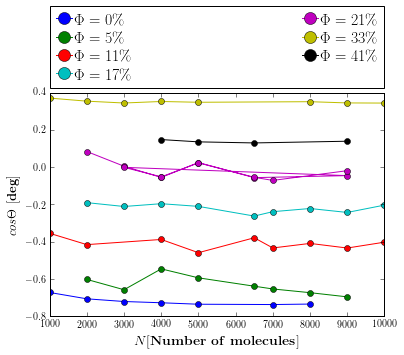

In [33]:
# Plot cos(microscopic theta) vs N (num molecs)
for i in [0,5,11,17,21,33,41]:
    
    text = r'$\Phi=\ $'+str(i)
    plt.plot(equil_theta_w[i],np.cos(radians(theta_w[i])),'o-',label = text + '\%')
       
art = []    
mylegend=plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, mode="expand", borderaxespad=0.,fontsize=16)
art.append(mylegend)
plt.ylabel('$ cos \Theta \ [ \mathbf{deg} ]$',fontsize=13)
plt.xlabel('$N [ \mathbf{Number \ of \ molecules}]$',fontsize=14)
 
plt.savefig('cos_theta_N_dependence.png',additional_artists=art, bbox_inches='tight', transparent=False)

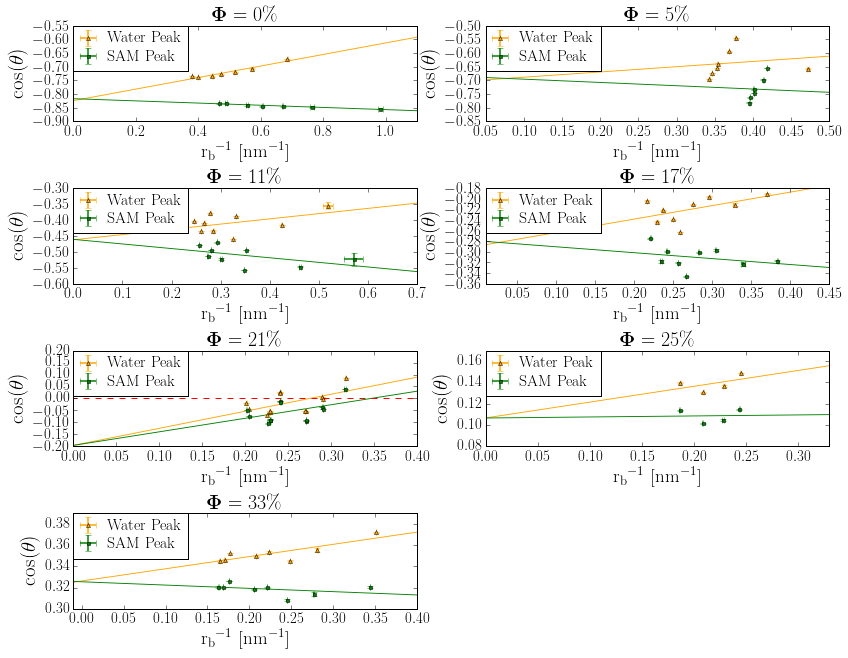

In [61]:
# WITH ERRORBARS: PLOTS SCALED EQUALLY WITH PRESSURE TENSOR RESULTS AND 3 DEFINITIONS OF Z=0
#(for the 3 def. of z=0)
slopes_all_w=[]
intercepts_all_w=[]
#slopes_all_m=[]
#intercepts_all_m=[]
slopes_all_s=[]
intercepts_all_s=[]

line1=[]
line2=[]
line3=[]
line4=[]

Nrows = 4
Ncolumns = 2
fig, ax = plt.subplots(Ncolumns, Nrows ,figsize=(5,1.8),dpi=400)
fig.subplots_adjust(bottom=0.0,top=1.5, left=0.0, right=2.1, hspace = 0.7)

matplotlib.rcParams['legend.handlelength'] = 1  #the length of the legend handles
#matplotlib.rcParams['legend.markerscale'] = 1.5
matplotlib.rcParams['legend.handletextpad'] = 0.7 #the pad between the legend handle and text
matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['legend.numpoints'] = 1
matplotlib.rcParams['legend.markerscale'] = 1.5


k = 0
for i in SAMs:
    ax = plt.subplot(Nrows, Ncolumns, k+1)
    x_w = []
    y_w = []
    x_error_w = []
    y_error_w = []
    #mn=min(len(rbase_w[i]),len(theta_w[i]))
    mn=len(theta_w[i])
    for j in range(mn):
        x_w.append(1/rbase_w[i][j])
        x_error_w.append((rbase_w[i][j]**(-2))*error_rbase_w[i][j])
        y_w.append(cos(radians(theta_w[i][j])))
        y_error_w.append(cos(radians(theta_w[i][j]))*radians(errortheta_w[i][j])) 
    slope, intercept, delete1, delete2, delete3 = stats.linregress(x_w,y_w)
    slopes_all_w.append(slope)
    intercepts_all_w.append(intercept)
    m=0
    l_w=arange(-1,1.3,0.1)
    yline_w=np.zeros(len(l_w))
    for l in l_w:
        yline_w[m] = func(l, slope, intercept)
        m = m+1

    #x_m = []
    #y_m = []
    #x_error_m = []
    #y_error_m = [] 
    ##mn=min(len(rbase_m[i]),len(theta_m[i]))
    #mn=len(theta_m[i])
    #for j in range(mn):
    #    x_m.append(1/rbase_m[i][j])
    #    x_error_m.append((rbase_m[i][j]**(-2))*error_rbase_m[i][j])
    #    y_m.append(cos(radians(theta_m[i][j])))
    #    y_error_m.append(cos(radians(theta_m[i][j]))*radians(errortheta_m[i][j]))
    #slope, intercept, delete1, delete2, delete3 = stats.linregress(x_m,y_m)
    #slopes_all_m.append(slope)
    #intercepts_all_m.append(intercept)
    #m=0
    #l_m=arange(-0.1,1.3,0.1)
    #yline_m=np.zeros(len(l_m))
    #for l in l_m:
    #    yline_m[m] = func(l, slope, intercept)
    #    m = m+1
    
    x_s = []
    y_s = []
    x_error_s = []
    y_error_s = []
    #mn=min(len(rbase_s[i]),len(theta_s[i]))
    mn=len(theta_s[i])
    for j in range(mn):
        x_s.append(1/rbase_s[i][j])
        x_error_s.append((rbase_s[i][j]**(-2))*error_rbase_s[i][j])
        y_s.append(cos(radians(theta_s[i][j])))
        y_error_s.append(cos(radians(theta_s[i][j]))*radians(errortheta_s[i][j]))
    slope, intercept, delete1, delete2, delete3 = stats.linregress(x_s,y_s)
    slopes_all_s.append(slope)
    intercepts_all_s.append(intercept)        
    m=0
    #for l in max(x_s):
    l_s=arange(-1,1.3,0.1)
    yline_s=np.zeros(len(l_s))
    for l in l_s:
        yline_s[m] = func(l, slope, intercept)
        m = m+1
    if intercept<0:
        signtext='x'
    else:
        signtext='x+'

    #plot of the data points   
    ax.plot(l_w, yline_w,'c',color='orange', linewidth=0.9) #1.5
    #ax.plot(l_m, yline_m ,color='black',linewidth=0.9)
    ax.plot(l_s, yline_s,'g',linewidth=0.9)
    
    #plot of a black line through y=0
    zeropoints=np.zeros(len(l_w))
    ax.plot(l_w, zeropoints,'r--')

    #plots of errorbars
    ax.errorbar(x_w, y_w,xerr=x_error_w, yerr=y_error_w, fmt='^',color='orange',markersize=4,linewidth=1.5,label='Water Peak')
    #ax.errorbar(x_m, y_m,xerr=x_error_m, yerr=y_error_m, fmt='h',color='gray',markersize=7,linewidth=1.5,label='GDS')
    ax.errorbar(x_s, y_s,xerr=x_error_s, yerr=y_error_s, fmt='gs',markersize=3,linewidth=1.5,label='SAM Peak')
    #other options for errorbars: ecolor='red',elinewidth=1.5, color='red',markeredgewidth=1.5

            
    if i==0:
        ax.set_xlim([0,1.1])
        ax.set_ylim([-0.9,-0.55])
    elif i==5:
        ax.set_xlim([0.05,0.5])
        ax.set_ylim([-0.85,-0.5])
    elif i==11:
        ax.set_xlim([0,0.7])
        ax.set_ylim([-0.6,-0.3])
    elif i==17:
        ax.set_xlim([0.01,0.45])
        ax.set_ylim([-0.36,-0.18])
    elif i==21:
        ax.set_xlim([0,0.4])
        ax.set_ylim([-0.2,0.2])
    elif i==25:
        ax.set_xlim([0.,0.33])
        ax.set_ylim([0.08,0.17])
    elif i==33:
        ax.set_xlim([-0.01,0.4])
        ax.set_ylim([0.30,0.39])
    elif i==41:
        ax.set_xlim([-0.01,0.27])
        ax.set_ylim([0.085,0.165])


    # Set bold labels
    #ax.set_xlabel(r'$\mathbf{{R_{BASE}}^{-1}\ [ nm ^{-1} ]}$',fontsize=15)
    #ax.set_ylabel(r'$\mathbf{cos(\theta_{mic})}$',fontsize=19)
    
    # Set non-bold labels
    ax.set_xlabel(r'$\mathrm{{r_{b}}^{-1}\ [ nm ^{-1} ]}$',fontsize=19)
    ax.set_ylabel(r'$\mathrm{cos(\theta)}$',fontsize=21)
    
    #for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)

    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    #titles for each subplot:
    mysubtitle=ax.set_title('$\mathbf{\Phi= \ }$'+str(i)+'\%',fontweight='bold',fontsize=20)
    plt.setp(mysubtitle, color='black')         #set the color of title to white
    
    # Create a legend for the first line.
    first_legend = plt.legend(loc=0,borderaxespad=0.,markerscale=1,fontsize=16)
    # Add the legend manually to the current Axes.
    ax = plt.gca().add_artist(first_legend)    
    
    # Set size of subplots
    fig.subplots_adjust(top=4.5) 
    
    k = k + 1

#plt.show()    
fig.savefig('scaled_errors_all_cos_r.pdf',format='pdf', bbox_inches='tight',dpi=400)

0 7
0 7
5 8
5 8
11 9
11 9
17 9
17 9
21 12
21 12
25 4
25 4
33 8
33 8


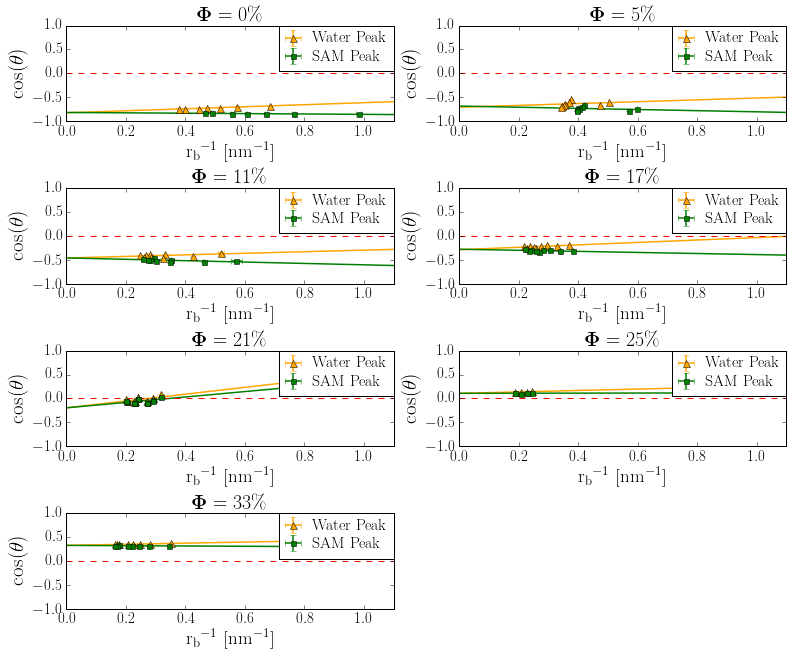

In [60]:
# WITH ERRORBARS: PLOTS USING SAME AXIS LENGTHS FOR THE 3 DEFINITIONS OF Z=0

slopes_all_w=[]
intercepts_all_w=[]
#slopes_all_m=[]
#intercepts_all_m=[]
slopes_all_s=[]
intercepts_all_s=[]

line1=[]
line2=[]
line3=[]
line4=[]

Nrows = 4
Ncolumns = 2
fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,1.8))
fig.subplots_adjust(bottom=0.0,top=1.5, left=0.0, right=2, hspace = 0.7)
matplotlib.rcParams['legend.handlelength'] = 1  #the length of the legend handles
matplotlib.rcParams['legend.markerscale'] = 1.5
matplotlib.rcParams['legend.handletextpad'] = 0.7 #the pad between the legend handle and text
matplotlib.rcParams['font.family'] = 'Times New Roman'
#rcParams['legend.numpoints'] = 1

k = 0
for i in SAMs:
    ax = plt.subplot(Nrows, Ncolumns, k+1)
    x_w = []
    y_w = []
    x_error_w = []
    y_error_w = []
    
    #mn=min(len(rbase_w[i]),len(theta_w[i]))
    mn=len(theta_w[i])
    print i, mn
    for j in range(mn):
        x_w.append(1/rbase_w[i][j])
        x_error_w.append((rbase_w[i][j]**(-2))*error_rbase_w[i][j])
        y_w.append(cos(radians(theta_w[i][j])))
        y_error_w.append(cos(radians(theta_w[i][j]))*radians(errortheta_w[i][j])) 
    slope, intercept, delete1, delete2, delete3 = stats.linregress(x_w,y_w)
    slopes_all_w.append(slope)
    intercepts_all_w.append(intercept)
    m=0
    l_w=arange(0,1.3,0.1)
    yline_w=np.zeros(len(l_w))
    for l in l_w:
        yline_w[m] = func(l, slope, intercept)
        m = m+1

    # x_m = []
    # y_m = []
    # x_error_m = []
    # y_error_m = [] 
    # #mn=min(len(rbase_m[i]),len(theta_m[i]))
    # mn=len(theta_m[i])
    # for j in range(mn):
    #     x_m.append(1/rbase_m[i][j])
    #     x_error_m.append((rbase_m[i][j]**(-2))*error_rbase_m[i][j])
    #     y_m.append(cos(radians(theta_m[i][j])))
    #     y_error_m.append(cos(radians(theta_m[i][j]))*radians(errortheta_m[i][j]))
    # slope, intercept, delete1, delete2, delete3 = stats.linregress(x_m,y_m)
    # slopes_all_m.append(slope)
    # intercepts_all_m.append(intercept)
    # m=0
    # l_m=arange(0,1.3,0.1)
    # yline_m=np.zeros(len(l_m))
    # for l in l_m:
    #     yline_m[m] = func(l, slope, intercept)
    #     m = m+1
    
    x_s = []
    y_s = []
    x_error_s = []
    y_error_s = []
    #mn=min(len(rbase_s[i]),len(theta_s[i]))
    mn=len(theta_s[i])
    print i, mn
    for j in range(mn):
        x_s.append(1/rbase_s[i][j])
        x_error_s.append((rbase_s[i][j]**(-2))*error_rbase_s[i][j])
        y_s.append(cos(radians(theta_s[i][j])))
        y_error_s.append(cos(radians(theta_s[i][j]))*radians(errortheta_s[i][j]))
    slope, intercept, delete1, delete2, delete3 = stats.linregress(x_s,y_s)
    slopes_all_s.append(slope)
    intercepts_all_s.append(intercept)        
    m=0
    #for l in max(x_s):
    l_s=arange(0,1.3,0.1)
    yline_s=np.zeros(len(l_s))
    for l in l_s:
        yline_s[m] = func(l, slope, intercept)
        m = m+1

    #plot of the data points
    line2, = ax.plot(l_w, yline_w,'c',color='orange', linewidth=1.5)
    #line3, = ax.plot(l_m, yline_m ,color='black',linewidth=1.5)
    line4, = ax.plot(l_s, yline_s,'g',linewidth=1.5)
    
    #plot of a black line through y=0
    zeropoints=np.zeros(len(l_w))
    ax.plot(l_w, zeropoints,'r--')

    #plots of errorbars
    ax.errorbar(x_w, y_w,xerr=x_error_w, yerr=y_error_w, fmt='^',color='orange',markersize=7,linewidth=1.5,label='Water Peak')
    #ax.errorbar(x_m, y_m,xerr=x_error_m, yerr=y_error_m, fmt='h',color='gray',markersize=7,linewidth=1.5,label='GDS')
    ax.errorbar(x_s, y_s,xerr=x_error_s, yerr=y_error_s, fmt='gs',markersize=5,linewidth=1.5,label='SAM Peak')
    #other options for errorbars: ecolor='red',elinewidth=1.5, color='red',markeredgewidth=1.5
    
    ax.set_xlim([0,1.1])
    ax.set_ylim([-1,+1])

    # Set bold labels
    #ax.set_xlabel(r'$\mathbf{{r_{b}}^{-1}\ [ nm ^{-1} ]}$',fontsize=19)
    #ax.set_ylabel(r'$\mathbf{cos(\theta)}$',fontsize=19)
    
    # Non-bold labels
    ax.set_xlabel(r'$\mathrm{{r_{b}}^{-1}\ [ nm ^{-1} ]}$',fontsize=19)
    ax.set_ylabel(r'$\mathrm{cos(\theta)}$',fontsize=21)
    
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    #titles for each subplot:
    mysubtitle=ax.set_title('$\mathbf{\Phi= \ }$'+str(i)+'\%',fontweight='bold',fontsize=20)
    plt.setp(mysubtitle, color='black')         #set the color of title to white
    
    # Create a legend for the first line.
    first_legend = plt.legend(loc=1,borderaxespad=0.,markerscale=1,fontsize=16)
    # Add the legend manually to the current Axes.
    ax = plt.gca().add_artist(first_legend)
    
    
    # Set size of subplots
    fig.subplots_adjust(top=4.5) 
    
    #plt.grid(True)
    k = k + 1

#titletext='On the Same Scale: '+ r'$cos(\theta_{mic})$' +' vs 1/R$\ _{BASE} $ for Three Definitions \n OF $z=0$ Together with Pressure Tensor Results'
#mytitle = plt.suptitle(titletext, fontsize=20, fontweight='bold', x=1.0, y=4.7)

#plt.show()
fig.savefig('all_cos_r_zoom.pdf',bbox_extra_artists=(first_legend,mysubtitle,), bbox_inches='tight', dpi=400)

In [62]:
# WE CALCULATE THE MACROSCOPIC CONTACT ANGLES (theta_mac_w in radians) AND THE LINE TENSIONS (sigma_w)

theta_mac_w=np.zeros(len(intercepts_all_w))
sigma_w=np.zeros(len(slopes_all_w))
for i in range(len(intercepts_all_w)):
    theta_mac_w[i]=arccos(intercepts_all_w[i])
    sigma_w[i]=(-52.7)*slopes_all_w[i]
print "theta_mac_w", theta_mac_w
print "sigma_w",sigma_w

#theta_mac_m=np.zeros(len(intercepts_all_m))
#sigma_m=np.zeros(len(slopes_all_m))
#for i in range(len(intercepts_all_m)):
#    theta_mac_m[i]=arccos(intercepts_all_m[i])
#    sigma_m[i]=(-52.7)*slopes_all_m[i]
#print "theta_mac_m",theta_mac_m
#print "sigma_m",sigma_m

theta_mac_s=np.zeros(len(intercepts_all_s))
sigma_s=np.zeros(len(slopes_all_s))
for i in range(len(intercepts_all_s)):
    theta_mac_s[i]=arccos(intercepts_all_s[i])
    sigma_s[i]=(-52.7)*slopes_all_s[i]
print "theta_mac_s",theta_mac_s
print "sigma_s",sigma_s

theta_mac_w [ 2.54080416  2.35792944  2.05137809  1.86411888  1.76851351  1.46395117
  1.2385778 ]
sigma_w [-11.13621587 -10.13812056  -8.65521513 -13.37448782 -37.5928796
  -7.8465212   -6.060294  ]
theta_mac_s [ 2.52828256  2.32438454  2.04977315  1.85389066  1.7685018   1.46401951
  1.23937408]
sigma_s [  2.10862851   6.33232563   7.61208504   5.8741154  -29.85361357
  -0.50867164   1.63104681]


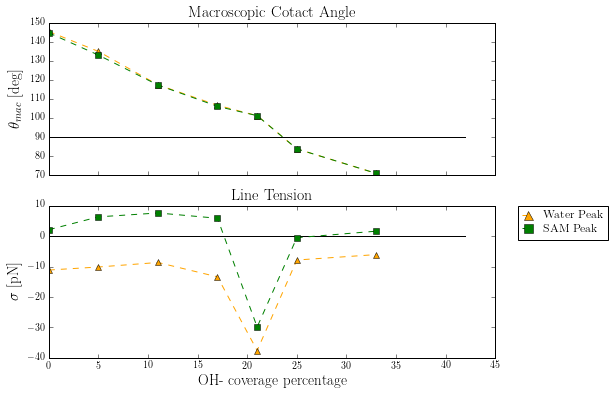

In [63]:
#plots without complete wetting results
# Two subplots, unpack the axes array immediately
fig, axarr = plt.subplots(2, sharex=True,figsize=(8,6), dpi=400)
rcParams['figure.figsize'] = 8, 6 #size of plots

# we mark the zero point with a line
zerox=range(43)
linezero=np.zeros(43)
axarr[1].plot(zerox,linezero,'k-')

# we mark the 90 deg. point with a line for the contact angle
zerox=range(43)
lineninety=43*[90]
axarr[0].plot(zerox,lineninety,'k-')

axarr[0].plot(SAMs,degrees(theta_mac_w),'c^--', color='orange',label="Water Peak")
#axarr[0].plot(SAMs,degrees(theta_mac_m),'o--', color='orange')
axarr[0].plot(SAMs,degrees(theta_mac_s),'gs--',label="SAM Peak")
mytitle1=axarr[0].set_title('Macroscopic Cotact Angle',fontsize=16, fontweight='bold')

axarr[1].plot(SAMs,sigma_w,'c^--',label="Water Peak",color='orange')
#axarr[1].plot(SAMs,sigma_m,'o--', color='orange',label="Middle Point")
axarr[1].plot(SAMs,sigma_s,'gs--',label="SAM Peak")
axarr[1].set_title('Line Tension',fontsize=16, fontweight='bold')

axarr[0].set_ylabel(r'$\theta_{mac}$ [deg]',fontsize=15)
axarr[1].set_ylabel('$\sigma$ [pN]',fontsize=15)
axarr[1].set_xlabel('OH- coverage percentage',fontsize=15)

first_legend=axarr[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#plt.show()
fig.savefig('subplt_theta_mac_tau.jpg',bbox_extra_artists=(first_legend,), bbox_inches='tight', dpi=400)

In [64]:
# we add the results of SAM 50% and SAM 60% to sigma (in sigma2) and to theta_mac (in theta_mac2)
# and change all the types to list (incl. percentages-> percentages2)

sigma2_w=list(sigma_w)
sigma2_w=sigma2_w+[0,0]
print sigma2_w

theta_mac2_w=list(theta_mac_w)
theta_mac2_w=theta_mac2_w+[0,0]
print theta_mac2_w

#sigma2_m=list(sigma_m)
#sigma2_m=sigma2_m+[0,0]
#print sigma2_m

#theta_mac2_m=list(theta_mac_m)
#theta_mac2_m=theta_mac2_m+[0,0]
#print theta_mac2_m

sigma2_s=list(sigma_s)
sigma2_s=sigma2_s+[0,0]
print sigma2_s

theta_mac2_s=list(theta_mac_s)
theta_mac2_s=theta_mac2_s+[0,0]
print theta_mac2_s

percentages2=list(percentages)
print percentages2

[-11.13621586849286, -10.138120563300939, -8.6552151262711448, -13.374487822710321, -37.592879599938136, -7.846521204117364, -6.0602939961164219, 0, 0]
[2.5408041571597737, 2.3579294429614981, 2.051378090452312, 1.8641188819632264, 1.7685135143119746, 1.4639511700082184, 1.238577799845596, 0, 0]
[2.1086285144240948, 6.3323256319122665, 7.6120850434266281, 5.8741154011947669, -29.853613572581029, -0.50867163733628817, 1.6310468126741537, 0, 0]
[2.5282825620182803, 2.3243845431881089, 2.0497731509666082, 1.8538906550344145, 1.7685017954933284, 1.4640195141610071, 1.2393740848711898, 0, 0]
[0, 5, 11, 17, 21, 25, 33, 41, 50, 66]


In [65]:
# CORRECTION
percentages2 = list([0, 5, 11, 17, 21, 25, 33, 50, 66])
print len(SAMs+[50]),SAMs+[50]
print len(sigma_w), sigma_w
print len(degrees(theta_mac_w)), degrees(theta_mac_w)
print len(SAMs+[50]), len(list(degrees(theta_mac_w))+[0])

8 [0, 5, 11, 17, 21, 25, 33, 50]
7 [-11.13621587 -10.13812056  -8.65521513 -13.37448782 -37.5928796
  -7.8465212   -6.060294  ]
7 [ 145.57735477  135.09940547  117.53530677  106.80614445  101.32836038
   83.87822345   70.96528053]
8 8


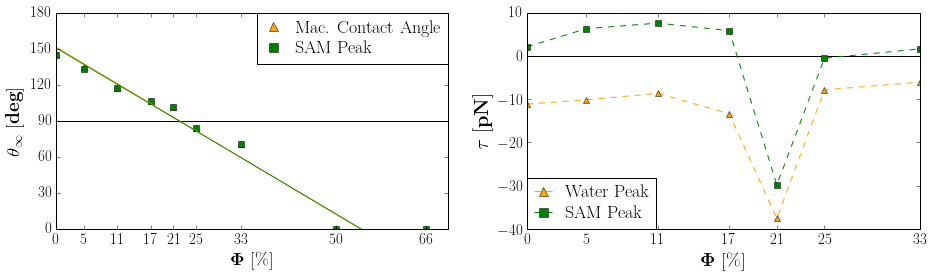

In [66]:
# (TWO) PLOTS OF MAC. THETA AND TAU vs. PHI (OH- percentage)
# This plot is done to get the 2 plots side by side, because otherwise Latex makes the figures so small 
# that the axes cannot be distinguisehd anymore.
fig = plt.figure()
fig.subplots_adjust(bottom=0.0,top=0.5, left=0, right=1.5, hspace = 0.5)

axarr0 = fig.add_subplot(121)

# we mark the 90 deg. point with a line for the contact angle
zerox=range(71)
lineninety=71*[90]
axarr0.plot(zerox,lineninety,'k-')

axarr0.plot(percentages2,degrees(theta_mac2_w),'c^',label='Mac. Contact Angle',color='orange')
#axarr0.plot(percentages2,degrees(theta_mac2_m),'--', color='orange')
axarr0.plot(percentages2,degrees(theta_mac2_s),'gs',label="SAM Peak")
#mytitle1=axarr0.set_title('Macroscopic Cotact Angle',fontsize=16, fontweight='bold')
axarr0.set_ylim([0,180])

# Line interpolation (1)
slope, intercept, delete1, delete2, delete3 = stats.linregress(SAMs+[50], list(degrees(theta_mac_w))+[0])
x_w = np.linspace(SAMs[0], 58,500)  
yline_w = np.zeros(len(x_w))
m=0
for l in x_w:
    yline_w[m] = func(l, slope, intercept)
    m = m+1
axarr0.plot(x_w, yline_w,'c-',color='orange', linewidth=0.9) #1.5

# Line interpolation (1)
slope, intercept, delete1, delete2, delete3 = stats.linregress(SAMs+[50], list(degrees(theta_mac_s))+[0])
x_s = np.linspace(SAMs[0], 58,500)  
yline_s = np.zeros(len(x_s))
m=0
for l in x_s:
    yline_s[m] = func(l, slope, intercept)
    m = m+1
axarr0.plot(x_s, yline_s,'g-', linewidth=0.9) #1.5

axarr0.set_ylabel(r'$\mathbf{\theta_{\infty} \ [deg]}$',fontsize=19)
axarr0.set_xlabel(r'$\mathbf{\Phi} \ [\%]$',fontsize=18)
axarr0.set_xticks(percentages2)
axarr0.set_yticks([0,30,60,90,120,150,180])

#line2, =axarr[0].plot(percentages2,ptensor,'rs--',label='Pressure Tensor Method')
axarr1 = fig.add_subplot(122)

# we mark the zero point with a line for the line tension
zerox=range(41)
linezero=np.zeros(41)
axarr1.plot(zerox,linezero,'k-')

axarr1.plot(SAMs,sigma_w,'c^--',label="Water Peak",color='orange')
#axarr1.plot(SAMs,sigma_m,'o--', color='orange',label="Middle Point")
axarr1.plot(SAMs,sigma_s,'gs--',label="SAM Peak")
#axarr1.set_title('Line Tension',fontsize=16, fontweight='bold')

axarr1.set_ylabel(r'$\mathbf{\tau \ [pN]}$',fontsize=20)
axarr1.set_xlabel(r'$\mathbf{\Phi} \ [\%]$',fontsize=19)
axarr1.set_xlim([0,33])
axarr1.set_xticks(SAMs)

for item in (axarr0.get_xticklabels() + axarr0.get_yticklabels() + axarr1.get_xticklabels() + axarr1.get_yticklabels()):item.set_fontsize(15)
    
first_legend=axarr1.legend(loc=0, borderaxespad=0.,fontsize=18)
second_legend=axarr0.legend(loc=0, borderaxespad=0.,fontsize=18)

#plt.show()
fig.savefig('subplt_theta_mac_tau_all.jpg',bbox_extra_artists=(first_legend,), bbox_inches='tight')

x= [-11.13621587 -10.13812056  -8.65521513 -13.37448782 -37.5928796
  -7.8465212   -6.060294  ]
y= [ 2.54080416  2.35792944  2.05137809  1.86411888  1.76851351  1.46395117
  1.2385778 ]


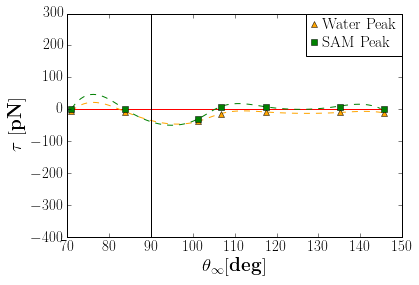

In [67]:
#PLOT AGAIN TAU vs. THETA_MAC BUT INTERPOLATING THE DATA POINTS
plt.figure(figsize=(6,4), dpi=400)

x2_w=sigma_w
y2_w=theta_mac_w

#x2_m=sigma_m
#y2_m=theta_mac_m

x2_s=sigma_s
y2_s=theta_mac_s
print "x=",x2_w
print "y=",y2_w


zerox=frange(min(degrees(y2_w)),max(degrees(y2_w)))
linezero=np.zeros(len(zerox))
plt.plot(zerox,linezero,'r-')


# Interpolation of line tensions
xnew3_w = np.linspace(min(degrees(y2_w)), max(degrees(y2_w)), 100)
#xnew3_m = np.linspace(min(degrees(y2_m)), max(degrees(y2_m)), 100)
xnew3_s = np.linspace(min(degrees(y2_s)), max(degrees(y2_s)), 100)

myfunction3_w = interp1d(degrees(y2_w), x2_w, kind='cubic')
#myfunction3_m = interp1d(degrees(y2_m), x2_m, kind='cubic')
myfunction3_s = interp1d(degrees(y2_s), x2_s, kind='cubic')

plt.plot(xnew3_w, myfunction3_w(xnew3_w),'--',color='orange')
#plt.plot(xnew3_m, myfunction3_m(xnew3_m),'--',color='black')
plt.plot(xnew3_s, myfunction3_s(xnew3_s),'--',color='green')

plt.plot(degrees(y2_w),x2_w,'^',color='orange',label="Water Peak")
#plt.plot(degrees(y2_w),x2_m,'h',color='gray',label="GDS")
plt.plot(degrees(y2_w),x2_s,'s',color='green',label="SAM Peak")

# we mark the 90 deg. point with a line for the contact angle
zerox=range(-400,300)
lineninety=len(zerox)*[90]
plt.plot(lineninety,zerox,'k-')

#xlim([min(degrees(y2_w)),max(degrees(y2_w))])
#ylim(-70,30)
xticks(fontsize=15)
yticks(fontsize=15)

#Labels with symbols
ylabel(r'$\mathbf{\tau \ [pN]}$',fontsize=19)
xlabel(r'$\mathbf{\theta_{\infty} [deg]}$',fontsize=19)

#Labels with names
#ylabel('Line tension [pN]',fontsize=19)
#xlabel('Mac. contact angle [deg]',fontsize=19)


#first_legend=plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.3,fontsize=16,numpoints=1, markerscale=1.1,handlelength=0.4,handletextpad=0.3)


#plt.grid(which='major', axis='both') #(use grid if numbers are changed)

plt.savefig('cubic_theta_mac_tau.jpg', bbox_inches='tight',dpi=400)

4 21
4 21


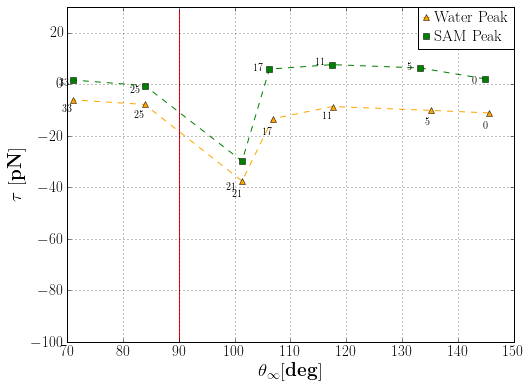

In [73]:
#NOW WE PLOT AGAIN TAU vs. THETA_MAC BUT WITH LABELS ON THE DATA POINTS => WITHOUT LINES!
import matplotlib.pyplot as plt
from scipy import interpolate

"""
f = interpolate.interp1d(degrees(theta_mac_w), sigma_w)

xnew = np.linspace(min(degrees(theta_mac_w)), max(degrees(theta_mac_w)),100)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(degrees(theta_mac_w), sigma_w, '^', xnew, ynew, '-',color='orange',label="Water Peak")

f = interpolate.interp1d(degrees(theta_mac_s), sigma_s)

xnew = np.linspace(min(degrees(theta_mac_s)), max(degrees(theta_mac_s)),100)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(degrees(theta_mac_s), sigma_s, 's', xnew, ynew, '-', color='green',label="SAM Peak")

"""
plt.plot(degrees(theta_mac_w), sigma_w, '^--', color='orange',label="Water Peak")
plt.plot(degrees(theta_mac_s), sigma_s, 's--',  color='green',label="SAM Peak")

# we mark the 90 deg. point with a line for the contact angle
zerox=range(-100,30)
lineninety=len(zerox)*[90]
plt.plot(lineninety,zerox,'r-')

#xlim([min(degrees(y2_w)),max(degrees(y2_w))])
ylim(-100,30)
xticks(fontsize=15)
yticks(fontsize=15)

#Labels with symbols
ylabel(r'$\mathbf{\tau \ [pN]}$',fontsize=19)
xlabel(r'$\mathbf{\theta_{\infty} [deg]}$',fontsize=19)

#Labels with names
#ylabel('Line tension [pN]',fontsize=19)
#xlabel('Mac. contact angle [deg]',fontsize=19)

first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.3,fontsize=16,numpoints=1, markerscale=1.1,handlelength=0.4,handletextpad=0.3)


plt.grid(which='major', axis='both') #(use grid if numbers are changed)


# Labels next to each point
for j in range(len(SAMs)):
    xarrow = degrees(theta_mac_w[j]) - (degrees(theta_mac_w[j])*0.001)
    xtext = degrees(theta_mac_w[j]) - (degrees(theta_mac_w[j])*0.001)
    if j==4:
        print j, SAMs[j]
        yarrow = sigma_w[j] + ((sigma_w[j])*0.1)
        ytext = sigma_w[j] + ((sigma_w[j])*0.1)
    else:
        yarrow = sigma_w[j] + ((sigma_w[j])*0.3)
        ytext = sigma_w[j] + ((sigma_w[j])*0.3)
    plt.annotate(str(SAMs[j]), xy=(xarrow,yarrow), xytext=(xtext,ytext),arrowprops=dict(facecolor='red', shrink=0.05,
																									  width=1, headwidth=4),
					horizontalalignment='right', verticalalignment='top',)
    
for j in range(len(SAMs)):
    xarrow = degrees(theta_mac_s[j]) - (degrees(theta_mac_s[j])*0.01)
    xtext = degrees(theta_mac_s[j]) - (degrees(theta_mac_s[j])*0.01)
    if j==4:
        print j, SAMs[j]
        yarrow = sigma_s[j] + ((sigma_s[j])*0.1)
        ytext = sigma_s[j] + ((sigma_s[j])*0.1)
    yarrow = sigma_s[j] + ((sigma_s[j])*0.3)
    ytext = sigma_s[j]  + ((sigma_s[j])*0.3)
    plt.annotate(str(SAMs[j]), xy=(xarrow,yarrow), xytext=(xtext,ytext),arrowprops=dict(facecolor='yellow', shrink=0.05,
    																								  width=1, headwidth=4),
    				horizontalalignment='right', verticalalignment='top',)

#plt.show()
plt.savefig('labels_theta_mac_sigmaA.jpg',bbox_extra_artists=(first_legend,), bbox_inches='tight')